In [ ]:
!pip install ydata-profiling openpyxl

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5ba3170f9d6656936e748bb3506f92cc9b38324aed854025fb848ecca0b50cf9
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
###########################################################################################
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q category_encoders scikit-learn pandas numpy joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 24.0 MB/s eta 0:00:00


In [ ]:
!pip install catboost optuna -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 18.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import holidays
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute  import SimpleImputer
from joblib import dump
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split,KFold, StratifiedKFold,cross_val_score, cross_validate)
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model   import LogisticRegression
from sklearn.ensemble     import RandomForestClassifier
from sklearn.metrics      import accuracy_score, roc_auc_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import json, joblib
from pathlib import Path

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import optuna
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import RepeatedKFold
from sklearn.neural_network import MLPRegressor
from optuna.samplers import TPESampler
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer
import shap
from sklearn.metrics import median_absolute_error, accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

import numpy as np, pandas as pd, json, re, joblib
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import brier_score_loss, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

from sklearn.feature_selection import VarianceThreshold, SelectPercentile, mutual_info_regression, mutual_info_classif
from scipy.stats import probplot
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/LOSproject/LoS_df_final.xlsx')
df.columns = df.columns.str.strip()

"""
First
By observing, it was found that there are two columns related to the target column.
One is the "LengthOfStay" column, and the other is the "SWFT_LoS" column.
Based on speculation, it seems that these are the stay times automatically generated by the hospital system.
Therefore, I will manually calculate the exact LengthOfStay value and then decide which column will be the final target column.
"""
#Convert the "Admission/Discharge" columns to datetime format for subsequent calculations.
df["AdmissionDateTime"]  = pd.to_datetime(df["AdmissionDateTime"])
df["DischargeDateTime"]  = pd.to_datetime(df["DischargeDateTime"])

#Calculate the standard version LOS
df["LOS_computed"] = (df["DischargeDateTime"] - df["AdmissionDateTime"]).dt.days

#Compare the basic differences of the three types of LOS
print(df[["LOS_computed", "LengthOfStay", "SWFT_LoS"]].describe())

#Check the differences in a few actual values
print(df[["AdmissionDateTime","DischargeDateTime","LOS_computed","LengthOfStay","SWFT_LoS"]]
      .head(10))


       LOS_computed  LengthOfStay    SWFT_LoS
count    799.000000    799.000000  742.000000
mean       1.215269      1.519399    0.905660
std        2.078947      1.663198    0.652408
min        0.000000      0.000000    0.000000
25%        0.000000      1.000000    1.000000
50%        1.000000      1.000000    1.000000
75%        2.000000      2.000000    1.000000
max       35.000000     30.000000   10.000000
    AdmissionDateTime   DischargeDateTime  LOS_computed  LengthOfStay  \
0 2021-07-08 07:00:00 2021-07-09 15:30:07           1.0           1.0   
1 2021-07-09 07:00:00 2021-07-11 11:49:36           2.0           2.0   
2 2021-07-12 07:00:00 2021-07-13 18:00:20           1.0           1.0   
3 2021-07-16 07:00:00 2021-07-18 18:00:39           2.0           2.0   
4 2021-07-20 07:00:00 2021-07-21 19:33:50           1.0           1.0   
5 2021-07-22 11:00:00 2021-07-24 16:43:29           2.0           2.0   
6 2021-07-23 07:00:00 2021-07-28 18:05:45           5.0           5.0   
7 

In [ ]:
"""
Classify the columns，Static demographic characteristics
I have already checked the differences between the two columns of LOS.
The "LengthOfStay" column in the table is the same as the calculated time, except for a slight difference in distribution,which is caused by the rounding down method I used.
Therefore, from now on, we will directly use the "LengthOfStay" column as the target column.
"""

#Static demographic characteristics
static_cols = [
    "Age (years):",
    "PersonGender",
    "PersonBirthDate",
    "PersonEthnicCategoryDesc",
    "Postcode",
    "PrimaryProcedureCode",
    "PrimaryProcedureDesc",
    "PatientClassificationDesc",
    "PRIORITY_TYPE_DESCRIPTION",
    "Counter_PreviousOrmisActivity"
]

#The human measurement group (will be cleaned up later)
anthro_cols = [
    "Height (please input in centimeters)",
    "Weight (please input in kilograms)",
    "Height CM CORRECTED",
    "Weight KG CORRECTED",
    "BMI"
]

#Behavioral / PreoperativeQuestionnaireCharacteristics
behavior_cols = [
    "Smoker",
    "Do you live alone?",
    "Will there be someone, such as a family member or friend, who can support you during your initial recovery?",
    "Do you have stairs at home?",
    "Can you go up and down the stairs without assistance?",
    "Do you have downstairs access to a toilet?",
    "How far can you currently walk?",
    "Do you currently use any walking aids to walk?",
    "Have you had any falls in the past 12 months?",
    "How long do you expect to stay in hospital after your operation?",
    "How anxious are you about having joint replacement surgery?",
    "Have you had previous joint replacement surgery?",
    "How long do you estimate it would take you to stand from a chair, walk 5 steps away from the chair and then return to the chair again?"
]

#Point-in-time information（Admission time, discharge time, start time of surgery, end time of surgery）
time_cols = [
    "AdmissionDateTime",
    "DischargeDateTime",
    "OperationStartDateTime",
    "OperationEndDateTime"
]

#Surgical-related characteristics（minute）
surgical_cols = [
    "OperationLengthMinute",
    "PatientTotalTime",
]

#binary flags (e.g. ['Flag_IsDiagnosedDiabetes', 'Flag_IsDiagnosedHypertension', ...])
flag_cols = [c for c in df.columns if c.startswith("Flag_IsDiagnosed")]

#Administrative/Location Information Characteristics
admin_cols = [
    "ProfCarerOnAdmitName",     #The name of the main nurse at the time of admission
    "TheatreCode",          #Operating room number
    "TheatreName",          #Operating room name
    "AdmitWard"           #Inpatient ward
]

#Target column (length of hospital stay)
target_cols = ["LengthOfStay"]

#Have a complete check-up
groups = {
    "static":      static_cols,
    "anthro":      anthro_cols,
    "behavior":    behavior_cols,
    "time":        time_cols,
    "surgical":    surgical_cols,
    "flags":       flag_cols,
    "admin":       admin_cols
}

for name, cols in groups.items():
    missing = set(cols) - set(df.columns)
    print(f"{name:8s} ({len(cols)} cols): missing in df? {missing}")


static   (10 cols): missing in df? set()
anthro   (5 cols): missing in df? set()
behavior (13 cols): missing in df? set()
time     (4 cols): missing in df? set()
surgical (2 cols): missing in df? set()
flags    (7 cols): missing in df? set()
admin    (4 cols): missing in df? set()


In [ ]:
#Previously, the variable "time_cols" has been defined, and all the columns within it have been converted to datetime64 format.
#Set errors='coerce', so that the time of parsing failure is changed to NaT, which is convenient for subsequent checks.
for c in time_cols:
    df[c] = pd.to_datetime(df[c], errors='coerce')

#Check for any missing elements or parsing errors.
print(df[time_cols].info())

#Use the existing "LengthOfStay" as the target
print("LengthOfStay:", df['LengthOfStay'].describe())

#Extract admission / discharge derived features
df['Adm_Month']    = df['AdmissionDateTime'].dt.month
df['Adm_Weekday']   = df['AdmissionDateTime'].dt.dayofweek
df['Adm_Quarter']   = df['AdmissionDateTime'].dt.quarter
df['Adm_Hour']    = df['AdmissionDateTime'].dt.hour
df['Adm_IsWeekend']  = (df['Adm_Weekday'] >= 5).astype(int)

df['Disch_Month']   = df['DischargeDateTime'].dt.month
df['Disch_Weekday']  = df['DischargeDateTime'].dt.dayofweek
df['Disch_Quarter']  = df['DischargeDateTime'].dt.quarter
df['Disch_Hour']   = df['DischargeDateTime'].dt.hour
df['Disch_IsWeekend'] = (df['Disch_Weekday'] >= 5).astype(int)

#Extract the derived features of the start / end of the surgery
df['OpStart_Month']  = df['OperationStartDateTime'].dt.month
df['OpStart_Weekday'] = df['OperationStartDateTime'].dt.dayofweek
df['OpStart_Hour']  = df['OperationStartDateTime'].dt.hour
df['OpStart_IsWeekend']= (df['OpStart_Weekday'] >= 5).astype(int)

df['OpEnd_Month']   = df['OperationEndDateTime'].dt.month
df['OpEnd_Weekday']  = df['OperationEndDateTime'].dt.dayofweek
df['OpEnd_Hour']   = df['OperationEndDateTime'].dt.hour
df['OpEnd_IsWeekend'] = (df['OpEnd_Weekday'] >= 5).astype(int)

#Mark British statutory holidays
uk_hols = holidays.UnitedKingdom()
df['Adm_IsHoliday']     = df['AdmissionDateTime'].dt.date.isin(uk_hols).astype(int)
df['Disch_IsHoliday']   = df['DischargeDateTime'].dt.date.isin(uk_hols).astype(int)
df['OpStart_IsHoliday'] = df['OperationStartDateTime'].dt.date.isin(uk_hols).astype(int)
df['OpEnd_IsHoliday']   = df['OperationEndDateTime'].dt.date.isin(uk_hols).astype(int)

#Check which new features have been generated
derived = [
    'Adm_Month','Adm_Weekday','Adm_Quarter','Adm_Hour','Adm_IsWeekend','Adm_IsHoliday',
    'Disch_Month','Disch_Weekday','Disch_Quarter','Disch_Hour','Disch_IsWeekend','Disch_IsHoliday',
    'OpStart_Month','OpStart_Weekday','OpStart_Hour','OpStart_IsWeekend','OpStart_IsHoliday',
    'OpEnd_Month','OpEnd_Weekday','OpEnd_Hour','OpEnd_IsWeekend','OpEnd_IsHoliday'
]
print(df[derived].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   AdmissionDateTime       799 non-null    datetime64[ns]
 1   DischargeDateTime       799 non-null    datetime64[ns]
 2   OperationStartDateTime  704 non-null    datetime64[ns]
 3   OperationEndDateTime    704 non-null    datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 25.6 KB
None
LengthOfStay: count    799.000000
mean       1.519399
std        1.663198
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       30.000000
Name: LengthOfStay, dtype: float64
   Adm_Month  Adm_Weekday  Adm_Quarter  Adm_Hour  Adm_IsWeekend  \
0        7.0          3.0          3.0       7.0              0   
1        7.0          4.0          3.0       7.0              0   
2        7.0          0.0          3.0       7.0              0   
3     

In [ ]:
"""
There are many missing values in the "OperationStartDateTime" and "OperationEndDateTime" columns. After deleting these rows, approximately 14% of the samples were lost.
If the subsequent model is sensitive to the sample size, or if this 14% has a higher proportion in certain key populations, it may introduce bias.
By observing, it was found that the dates of these two columns were almost the same. That is to say, most people completed their surgeries within one day.
In the subsequent model, these two columns should have little contribution to the model.
Therefore, I decide to only delete the rows where the admission/departure times were completely missing.
"""

#Re-read the original data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/LOSproject/LoS_df_final.xlsx')
df.columns = df.columns.str.strip()

#Check the missing rate of each column
missing_rate = df.isnull().mean().sort_values(ascending=False)
print("The missing rate of each column：\n", missing_rate.head(20))

#Delete the columns with a high missing rate (higher than 40%)
to_drop = missing_rate[missing_rate > 0.40].index.tolist()
print(f"Delete the columns with a missing rate of more than 40%（In total, {len(to_drop)} columns）：\n", to_drop)
df.drop(columns=to_drop, inplace=True)

#1.Fill the numeric features with the median because the median is not sensitive to extreme values.(Exclude the target column "LengthOfStay")
num_cols = df.select_dtypes(include=[np.number]).columns.drop('LengthOfStay')
print(f"Numerical characteristics (will be filled with the median)：{num_cols.tolist()}")
for col in num_cols:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

#Fill in the categorical features with "Unknown".
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print(f"Category characteristics (will be filled with 'Unknown')：{cat_cols}")
for col in cat_cols:
    df[col].fillna('Unknown', inplace=True)

#The missing flag feature (Flag_*) is handled as 'N'.
flag_cols = [c for c in df.columns if c.startswith('Flag_IsDiagnosed')]
print(f"Diagnosis Flag Characteristics (will be filled with 'N')：{flag_cols}")
for col in flag_cols:
    df[col].fillna('N', inplace=True)

#If there is still a missing of time, simply delete it to ensure the accuracy of subsequent calculations.
time_cols = ['AdmissionDateTime','DischargeDateTime']
still_missing = df[time_cols].isnull().any()
if still_missing.any():
    print("The time column is missing. Delete these rows.：\n", df[df[time_cols].isnull().any(axis=1)][time_cols])
    df.dropna(subset=['AdmissionDateTime','DischargeDateTime'], inplace=True)

#Recheck: Confirm that there are no missing items.
final_missing = df.isnull().mean().loc[lambda x: x>0]
print("Remaining missing after processing：\n", final_missing)

The missing rate of each column：
 Counter_PreviousOrmisActivity         0.539877
Unnamed: 5                            0.376687
PrimaryProcedureDesc                  0.139877
PrimaryProcedureCode                  0.138650
TheatreCode                           0.136196
TheatreName                           0.136196
OperationLengthMinute                 0.136196
OperationEndDateTime                  0.136196
OperationStartDateTime                0.136196
PatientTotalTime                      0.136196
AdmitWard                             0.133742
ProfCarerOnAdmitName                  0.133742
Weight KG CORRECTED                   0.128834
PRIORITY_TYPE_DESCRIPTION             0.119018
Height CM CORRECTED                   0.116564
Postcode                              0.116564
Weight (please input in kilograms)    0.114110
Age (years):                          0.114110
PersonEthnicCategoryDesc              0.114110
PatientClassificationDesc             0.114110
dtype: float64
Delete the 

/tmp/ipython-input-11-1878827902.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)
/tmp/ipython-input-11-1878827902.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
"""
After processing, there are still some missing values in the "LengthOfStay" column, accounting for approximately 0.019632.
Through observation, it was found that both "AdmissionDateTime" and "DischargeDateTime" are also missing.
Therefore, it is impossible to use the manually calculated "LOS_computed" to complete the data.
Therefore, discard approximately 1.96% of the null values and delete these rows.
"""

#Count the number of rows where LengthOfStay is missing
num_missing = df['LengthOfStay'].isna().sum()
print(f"The number of rows to be deleted：{num_missing}")

#Delete these lines directly
df = df.dropna(subset=['LengthOfStay'])

#Check again to ensure nothing has been missed.
print("After deletion, the number of missing 'LengthOfStay' values：", df['LengthOfStay'].isna().sum())

The number of rows to be deleted：16
After deletion, the number of missing 'LengthOfStay' values： 0


In [ ]:
"""
Categorical Encoding
"""

#Read the DataFrame that has already been cleaned
df = df.copy()
y  = df['LengthOfStay']
X  = df.drop(columns=['LengthOfStay'])

#Classify feature types
#First, identify all the category columns.
cat_cols_all = X.select_dtypes(include=['object','category']).columns.tolist()

#(1) Manually list the binary columns. Binary column mapping
binary_cols = ['Smoker', 'Do you live alone?', 'Do you have stairs at home?', 'Can you go up and down the stairs without assistance?', 'Do you have downstairs access to a toilet?',
               'Have you had any falls in the past 12 months?', 'Have you had previous joint replacement surgery?', 'PRIORITY_TYPE_DESCRIPTION','PersonGender',
               'Flag_IsDiagnosedDiabetes', 'Flag_IsDiagnosedHypertension', 'Flag_IsDiagnosedSmoker', 'Flag_IsDiagnosedHeartRate', 'Flag_IsDiagnosedMentalandBehaviourAlcohol',
               'Flag_IsDiagnosedObesity', 'Flag_IsDiagnosedDisorderOfBrain']
binary_map  = {'Yes':1, 'No':0, 'Male':1, 'Female':0, 'Routine':0,'Urgent':1, 'Y':1, 'N':0}

for col in binary_cols:
    if col in X.columns:
        X[col] = X[col].map(binary_map).astype('Int64')

#(2) Ordered multi-category column mapping
ordinal_maps = {
    'Will there be someone, such as a family member or friend, who can support you during your initial recovery?': {
        'No': 0,
        'Yes, in the daytime only': 1,
        'Yes, including overnight': 2
    },
    'How far can you currently walk?': {
        'In the house only': 0,
        'Less than a mile': 1,
        'More than a mile': 2
    },
    'How long do you expect to stay in hospital after your operation?': {
        'Go home the same day': 0,
        '1 night': 1,
        '2 nights': 2,
        '3 or more nights': 3
    },
    'How anxious are you about having joint replacement surgery?': {
        'Not at all': 0,
        'Mildly': 1,
        'Moderately': 2,
        'Very': 3
    },
    'How long do you estimate it would take you to stand from a chair, walk 5 steps away from the chair and then return to the chair again?': {
        'Unable to do it': 0,
        'Less than 15 seconds': 1,
        'More than 15 seconds': 2
    }
}
ordinal_cols = []
for col, mp in ordinal_maps.items():
    if col in X.columns:
        X[col] = X[col].map(mp).astype('Int64')
        ordinal_cols.append(col)

#(3) Other category breakdown
# Unprocessed category column
cat_cols_all = X.select_dtypes(include=['object','category']).columns.tolist()
unprocessed  = [c for c in cat_cols_all if c not in ordinal_cols]

# Base number≤20 → One-Hot；   >20 → TargetEncoder
ohe_cols   = [c for c in unprocessed if X[c].nunique() <= 20]
high_cols  = [c for c in unprocessed if X[c].nunique()  > 20]

print(f"OHE   ({len(ohe_cols)}): {ohe_cols}")

tail = ' ...' if len(high_cols) > 6 else ''
print(f"Target({len(high_cols)}): {high_cols[:6]}{tail}")


OHE   (7): ['Do you currently use any walking aids to walk?', 'ProfCarerOnAdmitName', 'TheatreCode', 'TheatreName', 'AdmitWard', 'PersonEthnicCategoryDesc', 'PatientClassificationDesc']
Target(11): ['Age (years):', 'Height (please input in centimeters)', 'Weight (please input in kilograms)', 'PersonBirthDate', 'AdmissionDateTime', 'DischargeDateTime'] ...


In [ ]:
#Preprocessing pipeline
#1) Numeric column: (Excluding ordinal_cols as they have already been mapped to Int64)
numeric_cols = (
    X.select_dtypes(include=[np.number])
      .columns.difference(ordinal_cols)
      .tolist()
)

#2) Create a pipeline for the "ordinal" column, first calculate the mode → pass through
ord_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('id',     'passthrough')
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'),       numeric_cols),
        ('bin', SimpleImputer(strategy='most_frequent'),    binary_cols),
        ('ord', ord_pipe,                   ordinal_cols),
        ('ohe', OneHotEncoder(handle_unknown='ignore',
                  sparse_output=True),          ohe_cols),
        ('te',  TargetEncoder(cols=high_cols,
                    smoothing=0.3,
                    handle_missing='value'),      high_cols)
    ],
    remainder='drop',
    sparse_threshold=0.3
)

#3) Run a test and check the shape of the result
X_processed = preprocessor.fit_transform(X, y)
print('Encoded shape:', X_processed.shape)

#4) Save artefacts
out_dir = '/content/drive/MyDrive/Colab Notebooks/LOSproject/artifacts'
os.makedirs(out_dir, exist_ok=True)

#Save the cleaned and mapped dataframe
df.to_csv(f'{out_dir}/df_after_encoding.csv', index=False)

#Preprocessor snapshot, facilitating subsequent model training
dump(preprocessor, f'{out_dir}/los_preprocessor.joblib')
print(f'Artifacts saved to: {out_dir}')

Encoded shape: (799, 112)
Artifacts saved to: /content/drive/MyDrive/Colab Notebooks/LOSproject/artifacts


In [ ]:
####################################################################################################################################################

#Second part, exploratory data analysis is conducted, mainly focusing on cleaning the encoded data.
#In order to prevent data leakage, after dividing the training set and the test set, only the training set is analyzed.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LOSproject/artifacts/df_after_encoding.csv')

#Divide the dataset into a training set and a test set (80%/20% split)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

#View the basic information of the training set
print("Number of training set samples：", train_df.shape[0])
print("Number of test set samples：", test_df.shape[0])
print("The fields included in the training set：", train_df.columns.tolist())
#Display the first 5 rows of the training set as examples
train_df.head(5)

Number of training set samples： 639
Number of test set samples： 160
The fields included in the training set： ['ID', 'Age (years):', 'Height (please input in centimeters)', 'Weight (please input in kilograms)', 'Height CM CORRECTED', 'Unnamed: 5', 'Weight KG CORRECTED', 'BMI', 'Smoker', 'Do you live alone?', 'Will there be someone, such as a family member or friend, who can support you during your initial recovery?', 'Do you have stairs at home?', 'Can you go up and down the stairs without assistance?', 'Do you have downstairs access to a toilet?', 'How far can you currently walk?', 'Do you currently use any walking aids to walk?', 'Have you had any falls in the past 12 months?', 'How long do you expect to stay in hospital after your operation?', 'How anxious are you about having joint replacement surgery?', 'Have you had previous joint replacement surgery?', 'How long do you estimate it would take you to stand from a chair, walk 5 steps away from the chair and then return to the chair 

,ID,Age (years):,Height (please input in centimeters),Weight (please input in kilograms),Height CM CORRECTED,Unnamed: 5,Weight KG CORRECTED,BMI,Smoker,Do you live alone?,...,Flag_IsDiagnosedSmoker,Flag_IsDiagnosedHeartRate,Flag_IsDiagnosedMentalandBehaviourAlcohol,Flag_IsDiagnosedObesity,Flag_IsDiagnosedDisorderOfBrain,SWFT_LoS,PRIORITY_TYPE_DESCRIPTION,PersonEthnicCategoryDesc,Postcode,PatientClassificationDesc
264,265,44,165.1,95.25,165.0,1.65,95.25,34.986226,No,Yes,...,N,N,N,Y,N,0.0,Routine,British,CV35 8DA,Ordinary admission.
615,632,69,1.63 centimetres,76.20 Kilograms,163.0,1.67,76.20,28.700000,No,No,...,N,N,N,N,N,1.0,Routine,British,CV35 0RA,Ordinary admission.
329,330,68,163cm,83kg,163.0,1.63,83.00,31.239414,No,No,...,N,N,N,N,N,1.0,Routine,British,CV23 9SA,Ordinary admission.
342,343,68,157,113,157.0,1.57,113.00,45.843645,No,No,...,N,N,N,Y,N,2.0,Urgent,British,CV31 2QA,Ordinary admission.
394,395,61,162.56 cm,58,162.0,1.62,58.00,22.100290,No,No,...,N,N,N,N,N,0.0,Routine,British,CV31 1QA,Ordinary admission.


/tmp/ipython-input-10-532318241.py:20: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


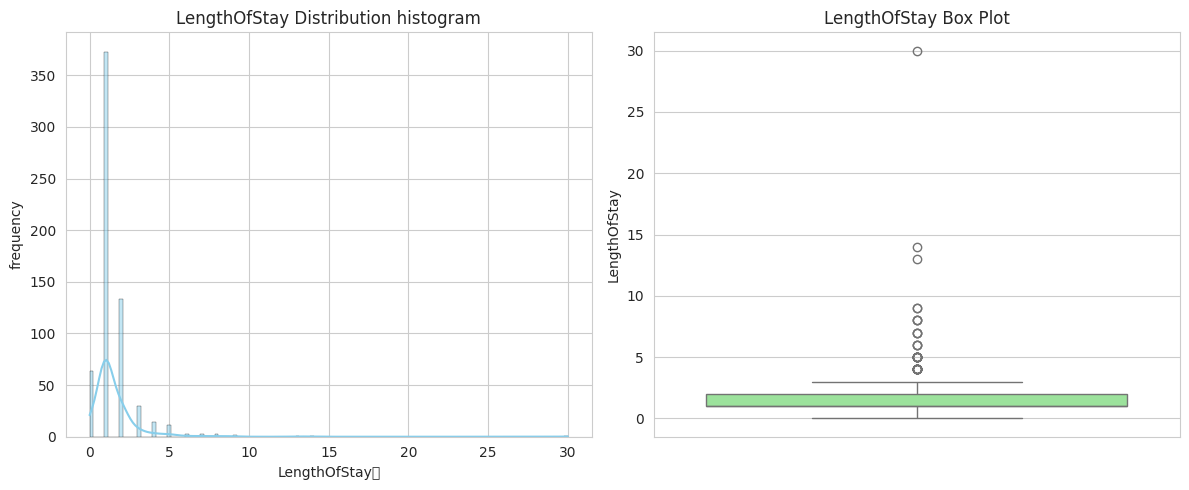

/tmp/ipython-input-10-532318241.py:29: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.savefig(out_file, dpi=300)


Figure saved to: /content/drive/MyDrive/Colab Notebooks/LOSproject/eda/LOS_hist_box_20250710_124703.png


In [ ]:
#Analyze the distribution characteristics of the target variable "LengthOfStay":
#Draw its histogram and box plot separately to determine whether there is a long-tailed distribution or extreme values in the data.
sns.set_style('whitegrid')

#Draw the histogram and box plot of LengthOfStay
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#1: Histogram (with kernel density curve)
sns.histplot(train_df['LengthOfStay'], kde=True, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title("LengthOfStay Distribution histogram")
axes[0].set_xlabel("LengthOfStay）")
axes[0].set_ylabel("frequency")

#2: Box Plot
sns.boxplot(y=train_df['LengthOfStay'], ax=axes[1], color='lightgreen')
axes[1].set_title("LengthOfStay Box Plot")
axes[1].set_ylabel("LengthOfStay")
axes[1].set_xlabel("")

plt.tight_layout()
plt.show()

#Save them to Google drive
eda_dir = '/content/drive/MyDrive/Colab Notebooks/LOSproject/eda'
os.makedirs(eda_dir, exist_ok=True)

timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
out_file  = f'{eda_dir}/LOS_hist_box_{timestamp}.png'
fig.savefig(out_file, dpi=300)

print(f"Figure saved to: {out_file}")

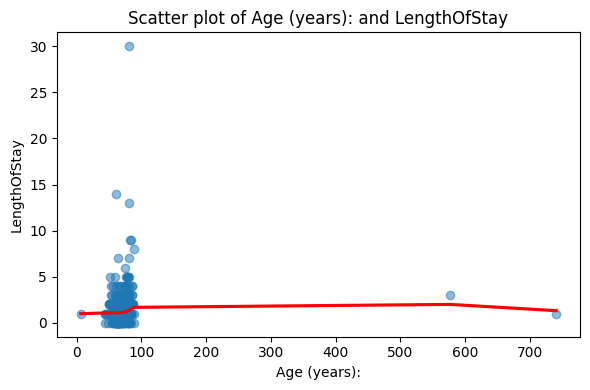

Saved: /content/drive/MyDrive/Colab Notebooks/LOSproject/eda/Age_LengthOfStay_20250710_163843.png


In [ ]:
#Next, I will explore whether the relationship between the target variable "LengthOfStay" and other numerical features is linear.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LOSproject/artifacts/df_after_encoding.csv')
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

eda_dir = '/content/drive/MyDrive/Colab Notebooks/LOSproject/eda'
os.makedirs(eda_dir, exist_ok=True)

#1. The relationship between Age and LengthOfStay
age_cols = [c for c in train_df.columns if re.search(r'age', c, re.I)]
if age_cols:
    age_col = age_cols[0]

    tmp_df = train_df[[age_col,'LengthOfStay']].copy()
    tmp_df[age_col] = pd.to_numeric(tmp_df[age_col], errors='coerce')
    tmp_df = tmp_df.dropna(subset=[age_col,'LengthOfStay'])

    plt.figure(figsize=(6,4))
    sns.regplot(x=age_col, y='LengthOfStay', data=tmp_df,
                lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Scatter plot of {age_col} and LengthOfStay")
    plt.xlabel(age_col);  plt.ylabel("LengthOfStay")
    plt.tight_layout()
    # >>>Save
    ts = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
    path = f'{eda_dir}/Age_LengthOfStay_{ts}.png'
    plt.savefig(path, dpi=300);  plt.show()
    print("Saved:", path)
else:
    print("No column containing 'age' found, skip Age–LOS plot.")


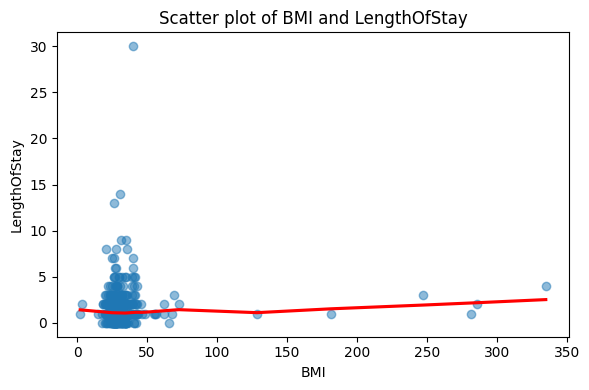

Saved: /content/drive/MyDrive/Colab Notebooks/LOSproject/eda/BMI_LengthOfStay_20250710_164318.png


In [ ]:
#2. The relationship between BMI and LengthOfStay
bmi_cols = [c for c in train_df.columns if re.search(r'bmi', c, re.I)]
if bmi_cols:
    bmi_col = bmi_cols[0]

    tmp_df = train_df[[bmi_col,'LengthOfStay']].copy()
    tmp_df[bmi_col] = pd.to_numeric(tmp_df[bmi_col], errors='coerce')
    tmp_df = tmp_df.dropna(subset=[bmi_col,'LengthOfStay'])

    plt.figure(figsize=(6,4))
    sns.regplot(x=bmi_col, y='LengthOfStay', data=tmp_df,
                lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Scatter plot of {bmi_col} and LengthOfStay")
    plt.xlabel(bmi_col);  plt.ylabel("LengthOfStay")
    plt.tight_layout()
    #>>> Save
    ts  = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
    path = f'{eda_dir}/BMI_LengthOfStay_{ts}.png'
    plt.savefig(path, dpi=300);  plt.show()
    print("Saved:", path)
else:
    print("No column containing 'BMI' found, skip BMI–LOS plot.")

/tmp/ipython-input-7-222067713.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df,


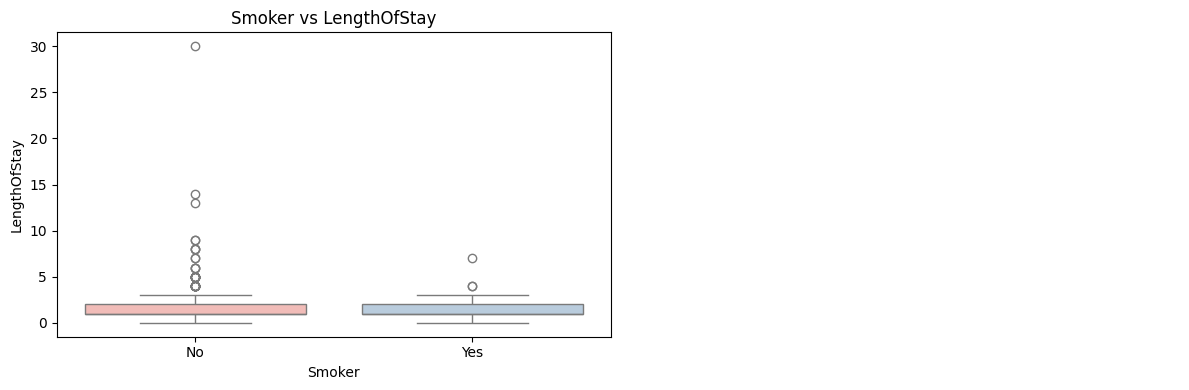

Saved: /content/drive/MyDrive/Colab Notebooks/LOSproject/eda/Categorical_BoxPlots_20250710_165036.png


In [ ]:
#3. The relationship between categorical variables and LengthOfStay
categorical_vars = ['Smoker', 'Support', 'Gender', 'PriorityType']
cats_present = [c for c in categorical_vars if c in train_df.columns]

if cats_present:
    #Put two pictures in each row
    n = len(cats_present)
    cols = 2
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
    axes = axes.flatten()

    for i, cat in enumerate(cats_present):
        sns.boxplot(data=train_df,
                    x=cat,
                    y='LengthOfStay',
                    ax=axes[i],
                    palette='Pastel1')
        axes[i].set_title(f"{cat} vs LengthOfStay")
        axes[i].set_xlabel(cat)
        axes[i].set_ylabel("LengthOfStay")

    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()

    #>>> Save
    ts = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
    path = f'{eda_dir}/Categorical_BoxPlots_{ts}.png'
    fig.savefig(path, dpi=300)
    plt.show()
    print("Saved:", path)
else:
    print("None of the specified categorical variables present.")

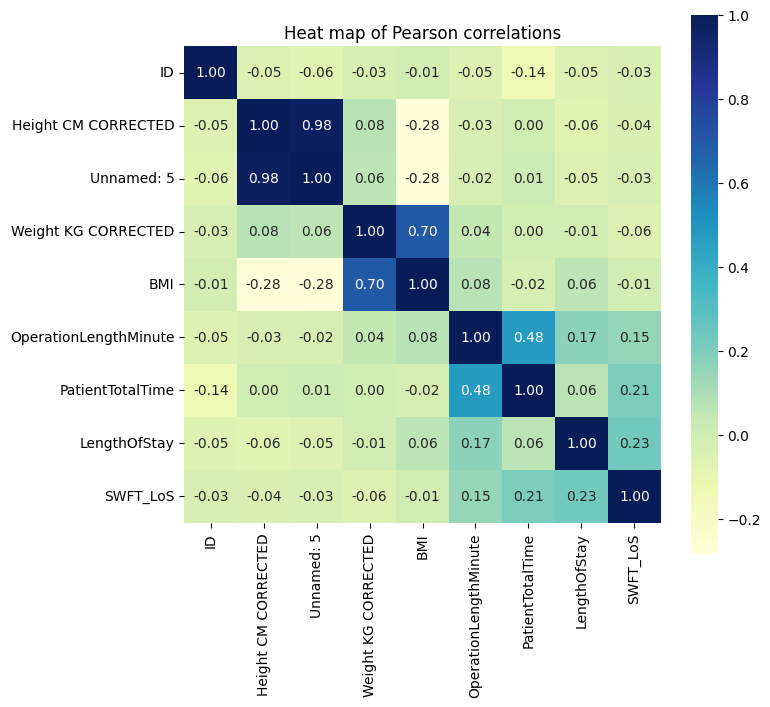

Saved: /content/drive/MyDrive/Colab Notebooks/LOSproject/eda/NumCorr_Heatmap_20250710_165148.png


In [ ]:
#4. Correlation heatmap of numerical variables

#Filter the numerical columns (including the target variable and the encoded numerical features)
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
corr_matrix  = train_df[numeric_cols].corr(method='pearson')
fig, ax = plt.subplots(figsize=(max(8, 0.8*len(numeric_cols)),
                                max(6, 0.8*len(numeric_cols))))
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt=".2f",
            square=True, ax=ax)
ax.set_title("Heat map of Pearson correlations")
plt.tight_layout()

#>>> Save
ts  = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
path = f'{eda_dir}/NumCorr_Heatmap_{ts}.png'
fig.savefig(path, dpi=300);  plt.show()
print("Saved:", path)

In [ ]:
########################################################################################################################################################
"""
Third part
Feature Engineering and Experimental Design)

3-0  Outlier Handling
3-1. Target format selection
"""

#Read the file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LOSproject/artifacts/df_after_encoding.csv')
target_col = 'LengthOfStay'

X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=True)

#Reassemble the target column back into the training set
#which is convenient for conducting feature Exploratory Data Analysis first.
train_df = X_train.copy()
train_df[target_col] = y_train

#--------------    3-0 Outlier Handling   ----------------------
class IQRClipper(BaseEstimator, TransformerMixin):
    #Perform IQR clipping on the specified column
    #new_x = clip(x,  Q1-1.5*IQR,  Q3+1.5*IQR)
    def __init__(self, factor=1.5):
        self.factor = factor
    def fit(self, X, y=None):
        #Calculate the upper and lower bounds of the IQR for each numerical column
        X = pd.DataFrame(X)
        q1  = X.quantile(0.25)
        q3  = X.quantile(0.75)
        iqr = q3 - q1
        self.lower_ = (q1 - self.factor * iqr).values
        self.upper_ = (q3 + self.factor * iqr).values
        return self
    def transform(self, X):
        return pd.DataFrame(X).clip(self.lower_, self.upper_, axis=1).values

#Specify the column of values to be cropped, LOS will not be cropped.
num_for_clip = [c for c in ['Age (years):', 'BMI'] if c in train_df.columns]
#First, convert the columns to be cropped into numerical values
train_df[num_for_clip] = train_df[num_for_clip].apply(
                             pd.to_numeric, errors='coerce')
#Perform IQR trimming
clipper = IQRClipper()
train_df[num_for_clip] = clipper.fit_transform(train_df[num_for_clip])

#----------------------  3‑1 Target format derivation   -----------------

#Binary classification objective: Short hospital stay vs Long hospital stay (threshold 7 days)
#1 indicates long hospital stay (>7 days), while 0 indicates short hospital stay (<=7 days).
y_bin = (y_train > 7).astype(int)
print("Binary classification distribution:\n", y_bin.value_counts())

y = y_bin


#The trained features after trimming
X_train_processed = train_df.drop(columns=[target_col])

print("Outlier clipping done!")
print("Shape of X_train:", X_train_processed.shape)
print("First few rows:\n", X_train_processed.head())



Binary classification distribution:
 LengthOfStay
0    631
1      8
Name: count, dtype: int64
Outlier clipping done!
Shape of X_train: (639, 47)
First few rows:
       ID  Age (years): Height (please input in centimeters)  \
264  265          44.0                                165.1   
615  632          69.0                    1.63 centimetres    
329  330          68.0                                163cm   
342  343          68.0                                  157   
394  395          61.0                            162.56 cm   

    Weight (please input in kilograms)  Height CM CORRECTED  Unnamed: 5  \
264                              95.25                165.0        1.65   
615                   76.20 Kilograms                 163.0        1.67   
329                               83kg                163.0        1.63   
342                                113                157.0        1.57   
394                                 58                162.0        1.62   

     Wei

In [ ]:
#Save the running results to Google Drive
out_dir = '/content/drive/MyDrive/Colab Notebooks/LOSproject/clean_data'
os.makedirs(out_dir, exist_ok=True)

#Save the cropped X_train_processed and y_bin
X_train_processed.to_parquet(f'{out_dir}/X_train_processed.parquet', index=False)
y_bin.to_csv(f'{out_dir}/y_bin.csv', index=False, header=['y_bin'])

#Save the fitting parameters of the clipper (IQRClipper) for reuse in online or other experiments.
joblib.dump(clipper, f'{out_dir}/iqr_clipper.joblib')

print(f'Files saved to: {out_dir}')


Files saved to: /content/drive/MyDrive/Colab Notebooks/LOSproject/clean_data


In [ ]:
#--------------------------    3‑2 Feature scaling declare numerical / categorical columns   --------------------------------------------

ID_COL      = 'ID'
EXCLUDE_COL = [
    ID_COL, target_col,
    'AdmissionDateTime', 'DischargeDateTime',
    'LOS_computed', 'SWFT_LoS'
]

feature_cols = [c for c in train_df.columns if c not in EXCLUDE_COL]

# numeric and categorical feature lists
numeric_features = [
    c for c in ['Age (years):',
                'Height CM CORRECTED',
                'Weight (please input in kilograms)',
                'BMI']
    if c in feature_cols
]
categorical_features = [c for c in feature_cols if c not in numeric_features]

print(f"Numerical features ({len(numeric_features)}):", numeric_features)
print(f"Categorical features ({len(categorical_features)}):",
      categorical_features[:10], '...' if len(categorical_features) > 10 else '')


#--------------------------    3‑3. Cross‑validation schemes   --------------------------------------------
cv_reg = KFold(n_splits=5, shuffle=True, random_state=42)
cv_cls = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# (optional) rolling‑window time CV
if 'AdmissionDateTime' in train_df.columns:
    df_sorted = train_df.sort_values('AdmissionDateTime')
    time_cv   = TimeSeriesSplit(n_splits=5)
    for i, (tr, val) in enumerate(time_cv.split(df_sorted)):
        print(f"[Time‑CV] Fold {i}: train={len(tr)}, val={len(val)}")


#--------------------------    3‑4. Pre‑processing pipelines  (ColumnTransformer + model)   --------------------------------------------

#clean the data
clean_numeric = FunctionTransformer(
    lambda arr: (
        pd.DataFrame(arr)
          .applymap(lambda x:
              pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce'))
          .values),
    feature_names_out='one-to-one'
)

numeric_pipe = Pipeline([
    ('clean',   clean_numeric),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))

])

preprocessor = ColumnTransformer([
    ('num', numeric_pipe,     numeric_features),
    ('cat', categorical_pipe, categorical_features)
])


#  Baseline models & CV
models = {
    "LogReg": LogisticRegression(max_iter=1000),
    "RF":     RandomForestClassifier(
                  n_estimators=300,
                  max_depth=None,
                  class_weight="balanced",
                  random_state=42)
}

for name, clf in models.items():
    pipe = Pipeline([
        ('prep',  preprocessor),
        ('model', clf)
    ])
    acc = cross_val_score(
        pipe,
        X_train_processed[feature_cols],
        y,
        cv=cv_cls,
        scoring='accuracy'
    )
    print(f"{name:<8} | mean ACC: {acc.mean():.3f} ± {acc.std():.3f}")


Numerical features (4): ['Age (years):', 'Height CM CORRECTED', 'Weight (please input in kilograms)', 'BMI']
Categorical features (39): ['Height (please input in centimeters)', 'Unnamed: 5', 'Weight KG CORRECTED', 'Smoker', 'Do you live alone?', 'Will there be someone, such as a family member or friend, who can support you during your initial recovery?', 'Do you have stairs at home?', 'Can you go up and down the stairs without assistance?', 'Do you have downstairs access to a toilet?', 'How far can you currently walk?'] ...
[Time‑CV] Fold 0: train=109, val=106
[Time‑CV] Fold 1: train=215, val=106
[Time‑CV] Fold 2: train=321, val=106
[Time‑CV] Fold 3: train=427, val=106
[Time‑CV] Fold 4: train=533, val=106


/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x:
/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x:
/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x:
/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x:
/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x:
/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x:
/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(la

LogReg   | mean ACC: 0.986 ± 0.003


/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x:
/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x:
/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x:
/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x:
/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x:
/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x:
/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(la

RF       | mean ACC: 0.987 ± 0.004


/tmp/ipython-input-23-1625807311.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x:


In [ ]:
#Saving utilities

#Function used in numeric cleaning
def clean_numeric_arr(arr):
    """strip non‑numeric chars and cast to float"""
    return (
        pd.DataFrame(arr)
          .applymap(lambda x: pd.to_numeric(
              re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce'))
          .values
    )

#Re‑create numeric FunctionTransformer (named)
clean_numeric = FunctionTransformer(clean_numeric_arr,
                                    feature_names_out='one-to-one')

numeric_pipe = Pipeline([
    ('clean',   clean_numeric),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

preprocessor.set_params(num=numeric_pipe)

#Paths
save_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments')
save_dir.mkdir(parents=True, exist_ok=True)
score_path  = save_dir / 'cv_baseline_scores.json'
feat_path   = save_dir / 'feature_lists.json'

# Save CV scores
with open(score_path, 'w') as f:
    json.dump(results, f, indent=2)
print(f'CV scores saved -> {score_path}')

# Save feature name lists
with open(feat_path, 'w') as f:
    json.dump({'numeric': numeric_features,
               'categorical': categorical_features}, f, indent=2)
print(f'Feature lists saved -> {feat_path}')

#  Fit & save the best pipeline
best_name = max(results, key=lambda k: results[k]['mean_acc'])
best_clf  = models[best_name]

best_pipe = Pipeline([
    ('prep',  preprocessor),
    ('model', best_clf)
])


CV scores saved -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/cv_baseline_scores.json
Feature lists saved -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/feature_lists.json


In [ ]:
########################################################################################################################################################
"""
Forth part
Model Training and Comparison


"""

#-------------------------------------------------    4.1.1 Baseline: Linear Regression    --------------------------------------------------------------------

#Load the encoded CSV and define target
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LOSproject/artifacts/df_after_encoding.csv')
target_col = 'LengthOfStay'

X = df.drop(columns=[target_col])
y = df[target_col]

#Split into train / test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

#Re‑assemble train_df for EDA convenience
train_df = X_train.copy()
train_df[target_col] = y_train

#Load numeric and categorical feature lists
feat_path = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/feature_lists.json')
if feat_path.exists():
    with open(feat_path, 'r') as f:
        feat = json.load(f)
    numeric_features     = feat['numeric']
    categorical_features = feat['categorical']
else:
    ## derive lists automatically
    exclude = {'ID', target_col,
               'AdmissionDateTime','DischargeDateTime','LOS_computed','SWFT_LoS'}
    candidate = [c for c in train_df.columns if c not in exclude]
    #numeric = actual numeric dtypes
    numeric_features = train_df[candidate].select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = [c for c in candidate if c not in numeric_features]

#final ordered list of model inputs
feature_cols = numeric_features + categorical_features

X_reg = train_df[feature_cols].copy()
y_reg = train_df[target_col].values

print(f"X_reg shape: {X_reg.shape} | y_reg shape: {y_reg.shape}")
print(f"Numeric features ({len(numeric_features)}): {numeric_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features[:10]} "
      f"{'...' if len(categorical_features)>10 else ''}")

#Build preprocessing pipelines（Clean numeric strings such as '83kg' or '1.63 centimetres' to floats，strip non-numeric chars except dot and minus）
def clean_numeric_arr(arr):
    df0 = pd.DataFrame(arr)
    return df0.applymap(
        lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')
    ).values

numeric_pipe = Pipeline([
    ('clean',   FunctionTransformer(clean_numeric_arr, feature_names_out='one-to-one')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler()),
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipe,     numeric_features),
    ('cat', categorical_pipe, categorical_features),
])

#Combine the preprocessor with any sklearn estimator
def make_pipe(estimator):
    return Pipeline([
        ('prep',  preprocessor),
        ('model', estimator)
    ])

X_reg shape: (639, 43) | y_reg shape: (639,)
Numeric features (4): ['Age (years):', 'Height CM CORRECTED', 'Weight (please input in kilograms)', 'BMI']
Categorical features (39): ['Height (please input in centimeters)', 'Unnamed: 5', 'Weight KG CORRECTED', 'Smoker', 'Do you live alone?', 'Will there be someone, such as a family member or friend, who can support you during your initial recovery?', 'Do you have stairs at home?', 'Can you go up and down the stairs without assistance?', 'Do you have downstairs access to a toilet?', 'How far can you currently walk?'] ...


In [ ]:
# --------------------------------------------------------    4.1.2 Models & alpha grid    ----------------------------------------------------------------------

# alpha grid for Ridge / Lasso
alphas = [0.01, 0.1, 1.0]

# build a dict of estimators
models_reg = {
    'Linear'      : LinearRegression(),
    **{f'Ridge_{a}': Ridge(alpha=a) for a in alphas},
    **{f'Lasso_{a}': Lasso(alpha=a, max_iter=5000, tol=1e-4) for a in alphas},
}

print("Prepared regressors:", list(models_reg.keys()))


Prepared regressors: ['Linear', 'Ridge_0.01', 'Ridge_0.1', 'Ridge_1.0', 'Lasso_0.01', 'Lasso_0.1', 'Lasso_1.0']


In [ ]:
# --------------------------------------------------------    4.1.3 Repeated 5-fold CV + logging to Drive    ----------------------------------------------------------------------

exp_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines')
exp_dir.mkdir(parents=True, exist_ok=True)

#repeat seeds: 3 repeats x 5 folds = 15 runs per model
seeds = [42, 2023, 7]

# scorers for regression
scoring = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2' : 'r2'
}

records = []

#5-fold CV with shuffling
for seed in seeds:
    cv = KFold(n_splits=5, shuffle=True, random_state=seed)

    for name, est in models_reg.items():
        pipe   = make_pipe(est)
        cv_res = cross_validate(
            pipe,
            X_reg, y_reg,
            cv=cv,
            scoring=scoring,
            return_train_score=False,
            n_jobs=-1
        )

        #convert to positive MAE/RMSE per fold
        mae_folds  = -cv_res['test_mae']
        rmse_folds = np.sqrt(-cv_res['test_mse'])
        r2_folds   = cv_res['test_r2']

        #log one row per (model, seed)
        records.append({
            'model'    : name,
            'seed'     : seed,
            'mae_mean' : float(mae_folds.mean()),
            'mae_std'  : float(mae_folds.std()),
            'rmse_mean': float(rmse_folds.mean()),
            'rmse_std' : float(rmse_folds.std()),
            'r2_mean'  : float(r2_folds.mean()),
            'r2_std'   : float(r2_folds.std()),
            'n_folds'  : int(len(mae_folds))
        })

        print(f"{name:10s} | seed {seed} | "
              f"MAE {mae_folds.mean():.3f}±{mae_folds.std():.3f} | "
              f"RMSE {rmse_folds.mean():.3f}±{rmse_folds.std():.3f} | "
              f"R² {r2_folds.mean():.3f}±{r2_folds.std():.3f}")

#save per-seed results
results_df = pd.DataFrame(records)
results_csv = exp_dir / 'cv_lin_ridge_lasso.csv'
results_df.to_csv(results_csv, index=False)
print(f"\nSaved per-seed CV results -> {results_csv}")

#aggregate across seeds
summary = (results_df
           .groupby('model', as_index=True)
           .agg(mae_mean=('mae_mean', 'mean'),
                mae_std =('mae_mean', 'std'),
                rmse_mean=('rmse_mean', 'mean'),
                rmse_std =('rmse_mean', 'std'),
                r2_mean  =('r2_mean', 'mean'),
                r2_std   =('r2_mean', 'std'))
           .sort_values('rmse_mean'))
summary_csv = exp_dir / 'cv_lin_ridge_lasso_summary.csv'
summary.round(4).to_csv(summary_csv)
print(f"Saved summary -> {summary_csv}")

#quick view in notebook
print("\nTop models by RMSE (lower is better):")
print(summary.round(3).head(10))


Linear     | seed 42 | MAE 1.047±0.059 | RMSE 1.778±0.514 | R² -0.225±0.274
Ridge_0.01 | seed 42 | MAE 1.046±0.059 | RMSE 1.777±0.514 | R² -0.224±0.273
Ridge_0.1  | seed 42 | MAE 1.041±0.056 | RMSE 1.771±0.513 | R² -0.216±0.270
Ridge_1.0  | seed 42 | MAE 1.018±0.042 | RMSE 1.745±0.509 | R² -0.179±0.268
Lasso_0.01 | seed 42 | MAE 0.816±0.080 | RMSE 1.599±0.593 | R² 0.072±0.115
Lasso_0.1  | seed 42 | MAE 0.866±0.082 | RMSE 1.636±0.621 | R² 0.037±0.080
Lasso_1.0  | seed 42 | MAE 0.929±0.067 | RMSE 1.688±0.613 | R² -0.033±0.053
Linear     | seed 2023 | MAE 1.092±0.087 | RMSE 1.901±0.620 | R² -0.311±0.229
Ridge_0.01 | seed 2023 | MAE 1.091±0.086 | RMSE 1.899±0.619 | R² -0.309±0.228
Ridge_0.1  | seed 2023 | MAE 1.083±0.082 | RMSE 1.890±0.611 | R² -0.299±0.228
Ridge_1.0  | seed 2023 | MAE 1.059±0.079 | RMSE 1.851±0.594 | R² -0.246±0.219
Lasso_0.01 | seed 2023 | MAE 0.832±0.083 | RMSE 1.627±0.609 | R² 0.081±0.099
Lasso_0.1  | seed 2023 | MAE 0.863±0.058 | RMSE 1.649±0.587 | R² 0.050±0.026
Lass

In [ ]:
# -------------------------------------    4.1.4 Fit best model on train, evaluate on test, and save artifacts    -------------------------------------------------------


exp_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines')
exp_dir.mkdir(parents=True, exist_ok=True)

#pick the best model name by lowest RMSE
summary_csv = exp_dir / 'cv_lin_ridge_lasso_summary.csv'
summary     = pd.read_csv(summary_csv, index_col=0)
if 'summary' not in globals():
    summary = pd.read_csv(summary_csv, index_col=0)

#pick the first row after sorting by rmse_mean
best_name = summary.index[0]
print(f"Best baseline by RMSE: {best_name}")

#Build estimator from its name (fallback in case models_reg is unavailable)
def make_estimator_by_name(name: str):
    if name == 'Linear':
        return LinearRegression()
    m = re.match(r'^Ridge_(.*)$', name)
    if m:
        return Ridge(alpha=float(m.group(1)))
    m = re.match(r'^Lasso_(.*)$', name)
    if m:
        return Lasso(alpha=float(m.group(1)), max_iter=5000, tol=1e-4)
    raise ValueError(f"Unknown model name: {name}")

#Build & fit the pipeline
best_est = make_estimator_by_name(best_name)

#Fit best pipeline on the full training set used in CV
best_pipe = make_pipe(best_est)
best_pipe.fit(X_reg[feature_cols], y_reg)

#Evaluate on the hold‑out test set
X_test_reg = X_test[feature_cols].copy()
y_pred = best_pipe.predict(X_test_reg)

mae   = mean_absolute_error(y_test, y_pred)
mse   = mean_squared_error(y_test, y_pred)
rmse  = np.sqrt(mse)
r2    = r2_score(y_test, y_pred)

metrics = {
    'model': best_name,
    'mae':   float(mae),
    'rmse':  float(rmse),
    'r2':    float(r2)
}
print(f"[Test] {best_name} | MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")


#Save artifacts to Drive

# (1) fitted pipeline
model_path = exp_dir / f'best_baseline_{best_name}.joblib'
joblib.dump(best_pipe, model_path, compress=3)

# (2) test metrics
metrics_path = exp_dir / 'test_metrics_baseline.json'
with open(metrics_path, 'w') as f:
    json.dump(metrics, f, indent=2)

# (3) test predictions
pred_df = pd.DataFrame({
    'ID'        : X_test['ID'].values if 'ID' in X_test.columns else np.arange(len(y_test)),
    'y_true'    : y_test.values,
    'y_pred'    : y_pred,
    'abs_error' : np.abs(y_test.values - y_pred),
})
pred_csv = exp_dir / 'test_predictions_baseline.csv'
pred_df.to_csv(pred_csv, index=False)

print(f"Saved pipeline -> {model_path}")
print(f"Saved test metrics -> {metrics_path}")
print(f"Saved test predictions -> {pred_csv}")


Best baseline by RMSE: Lasso_0.01


/tmp/ipython-input-8-1658861649.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-8-1658861649.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


[Test] Lasso_0.01 | MAE=6.034 | RMSE=67.577 | R²=-4685.765
Saved pipeline -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines/best_baseline_Lasso_0.01.joblib
Saved test metrics -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines/test_metrics_baseline.json
Saved test predictions -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines/test_predictions_baseline.csv


In [ ]:
########################################################################################################################################################


#-------------------------------------------------    4.2 Random Forest    --------------------------------------------------------------------

#-------------------------------------------------    4.2.1 Data preparation and feature loading    --------------------------------------------------------------------

#Load the encoded CSV and define target
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LOSproject/artifacts/df_after_encoding.csv')
target_col = 'LengthOfStay'

X = df.drop(columns=[target_col])
y = df[target_col]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

#Load feature‐lists.json
feat_path = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/feature_lists.json')
with open(feat_path, 'r') as f:
    feat = json.load(f)

numeric_features     = feat['numeric']
categorical_features = feat['categorical']

#Build X_reg ， y_reg
feature_cols = numeric_features + categorical_features
X_reg = X_train[feature_cols].copy()
y_reg = y_train.values

print("Loaded:")
print("  • X_reg:", X_reg.shape,
      "  • y_reg:", y_reg.shape)
print("  • X_test:", X_test.shape,
      "  • y_test:", y_test.shape)
print("  • numeric features:", len(numeric_features))
print("  • categorical features:", len(categorical_features))

Loaded:
  • X_reg: (639, 43)   • y_reg: (639,)
  • X_test: (160, 47)   • y_test: (160,)
  • numeric features: 4
  • categorical features: 39


In [ ]:

#Save the data for the subsequent use of the model.
save_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines')
save_dir.mkdir(parents=True, exist_ok=True)

#Dump the train/test arrays， save X_reg, y_reg, X_test, y_test as .joblib for fast reload
joblib.dump(X_reg, save_dir / 'X_reg.joblib')
joblib.dump(y_reg, save_dir / 'y_reg.joblib')
joblib.dump(X_test, save_dir / 'X_test.joblib')
joblib.dump(y_test, save_dir / 'y_test.joblib')

#Dump the feature‐lists
feat = {
    'numeric':     numeric_features,
    'categorical': categorical_features
}
with open(save_dir / 'feature_lists.json', 'w') as f:
    json.dump(feat, f, indent=2)

print("Saved:")
print(" ·", save_dir/'X_reg.joblib')
print(" ·", save_dir/'y_reg.joblib')
print(" ·", save_dir/'X_test.joblib')
print(" ·", save_dir/'y_test.joblib')
print(" ·", save_dir/'feature_lists.json')

Saved:
 · /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines/X_reg.joblib
 · /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines/y_reg.joblib
 · /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines/X_test.joblib
 · /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines/y_test.joblib
 · /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines/feature_lists.json


In [ ]:
#-------------------------------------------------    4.2.2   K-fold cross-validation training    --------------------------------------------------------------------

"""
I will employ repeated K-fold cross-validation to obtain a robust performance evaluation.
Additionally, I will assess the model's performance on an independent test set and save the predicted results and evaluation metrics from the test set.
"""

#List of specified numerical / categorical features
numeric_features = [
    'Age (years):',
    'Height CM CORRECTED',
    'Weight (please input in kilograms)',
    'BMI',
]
categorical_features = [
    c for c in X_reg.columns if c not in numeric_features
]

#Rebuild the preprocessor ColumnTransformer
def clean_numeric_arr(arr):
    df0 = pd.DataFrame(arr)
    return df0.applymap(
        lambda x: pd.to_numeric(
            re.sub(r'[^0-9.\-]+', '', str(x)),
            errors='coerce')
    ).values

numeric_pipe = Pipeline([
    ('clean',   FunctionTransformer(clean_numeric_arr, feature_names_out='one-to-one')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer([
    ('num', numeric_pipe,     numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

#Run the fit_transform operation on X_reg, get the pure numpy array X_proc, shape = (n_samples, n_transformed_features)
X_proc = preprocessor.fit_transform(X_reg)
y_np   = y_reg.copy()

#Define the cross-validation parameters, use 5-fold cross-validation and collect the results of each fold.
seeds = [42, 2023, 7]
n_splits = 5
cv_results = []


for seed in seeds:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    #Divide the training set and the validation set
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_proc), start=1):
        X_tr, X_va = X_proc[train_idx], X_proc[val_idx]
        y_tr, y_va = y_np[train_idx],   y_np[val_idx]

        #Initialize and train the random forest
        rf = RandomForestRegressor(
            n_estimators=300,
            random_state=seed,
            n_jobs=-1
        )
        rf.fit(X_tr, y_tr)
        y_pred = rf.predict(X_va)

        ##Calculate evaluation indicators and record
        mae  = mean_absolute_error(y_va, y_pred)
        mse  = mean_squared_error(y_va, y_pred)
        rmse = np.sqrt(mse)
        r2   = r2_score(y_va, y_pred)
        cv_results.append({
            'seed' : seed, 'fold': fold,
            'MAE'  : mae,
            'RMSE' : rmse,
            'R2'   : r2
        })


#Finally, summarize it into a DataFrame.
cv_df = pd.DataFrame(cv_results)
print("CV summary by seed:")
print(cv_df.groupby('seed')[['MAE','RMSE','R2']].agg(['mean','std']))


/tmp/ipython-input-4258046031.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


CV summary by seed:
           MAE                RMSE                  R2          
          mean       std      mean       std      mean       std
seed                                                            
7     0.717201  0.059840  1.567136  0.566154  0.165169  0.069170
42    0.711640  0.129905  1.531970  0.731448  0.187139  0.111297
2023  0.701311  0.089732  1.542078  0.641315  0.178661  0.064557


In [ ]:
#Create a new dictionary for random forest model
rf_dir = Path("/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_baseline")
rf_dir.mkdir(parents=True, exist_ok=True)

#Save the detailed results of cross-validation to CSV
cv_df.to_csv(rf_dir / "cv_rf.csv", index=False)

#Calculate the overall mean and standard deviation of each indicator
summary_df = cv_df[["MAE", "RMSE", "R2"]].agg(['mean', 'std']).T

#Rename the column names to "Mean" and "Std"
summary_df.columns = ["Mean", "Std"]
summary_df.index.name = "Metric"

#Save the summary table to CSV
summary_df.to_csv(rf_dir / "cv_rf_summary.csv")

In [ ]:
#-------------------------------------------------    4.2.3   Test set prediction and model saving    --------------------------------------------------------------------

#Rebuild and fit the final Random Forest model on the entire training set
final_rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

# Fit the model (with preprocessing)
rf_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', final_rf)
])
rf_pipe.fit(X_reg, y_reg)

#Evaluate on the hold-out test set
X_test_reg = X_test[feature_cols].copy()
y_pred = rf_pipe.predict(X_test_reg)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"[Test] Random Forest | MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")


/tmp/ipython-input-4258046031.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


[Test] Random Forest | MAE=0.579 | RMSE=0.885 | R²=0.196


/tmp/ipython-input-4258046031.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


In [ ]:
# Save artifacts to Drive
rf_dir = Path("/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_baseline")
rf_dir.mkdir(parents=True, exist_ok=True)

#Save the model
model_path = rf_dir / 'best_random_forest.joblib'
joblib.dump(rf_pipe, model_path, compress=3)
print(f"Saved pipeline -> {model_path}")

#Save the test set metrics
metrics = {
    'model': 'RandomForest',
    'mae': float(mae),
    'rmse': float(rmse),
    'r2': float(r2)
}
metrics_path = rf_dir / 'test_metrics_rf.json'
with open(metrics_path, 'w') as f:
    json.dump(metrics, f, indent=2)
print(f"Saved test metrics -> {metrics_path}")

#Save the prediction results
pred_df = pd.DataFrame({
    'ID': X_test['ID'].values if 'ID' in X_test.columns else np.arange(len(y_test)),
    'y_true': y_test.values,
    'y_pred': y_pred,
    'abs_error': np.abs(y_test.values - y_pred)
})
pred_csv = rf_dir / 'test_predictions_rf.csv'
pred_df.to_csv(pred_csv, index=False)
print(f"Saved test predictions -> {pred_csv}")

Saved pipeline -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_baseline/best_random_forest.joblib
Saved test metrics -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_baseline/test_metrics_rf.json
Saved test predictions -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_baseline/test_predictions_rf.csv


In [ ]:
#The model has certain predictive capabilities, but there is still a lot of room for optimization.
#Therefore, try again with automatic parameter adjustment.

def objective(trial):
    #Define the parameter search space
    n_estimators = trial.suggest_int('n_estimators', 200, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    #Define the model
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    #Cross-validation (using the negative mean square error as the metric, the lower the RMSE, the better.)
    scores = cross_val_score(
        Pipeline([('prep', preprocessor), ('model', rf)]),
        X_reg, y_reg, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1
    )
    return -scores.mean()

#Start the Optuna hyperparameter tuning
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best trial:", study.best_trial.params)


[I 2025-08-04 18:37:00,528] A new study created in memory with name: no-name-827f1a2e-f503-4fef-b8d4-6ce2d5a70e92
[I 2025-08-04 18:38:03,513] Trial 0 finished with value: 1.5332243960867278 and parameters: {'n_estimators': 263, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 0 with value: 1.5332243960867278.
[I 2025-08-04 18:39:27,090] Trial 1 finished with value: 1.5481351095648683 and parameters: {'n_estimators': 809, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 0 with value: 1.5332243960867278.
[I 2025-08-04 18:39:34,244] Trial 2 finished with value: 1.5522029266197985 and parameters: {'n_estimators': 474, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 1.5332243960867278.
[I 2025-08-04 18:39:40,951] Trial 3 finished with value: 1.6212776904241366 and parameters: {'n_estimators': 480, 'max_depth': 16, 'min_s

Best trial: {'n_estimators': 887, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [ ]:
#Automatically input the optimal parameters into the model and re-train it using the entire training set

#Take best params from Optuna and build final RF
best_params = study.best_params.copy()
best_params.update({'random_state': 42, 'n_jobs': -1})
rf_best = RandomForestRegressor(**best_params)

#Build pipeline (re-use your preprocessor) and fit on full training set
rf_pipe_best = Pipeline([
    ('prep',  preprocessor),
    ('model', rf_best)
])
rf_pipe_best.fit(X_reg, y_reg)

#Evaluate on the hold-out test set
X_test_reg = X_test[feature_cols].copy()
y_pred = rf_pipe_best.predict(X_test_reg)

mae  = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f"[Test] RF(Optuna) | MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")
print("Best params:", best_params)



/tmp/ipython-input-4258046031.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-4258046031.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


[Test] RF(Optuna) | MAE=0.592 | RMSE=0.889 | R²=0.189
Best params: {'n_estimators': 887, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'random_state': 42, 'n_jobs': -1}


In [ ]:
#Save artifacts to Drive
out_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_optuna')
out_dir.mkdir(parents=True, exist_ok=True)

#fitted pipeline
model_path = out_dir / 'rf_optuna_pipeline.joblib'
joblib.dump(rf_pipe_best, model_path, compress=3)

#test metrics (+ best params for traceability)
metrics = {
    'mae': float(mae), 'rmse': float(rmse), 'r2': float(r2),
    'best_params': best_params
}
with open(out_dir / 'rf_optuna_test_metrics.json', 'w') as f:
    json.dump(metrics, f, indent=2)

#test predictions
pred_df = pd.DataFrame({
    'ID': X_test['ID'].values if 'ID' in X_test.columns else np.arange(len(y_test)),
    'y_true': y_test.values,
    'y_pred': y_pred,
    'abs_error': np.abs(y_test.values - y_pred)
})
pred_df.to_csv(out_dir / 'rf_optuna_test_predictions.csv', index=False)

#full Optuna trial history
try:
    trials_df = study.trials_dataframe(attrs=('number', 'value', 'params', 'state'))
    trials_df.to_csv(out_dir / 'optuna_trials_rf.csv', index=False)
except Exception:
    pass  # older optuna may not have attrs argument

#feature importance
try:
    feat_names = rf_pipe_best.named_steps['prep'].get_feature_names_out()
    importances = rf_pipe_best.named_steps['model'].feature_importances_
    fi = (pd.DataFrame({'feature': feat_names, 'importance': importances})
          .sort_values('importance', ascending=False))
    fi.to_csv(out_dir / 'rf_optuna_feature_importance.csv', index=False)
except Exception as e:
    print("Skip feature importance:", e)

print(f"Saved pipeline -> {model_path}")
print(f"Saved metrics  -> {out_dir/'rf_optuna_test_metrics.json'}")
print(f"Saved preds    -> {out_dir/'rf_optuna_test_predictions.csv'}")

Saved pipeline -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_optuna/rf_optuna_pipeline.joblib
Saved metrics  -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_optuna/rf_optuna_test_metrics.json
Saved preds    -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_optuna/rf_optuna_test_predictions.csv


In [ ]:
###############################################################################################################################################################


#-------------------------------------------------    4.3 XGBoost    --------------------------------------------------------------------

#-------------------------------------------------    4.3.1 Data preparation and feature loading    --------------------------------------------------------------------
# Load the prepared train/test data and feature lists from the previous section
data_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines')
X_reg = joblib.load(data_dir / 'X_reg.joblib')
y_reg = joblib.load(data_dir / 'y_reg.joblib')
X_test = joblib.load(data_dir / 'X_test.joblib')
y_test = joblib.load(data_dir / 'y_test.joblib')

with open(data_dir / 'feature_lists.json', 'r') as f:
    feat = json.load(f)
numeric_features = feat['numeric']
categorical_features = feat['categorical']
feature_cols = numeric_features + categorical_features

print("Loaded saved dataset:")
print("  • X_reg:", X_reg.shape, "  • y_reg:", y_reg.shape)
print("  • X_test:", X_test.shape, "  • y_test:", y_test.shape)
print("  • numeric features:", len(numeric_features))
print("  • categorical features:", len(categorical_features))

Loaded saved dataset:
  • X_reg: (639, 43)   • y_reg: (639,)
  • X_test: (160, 47)   • y_test: (160,)
  • numeric features: 4
  • categorical features: 39


In [ ]:
#-------------------------------------------------    4.3.2 K-fold cross-validation training    --------------------------------------------------------------------
"""
Similar to the Random Forest, I will perform repeated K-fold cross-validation for XGBoost
to evaluate its performance robustly. We will then test on the independent test set.
"""

#Define which features are numeric vs categorical
numeric_features = [
    'Age (years):',
    'Height CM CORRECTED',
    'Weight (please input in kilograms)',
    'BMI',
]
categorical_features = [c for c in X_reg.columns if c not in numeric_features]

#Rebuild the preprocessing pipeline
def clean_numeric_arr(arr):
    df0 = pd.DataFrame(arr)
    return df0.applymap(
        lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')
    ).values

numeric_pipe = Pipeline([
    ('clean',   FunctionTransformer(clean_numeric_arr, feature_names_out='one-to-one')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer([
    ('num', numeric_pipe,     numeric_features),
    ('cat', categorical_pipe, categorical_features)
])


#Transform the training features to a numeric array for cross-validation
X_proc = preprocessor.fit_transform(X_reg)
y_np   = y_reg.copy()

#Set up cross-validation parameters
seeds = [42, 2023, 7]
n_splits = 5
cv_results = []

# Perform repeated K-fold cross-validation
for seed in seeds:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_proc), start=1):
        X_tr, X_va = X_proc[train_idx], X_proc[val_idx]
        y_tr, y_va = y_np[train_idx], y_np[val_idx]

        # Initialize and train the XGBoost regressor
        xgb_model = XGBRegressor(
            n_estimators=300,
            random_state=seed,
            n_jobs=-1
        )
        xgb_model.fit(X_tr, y_tr)
        y_pred = xgb_model.predict(X_va)

        # Calculate evaluation metrics for this fold and record them
        mae  = mean_absolute_error(y_va, y_pred)
        mse  = mean_squared_error(y_va, y_pred)
        rmse = np.sqrt(mse)
        r2   = r2_score(y_va, y_pred)
        cv_results.append({
            'seed': seed, 'fold': fold,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        })

# Summarize cross-validation results
cv_df = pd.DataFrame(cv_results)
print("CV summary by seed:")
print(cv_df.groupby('seed')[['MAE','RMSE','R2']].agg(['mean','std']))


/tmp/ipython-input-153211031.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


CV summary by seed:
           MAE                RMSE                  R2          
          mean       std      mean       std      mean       std
seed                                                            
7     0.794590  0.083256  1.605165  0.587959  0.122953  0.121488
42    0.784119  0.147578  1.568833  0.734872  0.140731  0.126350
2023  0.772354  0.096721  1.580265  0.616356  0.118987  0.106711


In [ ]:
#-------------------------------------------------    4.3.3 Test set prediction and model saving    --------------------------------------------------------------------

# Create directory for XGBoost baseline results
xgb_dir = Path("/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/xgboost_baseline")
xgb_dir.mkdir(parents=True, exist_ok=True)

# Save the detailed cross-validation results and summary
cv_df.to_csv(xgb_dir / "cv_xgb.csv", index=False)
summary_df = cv_df[["MAE", "RMSE", "R2"]].agg(['mean', 'std']).T
summary_df.columns = ["Mean", "Std"]
summary_df.index.name = "Metric"
summary_df.to_csv(xgb_dir / "cv_xgb_summary.csv")

# Train a final XGBoost model on the entire training set
final_xgb = XGBRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
xgb_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', final_xgb)
])
xgb_pipe.fit(X_reg, y_reg)

# Evaluate the model on the hold-out test set
X_test_reg = X_test[feature_cols].copy()
y_pred = xgb_pipe.predict(X_test_reg)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)
print(f"[Test] XGBoost | MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")

/tmp/ipython-input-153211031.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


[Test] XGBoost | MAE=0.653 | RMSE=0.948 | R²=0.077


/tmp/ipython-input-153211031.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


In [ ]:
# Save the baseline XGBoost model and test results
model_path = xgb_dir / 'best_xgboost.joblib'
joblib.dump(xgb_pipe, model_path, compress=3)
print(f"Saved XGBoost pipeline -> {model_path}")

# Save test set metrics to JSON
metrics = {
    'model': 'XGBoost',
    'mae': float(mae),
    'rmse': float(rmse),
    'r2': float(r2)
}
metrics_path = xgb_dir / 'test_metrics_xgb.json'
with open(metrics_path, 'w') as f:
    json.dump(metrics, f, indent=2)
print(f"Saved test metrics -> {metrics_path}")

# Save the test set predictions to CSV
pred_df = pd.DataFrame({
    'ID': X_test['ID'].values if 'ID' in X_test.columns else np.arange(len(y_test)),
    'y_true': y_test.values,
    'y_pred': y_pred,
    'abs_error': np.abs(y_test.values - y_pred)
})
pred_csv = xgb_dir / 'test_predictions_xgb.csv'
pred_df.to_csv(pred_csv, index=False)
print(f"Saved test predictions -> {pred_csv}")

Saved XGBoost pipeline -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/xgboost_baseline/best_xgboost.joblib
Saved test metrics -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/xgboost_baseline/test_metrics_xgb.json
Saved test predictions -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/xgboost_baseline/test_predictions_xgb.csv


In [ ]:
#Now, let's perform hyperparameter tuning using Optuna to further improve performance.

def objective(trial):
    #Define the hyperparameter search space for XGBoost
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0, step=0.1)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0, step=0.1)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    gamma = trial.suggest_float('gamma', 0.0, 5.0)

    #Define the model with given hyperparameters
    xgb_model = XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        min_child_weight=min_child_weight,
        gamma=gamma,
        random_state=42,
        n_jobs=-1
    )
    #Perform 5-fold cross-validation and use negative RMSE as the metric to minimize
    scores = cross_val_score(
        Pipeline([('prep', preprocessor), ('model', xgb_model)]),
        X_reg, y_reg, cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    return -scores.mean()

#Start the Optuna hyperparameter tuning
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best trial hyperparameters:", study.best_trial.params)

#Take the best hyperparameters and train a final XGBoost model on the full training set
best_params = study.best_params.copy()
best_params.update({'random_state': 42, 'n_jobs': -1})
xgb_best = XGBRegressor(**best_params)

xgb_pipe_best = Pipeline([
    ('prep', preprocessor),
    ('model', xgb_best)
])
xgb_pipe_best.fit(X_reg, y_reg)

#Evaluate the tuned model on the test set
y_pred = xgb_pipe_best.predict(X_test_reg)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)
print(f"[Test] XGB(Optuna) | MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")
print("Best hyperparameters:", best_params)


[I 2025-08-04 22:16:53,890] A new study created in memory with name: no-name-8e6e6277-aa2d-4e7f-b914-ca1c4bc3ff20
[I 2025-08-04 22:17:09,240] Trial 0 finished with value: 1.5742286351629569 and parameters: {'n_estimators': 317, 'max_depth': 12, 'learning_rate': 0.02467477439434118, 'subsample': 0.5, 'colsample_bytree': 0.8, 'min_child_weight': 6, 'gamma': 2.5160832992918003}. Best is trial 0 with value: 1.5742286351629569.
[I 2025-08-04 22:17:14,011] Trial 1 finished with value: 1.6309216854395987 and parameters: {'n_estimators': 367, 'max_depth': 13, 'learning_rate': 0.19798866055960607, 'subsample': 0.6, 'colsample_bytree': 1.0, 'min_child_weight': 3, 'gamma': 3.3769387846095795}. Best is trial 0 with value: 1.5742286351629569.
[I 2025-08-04 22:17:17,720] Trial 2 finished with value: 1.629452160065862 and parameters: {'n_estimators': 185, 'max_depth': 5, 'learning_rate': 0.14835755593437017, 'subsample': 0.8, 'colsample_bytree': 0.6, 'min_child_weight': 4, 'gamma': 4.608655062187355}

Best trial hyperparameters: {'n_estimators': 472, 'max_depth': 12, 'learning_rate': 0.014696668566408598, 'subsample': 0.6, 'colsample_bytree': 1.0, 'min_child_weight': 1, 'gamma': 0.4184183086639861}
[Test] XGB(Optuna) | MAE=0.611 | RMSE=0.897 | R²=0.174
Best hyperparameters: {'n_estimators': 472, 'max_depth': 12, 'learning_rate': 0.014696668566408598, 'subsample': 0.6, 'colsample_bytree': 1.0, 'min_child_weight': 1, 'gamma': 0.4184183086639861, 'random_state': 42, 'n_jobs': -1}


/tmp/ipython-input-153211031.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


In [ ]:
#Save artifacts for the tuned XGBoost model
optuna_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/xgboost_optuna')
optuna_dir.mkdir(parents=True, exist_ok=True)

#Save the tuned model pipeline
tuned_model_path = optuna_dir / 'xgb_optuna_pipeline.joblib'
joblib.dump(xgb_pipe_best, tuned_model_path, compress=3)

#Save test metrics (including best hyperparameters) to JSON
metrics = {
    'mae': float(mae),
    'rmse': float(rmse),
    'r2': float(r2),
    'best_params': best_params
}
with open(optuna_dir / 'xgb_optuna_test_metrics.json', 'w') as f:
    json.dump(metrics, f, indent=2)

#Save test set predictions for the tuned model
pred_df = pd.DataFrame({
    'ID': X_test['ID'].values if 'ID' in X_test.columns else np.arange(len(y_test)),
    'y_true': y_test.values,
    'y_pred': y_pred,
    'abs_error': np.abs(y_test.values - y_pred)
})
pred_df.to_csv(optuna_dir / 'xgb_optuna_test_predictions.csv', index=False)

#Save the full Optuna trials history to CSV (if supported)
try:
    trials_df = study.trials_dataframe(attrs=('number', 'value', 'params', 'state'))
    trials_df.to_csv(optuna_dir / 'optuna_trials_xgb.csv', index=False)
except Exception:
    pass  # Older Optuna versions may not support the attrs parameter

#Save feature importance from the tuned model
try:
    feat_names = xgb_pipe_best.named_steps['prep'].get_feature_names_out()
    importances = xgb_pipe_best.named_steps['model'].feature_importances_
    fi_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
    fi_df.sort_values('importance', ascending=False, inplace=True)
    fi_df.to_csv(optuna_dir / 'xgb_optuna_feature_importance.csv', index=False)
except Exception as e:
    print("Skip feature importance:", e)

print(f"Saved tuned model pipeline -> {tuned_model_path}")
print(f"Saved tuned model metrics -> {optuna_dir/'xgb_optuna_test_metrics.json'}")
print(f"Saved tuned model predictions -> {optuna_dir/'xgb_optuna_test_predictions.csv'}")


Saved tuned model pipeline -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/xgboost_optuna/xgb_optuna_pipeline.joblib
Saved tuned model metrics -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/xgboost_optuna/xgb_optuna_test_metrics.json
Saved tuned model predictions -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/xgboost_optuna/xgb_optuna_test_predictions.csv


In [ ]:
###############################################################################################################################################################


#-------------------------------------------------    4.4 CatBoost    --------------------------------------------------------------------

#-------------------------------------------------    4.4.1 Data preparation and feature loading    --------------------------------------------------------------------
# Load the prepared train/test data and feature lists from the previous section

data_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines')

##Load the training set and test set data.
X_reg  = joblib.load(data_dir / 'X_reg.joblib')
y_reg  = joblib.load(data_dir / 'y_reg.joblib')
X_test = joblib.load(data_dir / 'X_test.joblib')
y_test = joblib.load(data_dir / 'y_test.joblib')

#Load the list of feature names
with open(data_dir / 'feature_lists.json', 'r') as f:
    feat = json.load(f)
numeric_features     = feat['numeric']
categorical_features = feat['categorical']
feature_cols = numeric_features + categorical_features

print("Loaded saved dataset:")
print("  • X_reg:", X_reg.shape, "  • y_reg:", y_reg.shape)
print("  • X_test:", X_test.shape, "  • y_test:", y_test.shape)
print("  • numeric features:", len(numeric_features))
print("  • categorical features:", len(categorical_features))

Loaded saved dataset:
  • X_reg: (639, 43)   • y_reg: (639,)
  • X_test: (160, 47)   • y_test: (160,)
  • numeric features: 4
  • categorical features: 39


In [ ]:
#-------------------------------------------------    4.4.2 Build a Pipeline for preprocessing and modeling    --------------------------------------------------------------------

"""
Since CatBoost can directly handle categorical features, we will fill in the missing values and standardize the numerical features during the preprocessing step,
and only fill in the missing values for the categorical features.
Then create a custom DataFramePreprocessor converter to ensure that the preprocessed data is returned as a pandas DataFrame,
so that CatBoost can correctly identify the feature types:
"""

#Transformer for filling and scaling numerical features, filling categorical features, without altering the structure of the DataFrame
class DataFramePreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, numeric_features, categorical_features):
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        #Numeric feature filler and scaler
        self.num_imputer = SimpleImputer(strategy="median")
        self.num_scaler = StandardScaler()
        #Categorical feature filler (filling missing values with the special string "__missing__")
        self.cat_imputer = SimpleImputer(strategy="constant", fill_value="__missing__")
    def fit(self, X, y=None):
        #Fit the filler and scaler only on the training set
        self.num_imputer.fit(X[self.numeric_features])
        #Fill in the numerical features, then perform fitting and scaling.
        X_num_imputed = self.num_imputer.transform(X[self.numeric_features])
        self.num_scaler.fit(X_num_imputed)
        #Category feature filler fitting
        self.cat_imputer.fit(X[self.categorical_features])
        return self
    def transform(self, X):
        X_copy = X.copy()
        #Numerical features: Fill in missing values and scale
        X_copy[self.numeric_features] = self.num_scaler.transform(self.num_imputer.transform(X_copy[self.numeric_features]))
        #Category feature: Fill in the missing values
        X_copy[self.categorical_features] = self.cat_imputer.transform(X_copy[self.categorical_features])
        return X_copy


#Initialize the CatBoostRegressor model (baseline), and set the categorical features and random seed
baseline_model = CatBoostRegressor(cat_features=categorical_features, random_seed=42, verbose=0)
pipeline = Pipeline([
    ("preprocessor", DataFramePreprocessor(numeric_features, categorical_features)),
    ("regressor", baseline_model)
])


In [ ]:
#---------------------------------------------------------------     4.4.3 Five-fold cross-validation    --------------------------------------------------------------------

#In order to evaluate the robustness of the model's performance on the training set,
#I will conduct 5-fold cross-validation and repeat the process multiple times to reduce the influence of random partitioning.


#Load saved X_reg, y_reg, X_test, y_test and feature lists
data_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines')
X_reg    = joblib.load(data_dir / 'X_reg.joblib')
y_reg    = joblib.load(data_dir / 'y_reg.joblib')
X_test   = joblib.load(data_dir / 'X_test.joblib')
y_test   = joblib.load(data_dir / 'y_test.joblib')
with open(data_dir / 'feature_lists.json','r') as f:
    feat = json.load(f)
numeric_features     = feat['numeric']
categorical_features = feat['categorical']

#Rebuild preprocessing pipelines
def clean_numeric_arr(arr):
    """Strip non-numeric chars and cast to float."""
    df0 = pd.DataFrame(arr)
    return df0.applymap(
        lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')
    ).values

numeric_pipe = Pipeline([
    ('clean',   FunctionTransformer(clean_numeric_arr, feature_names_out='one-to-one')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipe,     numeric_features),
    ('cat', categorical_pipe, categorical_features),
])

#Build CatBoost pipeline + CV ---
pipe = Pipeline([
    ('prep',  preprocessor),
    ('model', CatBoostRegressor(random_seed=42, verbose=0))
])

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
scoring = {
    "MAE":  "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error",
    "R2":   "r2"
}

cv_results = cross_validate(
    pipe,
    X_reg, y_reg,
    cv=cv,
    scoring=scoring,
    n_jobs=1
)

mae   = -cv_results['test_MAE']
rmse  = -cv_results['test_RMSE']
r2_sc =  cv_results['test_R2']

print(f"MAE:  {mae.mean():.3f} ± {mae.std():.3f}")
print(f"RMSE: {rmse.mean():.3f} ± {rmse.std():.3f}")
print(f"R2:   {r2_sc.mean():.3f} ± {r2_sc.std():.3f}")


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

MAE:  0.755 ± 0.107
RMSE: 1.529 ± 0.640
R2:   0.174 ± 0.097


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


In [ ]:
#---------------------------------------------------     4.4.4 Test set predictions and saving of the CatBoost baseline model    --------------------------------------------------------------------

#Reuse the preprocessor, numeric_features, categorical_features, X_reg, y_reg, X_test, and y_test that you have previously constructed.
feature_cols = numeric_features + categorical_features
X_test_reg   = X_test[feature_cols].copy()

#Baseline CatBoost parameters
baseline_model = CatBoostRegressor(
    n_estimators=300,
    depth=6,
    learning_rate=0.1,
    l2_leaf_reg=3.0,
    loss_function='RMSE',
    random_seed=42,
    verbose=0,
    thread_count=-1
)

pipeline = Pipeline([
    ('prep',  preprocessor),
    ('model', baseline_model),
])
pipeline.fit(X_reg, y_reg)

#Test set evaluation
y_pred = pipeline.predict(X_test_reg)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)
print(f"[Test] CatBoost baseline | MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")

#Save to google drive
base_dir = Path("/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/catboost_baseline")
base_dir.mkdir(parents=True, exist_ok=True)

#Model（whole pipeline）
model_path = base_dir / "catboost_baseline_pipeline.joblib"
joblib.dump(pipeline, model_path, compress=3)

#Test set metrics
metrics = {'model':'CatBoost','mae':float(mae),'rmse':float(rmse),'r2':float(r2)}
with open(base_dir / "test_metrics_catboost.json", "w") as f:
    json.dump(metrics, f, indent=2)

#Test set prediction details
pred_df = pd.DataFrame({
    'ID': X_test['ID'].values if 'ID' in X_test.columns else np.arange(len(y_test)),
    'y_true': y_test.values,
    'y_pred': y_pred,
    'abs_error': np.abs(y_test.values - y_pred)
})
pred_df.to_csv(base_dir / "test_predictions_catboost.csv", index=False)

#The cross-validation results are saved to facilitate visualization in the subsequent steps.
cv_df = pd.DataFrame({'MAE': -cv_results['test_MAE'], 'RMSE': -cv_results['test_RMSE'], 'R2': cv_results['test_R2']})
cv_df.to_csv(base_dir / "cv_catboost.csv", index=False)
cv_df[['MAE','RMSE','R2']].agg(['mean','std']).T.to_csv(base_dir / "cv_catboost_summary.csv")

#Feature importance (mapping the feature names after OHE)
try:
    feat_names = pipeline.named_steps['prep'].get_feature_names_out()
    importances = pipeline.named_steps['model'].feature_importances_
    fi = (pd.DataFrame({'feature': feat_names, 'importance': importances})
          .sort_values('importance', ascending=False))
    fi.to_csv(base_dir / "catboost_feature_importance.csv", index=False)
except Exception as e:
    print("Skip feature importance:", e)

print(f"Saved -> {model_path}")


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


[Test] CatBoost baseline | MAE=0.614 | RMSE=0.908 | R²=0.154
Saved -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/catboost_baseline/catboost_baseline_pipeline.joblib


In [ ]:
#-------------------------------------------------     4.4.5 Using Optuna for automatic parameter tuning    --------------------------------------------------------------------


def objective(trial):
    params = {
        'n_estimators'       : trial.suggest_int('n_estimators', 150, 400),
        'depth'              : trial.suggest_int('depth', 4, 8),
        'learning_rate'      : trial.suggest_float('learning_rate', 0.02, 0.3, log=True),
        'l2_leaf_reg'        : trial.suggest_float('l2_leaf_reg', 1e-2, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength'    : trial.suggest_float('random_strength', 0.0, 2.0),
        # 固定项
        'loss_function' : 'RMSE',
        'verbose'       : 0,
        'random_seed'   : 42,
        'thread_count'  : -1
    }
    model = CatBoostRegressor(**params)
    pipe_tune = Pipeline([('prep', preprocessor), ('model', model)])
    #With the goal of achieving a neg RMSE of Five-fold cross-validation
    scores = cross_val_score(pipe_tune, X_reg, y_reg,
                             cv=5,
                             scoring='neg_root_mean_squared_error',
                             ## CatBoost has internal multi-threading, and the outer parallel processing is set to 1 to avoid excessive parallelism.
                             n_jobs=1)
    return -scores.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best params:", study.best_params)


[I 2025-08-06 18:50:20,406] A new study created in memory with name: no-name-96cd3b98-f5b7-4e28-92fd-53b162568bef


  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:50:41,287] Trial 0 finished with value: 1.5845561698806219 and parameters: {'n_estimators': 317, 'depth': 7, 'learning_rate': 0.168965685400038, 'l2_leaf_reg': 0.09054868463916906, 'bagging_temperature': 0.8888131697862338, 'random_strength': 0.018746919305918874}. Best is trial 0 with value: 1.5845561698806219.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:50:50,477] Trial 1 finished with value: 1.5721899312885497 and parameters: {'n_estimators': 304, 'depth': 5, 'learning_rate': 0.03711933331564023, 'l2_leaf_reg': 6.677002193870026, 'bagging_temperature': 0.800118974364764, 'random_strength': 1.2743642381868197}. Best is trial 1 with value: 1.5721899312885497.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:51:04,029] Trial 2 finished with value: 1.5407829737342125 and parameters: {'n_estimators': 339, 'depth': 6, 'learning_rate': 0.11280688671880733, 'l2_leaf_reg': 0.0644293217885483, 'bagging_temperature': 0.7176978909216836, 'random_strength': 1.4249261870309542}. Best is trial 2 with value: 1.5407829737342125.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:51:09,324] Trial 3 finished with value: 1.5177717585904582 and parameters: {'n_estimators': 223, 'depth': 4, 'learning_rate': 0.03224619307534149, 'l2_leaf_reg': 0.6247683970787549, 'bagging_temperature': 0.6163150995779658, 'random_strength': 1.381178897917217}. Best is trial 3 with value: 1.5177717585904582.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:51:30,711] Trial 4 finished with value: 1.532934515230042 and parameters: {'n_estimators': 195, 'depth': 8, 'learning_rate': 0.20138315820507804, 'l2_leaf_reg': 0.04568905249925137, 'bagging_temperature': 0.16128008325713838, 'random_strength': 1.7144527085588332}. Best is trial 3 with value: 1.5177717585904582.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:51:47,768] Trial 5 finished with value: 1.5102586665478368 and parameters: {'n_estimators': 161, 'depth': 8, 'learning_rate': 0.05556565273682692, 'l2_leaf_reg': 1.6684338297796528, 'bagging_temperature': 0.7228213672849962, 'random_strength': 1.7901866850222066}. Best is trial 5 with value: 1.5102586665478368.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:52:18,604] Trial 6 finished with value: 1.5845969332727212 and parameters: {'n_estimators': 295, 'depth': 8, 'learning_rate': 0.26117770054035566, 'l2_leaf_reg': 0.03771251297674618, 'bagging_temperature': 0.37265470233950115, 'random_strength': 1.4484745857957046}. Best is trial 5 with value: 1.5102586665478368.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:52:27,046] Trial 7 finished with value: 1.5127591572798742 and parameters: {'n_estimators': 167, 'depth': 6, 'learning_rate': 0.059872607591682905, 'l2_leaf_reg': 0.17963627788428432, 'bagging_temperature': 0.8696128209108052, 'random_strength': 0.45566518744010964}. Best is trial 5 with value: 1.5102586665478368.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:52:46,985] Trial 8 finished with value: 1.5363744796421996 and parameters: {'n_estimators': 332, 'depth': 7, 'learning_rate': 0.050410554596393306, 'l2_leaf_reg': 0.0656576989590382, 'bagging_temperature': 0.7692322593699227, 'random_strength': 1.3873466599185413}. Best is trial 5 with value: 1.5102586665478368.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:52:56,282] Trial 9 finished with value: 1.5285399909009578 and parameters: {'n_estimators': 305, 'depth': 5, 'learning_rate': 0.07571986844259966, 'l2_leaf_reg': 0.014869869877037017, 'bagging_temperature': 0.5263596215508682, 'random_strength': 1.2879254247389254}. Best is trial 5 with value: 1.5102586665478368.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:53:34,464] Trial 10 finished with value: 1.5172077831130815 and parameters: {'n_estimators': 382, 'depth': 8, 'learning_rate': 0.10838498038979383, 'l2_leaf_reg': 1.9157951979282506, 'bagging_temperature': 0.34131385592777685, 'random_strength': 1.9939738061506351}. Best is trial 5 with value: 1.5102586665478368.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:53:42,363] Trial 11 finished with value: 1.5461883674280454 and parameters: {'n_estimators': 150, 'depth': 6, 'learning_rate': 0.02299593655948502, 'l2_leaf_reg': 0.5679517173099488, 'bagging_temperature': 0.9716563366873318, 'random_strength': 0.5289921667064277}. Best is trial 5 with value: 1.5102586665478368.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:53:50,283] Trial 12 finished with value: 1.5184698096956208 and parameters: {'n_estimators': 151, 'depth': 6, 'learning_rate': 0.061838255419823254, 'l2_leaf_reg': 0.227175363220486, 'bagging_temperature': 0.9894611960417685, 'random_strength': 0.5742186342231775}. Best is trial 5 with value: 1.5102586665478368.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:54:05,612] Trial 13 finished with value: 1.5126657112098052 and parameters: {'n_estimators': 243, 'depth': 7, 'learning_rate': 0.04247199817111318, 'l2_leaf_reg': 2.3792814691302033, 'bagging_temperature': 0.6459102563261824, 'random_strength': 0.8050881054914789}. Best is trial 5 with value: 1.5102586665478368.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:54:21,196] Trial 14 finished with value: 1.5193415804130403 and parameters: {'n_estimators': 248, 'depth': 7, 'learning_rate': 0.04237914001977326, 'l2_leaf_reg': 3.0098333288726944, 'bagging_temperature': 0.63188995434647, 'random_strength': 0.9443672479609978}. Best is trial 5 with value: 1.5102586665478368.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:54:38,766] Trial 15 finished with value: 1.5364889311745202 and parameters: {'n_estimators': 253, 'depth': 7, 'learning_rate': 0.021056709209690477, 'l2_leaf_reg': 1.3800914504285169, 'bagging_temperature': 0.3740659847546841, 'random_strength': 0.9929811363425374}. Best is trial 5 with value: 1.5102586665478368.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:54:58,691] Trial 16 finished with value: 1.640793010386203 and parameters: {'n_estimators': 199, 'depth': 8, 'learning_rate': 0.029446422054954312, 'l2_leaf_reg': 8.19465647601767, 'bagging_temperature': 0.5091082539973506, 'random_strength': 0.7925344076065217}. Best is trial 5 with value: 1.5102586665478368.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:55:15,907] Trial 17 finished with value: 1.5080101994711705 and parameters: {'n_estimators': 262, 'depth': 7, 'learning_rate': 0.08667068545964825, 'l2_leaf_reg': 3.3814876799329086, 'bagging_temperature': 0.012739736375705912, 'random_strength': 1.9775772414374344}. Best is trial 17 with value: 1.5080101994711705.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:55:53,467] Trial 18 finished with value: 1.5017568312559293 and parameters: {'n_estimators': 374, 'depth': 8, 'learning_rate': 0.1014416798252256, 'l2_leaf_reg': 0.7465705120394744, 'bagging_temperature': 0.05434359435620818, 'random_strength': 1.8534556196711724}. Best is trial 18 with value: 1.5017568312559293.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:56:16,770] Trial 19 finished with value: 1.5273758459508489 and parameters: {'n_estimators': 382, 'depth': 7, 'learning_rate': 0.11115959804419705, 'l2_leaf_reg': 0.6478235147464364, 'bagging_temperature': 0.0018088559944008376, 'random_strength': 1.985433018451919}. Best is trial 18 with value: 1.5017568312559293.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:56:27,192] Trial 20 finished with value: 1.5348843599676099 and parameters: {'n_estimators': 362, 'depth': 5, 'learning_rate': 0.14762640420038994, 'l2_leaf_reg': 3.642428959730604, 'bagging_temperature': 0.03255938798108188, 'random_strength': 1.6859754038933927}. Best is trial 18 with value: 1.5017568312559293.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:56:54,740] Trial 21 finished with value: 1.505460169684257 and parameters: {'n_estimators': 269, 'depth': 8, 'learning_rate': 0.0822469582909866, 'l2_leaf_reg': 1.3125657780648894, 'bagging_temperature': 0.1433587108925095, 'random_strength': 1.8156643133971402}. Best is trial 18 with value: 1.5017568312559293.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:57:22,818] Trial 22 finished with value: 1.520207871545928 and parameters: {'n_estimators': 274, 'depth': 8, 'learning_rate': 0.08727612471102367, 'l2_leaf_reg': 0.9946343244800315, 'bagging_temperature': 0.15221096822552857, 'random_strength': 1.7792062484073088}. Best is trial 18 with value: 1.5017568312559293.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:57:51,966] Trial 23 finished with value: 1.5169013861557352 and parameters: {'n_estimators': 277, 'depth': 8, 'learning_rate': 0.0853086631175787, 'l2_leaf_reg': 4.5320698691726395, 'bagging_temperature': 0.15413207167147697, 'random_strength': 1.5514569696232992}. Best is trial 18 with value: 1.5017568312559293.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:58:08,428] Trial 24 finished with value: 1.5345680581448704 and parameters: {'n_estimators': 265, 'depth': 7, 'learning_rate': 0.1438737236154382, 'l2_leaf_reg': 0.3635088068808194, 'bagging_temperature': 0.23623588344112773, 'random_strength': 1.8709115442315305}. Best is trial 18 with value: 1.5017568312559293.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:58:33,162] Trial 25 finished with value: 1.501438234667786 and parameters: {'n_estimators': 224, 'depth': 8, 'learning_rate': 0.07275261248482294, 'l2_leaf_reg': 0.9530035477677533, 'bagging_temperature': 0.08925084326695643, 'random_strength': 1.599019191282483}. Best is trial 25 with value: 1.501438234667786.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:58:56,003] Trial 26 finished with value: 1.503859463501579 and parameters: {'n_estimators': 215, 'depth': 8, 'learning_rate': 0.0702955200713641, 'l2_leaf_reg': 0.9822047424759103, 'bagging_temperature': 0.25908995608353014, 'random_strength': 1.5757025762217198}. Best is trial 25 with value: 1.501438234667786.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:59:19,754] Trial 27 finished with value: 1.515977775678029 and parameters: {'n_estimators': 224, 'depth': 8, 'learning_rate': 0.06975414724149229, 'l2_leaf_reg': 0.347061947772402, 'bagging_temperature': 0.2707598440258724, 'random_strength': 1.5979872163695992}. Best is trial 25 with value: 1.501438234667786.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:59:24,560] Trial 28 finished with value: 1.5295976014570207 and parameters: {'n_estimators': 185, 'depth': 4, 'learning_rate': 0.10015049023200222, 'l2_leaf_reg': 0.8681233327725459, 'bagging_temperature': 0.07917127266452037, 'random_strength': 1.2442194195534713}. Best is trial 25 with value: 1.501438234667786.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 18:59:39,296] Trial 29 finished with value: 1.5240079967956741 and parameters: {'n_estimators': 226, 'depth': 7, 'learning_rate': 0.16353531560591644, 'l2_leaf_reg': 0.23856478665122824, 'bagging_temperature': 0.23087535763042422, 'random_strength': 1.1157717929799733}. Best is trial 25 with value: 1.501438234667786.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:00:01,270] Trial 30 finished with value: 1.5232782253816282 and parameters: {'n_estimators': 206, 'depth': 8, 'learning_rate': 0.1259045555435659, 'l2_leaf_reg': 0.13401983896768915, 'bagging_temperature': 0.0928105335374268, 'random_strength': 0.20220130997391483}. Best is trial 25 with value: 1.501438234667786.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:00:25,298] Trial 31 finished with value: 1.514968677973055 and parameters: {'n_estimators': 229, 'depth': 8, 'learning_rate': 0.07050489655093803, 'l2_leaf_reg': 1.2920065182117006, 'bagging_temperature': 0.11810975080378616, 'random_strength': 1.5822329980025178}. Best is trial 25 with value: 1.501438234667786.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:00:55,213] Trial 32 finished with value: 1.511021828622355 and parameters: {'n_estimators': 286, 'depth': 8, 'learning_rate': 0.04904833409013826, 'l2_leaf_reg': 0.4557425529468945, 'bagging_temperature': 0.2089737001655929, 'random_strength': 1.877966870776019}. Best is trial 25 with value: 1.501438234667786.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:01:28,912] Trial 33 finished with value: 1.5146270585521102 and parameters: {'n_estimators': 331, 'depth': 8, 'learning_rate': 0.09310526149941445, 'l2_leaf_reg': 1.1203635896975495, 'bagging_temperature': 0.29074084201190986, 'random_strength': 1.6377967834649623}. Best is trial 25 with value: 1.501438234667786.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:02:05,780] Trial 34 finished with value: 1.5087833397420662 and parameters: {'n_estimators': 355, 'depth': 8, 'learning_rate': 0.07378623903908087, 'l2_leaf_reg': 0.7212080943294213, 'bagging_temperature': 0.0708428224909217, 'random_strength': 1.4938652287091019}. Best is trial 25 with value: 1.501438234667786.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:02:24,495] Trial 35 finished with value: 1.5073524651008658 and parameters: {'n_estimators': 312, 'depth': 7, 'learning_rate': 0.126919018869821, 'l2_leaf_reg': 5.4426511321485265, 'bagging_temperature': 0.4278952460189842, 'random_strength': 1.8498230363522183}. Best is trial 25 with value: 1.501438234667786.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:02:47,259] Trial 36 finished with value: 1.5017194664030697 and parameters: {'n_estimators': 211, 'depth': 8, 'learning_rate': 0.2098624972853478, 'l2_leaf_reg': 2.092966388729518, 'bagging_temperature': 0.20034439709339896, 'random_strength': 1.7303494198283131}. Best is trial 25 with value: 1.501438234667786.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:03:09,736] Trial 37 finished with value: 1.4996147411296756 and parameters: {'n_estimators': 210, 'depth': 8, 'learning_rate': 0.21864777570510358, 'l2_leaf_reg': 2.139996559315399, 'bagging_temperature': 0.2973257263524022, 'random_strength': 1.7007463573878672}. Best is trial 37 with value: 1.4996147411296756.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:03:16,205] Trial 38 finished with value: 1.5400147492788043 and parameters: {'n_estimators': 186, 'depth': 5, 'learning_rate': 0.2184172998534526, 'l2_leaf_reg': 2.294414853251527, 'bagging_temperature': 0.3223368875236664, 'random_strength': 1.6903771701053938}. Best is trial 37 with value: 1.4996147411296756.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:03:39,682] Trial 39 finished with value: 1.5390871456571733 and parameters: {'n_estimators': 398, 'depth': 7, 'learning_rate': 0.2845891928937966, 'l2_leaf_reg': 9.310849575608115, 'bagging_temperature': 0.19872162280890565, 'random_strength': 1.301568156425351}. Best is trial 37 with value: 1.4996147411296756.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:04:05,102] Trial 40 finished with value: 1.5144034752485975 and parameters: {'n_estimators': 237, 'depth': 8, 'learning_rate': 0.20662472473095891, 'l2_leaf_reg': 1.8690794989411132, 'bagging_temperature': 0.05583779183905482, 'random_strength': 1.7345932718746084}. Best is trial 37 with value: 1.4996147411296756.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:04:27,338] Trial 41 finished with value: 1.5447989935482707 and parameters: {'n_estimators': 215, 'depth': 8, 'learning_rate': 0.24288584784971767, 'l2_leaf_reg': 0.46616206723542697, 'bagging_temperature': 0.4464108091540492, 'random_strength': 1.5147256709062733}. Best is trial 37 with value: 1.4996147411296756.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:04:46,416] Trial 42 finished with value: 1.540189212380867 and parameters: {'n_estimators': 171, 'depth': 8, 'learning_rate': 0.17504090007227852, 'l2_leaf_reg': 0.7932842522097068, 'bagging_temperature': 0.26646173221856706, 'random_strength': 1.4019642164360087}. Best is trial 37 with value: 1.4996147411296756.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:05:08,567] Trial 43 finished with value: 1.5252531097868933 and parameters: {'n_estimators': 208, 'depth': 8, 'learning_rate': 0.18181058190797614, 'l2_leaf_reg': 2.7443023113998812, 'bagging_temperature': 0.18616456707058354, 'random_strength': 1.6449236109165293}. Best is trial 37 with value: 1.4996147411296756.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:05:28,627] Trial 44 finished with value: 1.5202512111490054 and parameters: {'n_estimators': 187, 'depth': 8, 'learning_rate': 0.23263717323999744, 'l2_leaf_reg': 1.6107909276116328, 'bagging_temperature': 0.12522184794105184, 'random_strength': 1.1647751388745768}. Best is trial 37 with value: 1.4996147411296756.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:05:47,024] Trial 45 finished with value: 1.5658665546720478 and parameters: {'n_estimators': 175, 'depth': 8, 'learning_rate': 0.05796366456577081, 'l2_leaf_reg': 5.106843525845699, 'bagging_temperature': 0.3888329744667317, 'random_strength': 1.4592415684260633}. Best is trial 37 with value: 1.4996147411296756.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:06:02,107] Trial 46 finished with value: 1.5237080596717942 and parameters: {'n_estimators': 217, 'depth': 7, 'learning_rate': 0.06390833366445656, 'l2_leaf_reg': 1.0240938092258312, 'bagging_temperature': 0.3055669991320664, 'random_strength': 1.9027952293575645}. Best is trial 37 with value: 1.4996147411296756.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:06:12,455] Trial 47 finished with value: 1.5569552853685997 and parameters: {'n_estimators': 234, 'depth': 6, 'learning_rate': 0.29247158362606623, 'l2_leaf_reg': 2.0034617420922642, 'bagging_temperature': 0.23821708856128865, 'random_strength': 1.7537585406891079}. Best is trial 37 with value: 1.4996147411296756.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:06:33,723] Trial 48 finished with value: 1.5027097180655065 and parameters: {'n_estimators': 197, 'depth': 8, 'learning_rate': 0.049599645713491534, 'l2_leaf_reg': 0.47755396580720927, 'bagging_temperature': 0.09600517362674767, 'random_strength': 1.5472915081119603}. Best is trial 37 with value: 1.4996147411296756.


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-

[I 2025-08-06 19:06:55,005] Trial 49 finished with value: 1.5070588686046476 and parameters: {'n_estimators': 198, 'depth': 8, 'learning_rate': 0.03350853915391509, 'l2_leaf_reg': 0.12969874370642293, 'bagging_temperature': 0.0840738623411934, 'random_strength': 1.3500843526885242}. Best is trial 37 with value: 1.4996147411296756.
Best params: {'n_estimators': 210, 'depth': 8, 'learning_rate': 0.21864777570510358, 'l2_leaf_reg': 2.139996559315399, 'bagging_temperature': 0.2973257263524022, 'random_strength': 1.7007463573878672}


In [ ]:
#-------------------------------------------------     4.4.6 Refit best model & save    --------------------------------------------------------------------

best_params = study.best_params.copy()
best_params.update({
    'loss_function':'RMSE',
    'verbose':0,
    'random_seed':42,
    'thread_count':-1
})

best_model = CatBoostRegressor(**best_params)
best_pipe  = Pipeline([('prep', preprocessor), ('model', best_model)])
best_pipe.fit(X_reg, y_reg)

#Test set evaluation
y_pred = best_pipe.predict(X_test_reg)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)
print(f"[Test] CatBoost(Optuna) | MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")

#Save
opt_dir = Path("/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/catboost_optuna")
opt_dir.mkdir(parents=True, exist_ok=True)

joblib.dump(best_pipe, opt_dir / "catboost_optuna_pipeline.joblib", compress=3)

with open(opt_dir / "catboost_optuna_test_metrics.json", "w") as f:
    json.dump({'mae':float(mae),'rmse':float(rmse),'r2':float(r2),
               'best_params': best_params}, f, indent=2)

pd.DataFrame({
    'ID': X_test['ID'].values if 'ID' in X_test.columns else np.arange(len(y_test)),
    'y_true': y_test.values,
    'y_pred': y_pred,
    'abs_error': np.abs(y_test.values - y_pred)
}).to_csv(opt_dir / "catboost_optuna_test_predictions.csv", index=False)

#All trial records of Optuna
try:
    study.trials_dataframe(attrs=('number','value','params','state')) \
         .to_csv(opt_dir / "optuna_trials_catboost.csv", index=False)
except Exception:
    pass


try:
    feat_names = best_pipe.named_steps['prep'].get_feature_names_out()
    importances = best_pipe.named_steps['model'].feature_importances_
    pd.DataFrame({'feature': feat_names, 'importance': importances})\
      .sort_values('importance', ascending=False)\
      .to_csv(opt_dir / "catboost_optuna_feature_importance.csv", index=False)
except Exception as e:
    print("Skip feature importance:", e)

print(f"Saved tuned pipeline -> {opt_dir/'catboost_optuna_pipeline.joblib'}")


/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-671228296.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


[Test] CatBoost(Optuna) | MAE=0.613 | RMSE=0.907 | R²=0.155
Saved tuned pipeline -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/catboost_optuna/catboost_optuna_pipeline.joblib


In [ ]:
###############################################################################################################################################################


#-------------------------------------------------    4.5 MLP (Multi-Layer Perceptron)    --------------------------------------------------------------------

#-------------------------------------------------    4.5.1 Data Preprocessing Pipeline    --------------------------------------------------------------------

# Load the prepared train/test data and feature lists from the previous section

data_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines')

##Load the training set and test set data.
X_reg  = joblib.load(data_dir / 'X_reg.joblib')
y_reg  = joblib.load(data_dir / 'y_reg.joblib')
X_test = joblib.load(data_dir / 'X_test.joblib')
y_test = joblib.load(data_dir / 'y_test.joblib')

print("Loaded saved dataset:")
print("  • X_reg:", X_reg.shape, "  • y_reg:", y_reg.shape)
print("  • X_test:", X_test.shape, "  • y_test:", y_test.shape)

# Identify numerical and categorical feature columns from X_reg
numeric_features = X_reg.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_reg.select_dtypes(include=['object', 'category']).columns.tolist()

# Define transformations for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())      # standardize numerical features
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # one-hot encode categorical features
])

# Combine transformations into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

Loaded saved dataset:
  • X_reg: (639, 43)   • y_reg: (639,)
  • X_test: (160, 47)   • y_test: (160,)


In [ ]:
#-------------------------------------------------    4.5.2  MLPRegressor Model Setup with Early Stopping    --------------------------------------------------------------------

#Define a default MLPRegressor (to be tuned later via Optuna), set early_stopping=True to enable early stopping.
default_mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                            activation='relu',
                            solver='adam',
                            learning_rate_init=0.01,
                            alpha=0.0001,
                            max_iter=300,
                            early_stopping=True,
                            n_iter_no_change=10,
                            random_state=42)


In [ ]:
#-------------------------------------------------    4.5.3  Hyperparameter Tuning with Optuna    --------------------------------------------------------------------

"""
Use Optuna to perform hyperparameter optimization.
Define an Optuna objective function that trains an MLPRegressor pipeline with given hyperparameters and returns the 5-fold cross-validated MAE as the objective to minimize.
"""

#Define the objective function for Optuna
def objective(trial):
    #Suggest values for hyperparameters
    n_layers = trial.suggest_int('n_layers', 1, 2)
    if n_layers == 1:
        #If one hidden layer, choose its size
        layer1 = trial.suggest_int('layer1_hidden_units', 32, 128, step=32)
        hidden_layers = (layer1,)
    else:
        #If two hidden layers, choose sizes for both
        layer1 = trial.suggest_int('layer1_hidden_units', 32, 128, step=32)
        layer2 = trial.suggest_int('layer2_hidden_units', 16, layer1, step=16)
        hidden_layers = (layer1, layer2)
    #Suggest alpha (L2 regularization) on a log scale for a wide range
    alpha = trial.suggest_float('alpha', 1e-5, 1e-1, log=True)
    #Suggest initial learning rate
    learning_rate = trial.suggest_float('learning_rate_init', 1e-4, 1e-1, log=True)

    #Create an MLPRegressor with suggested hyperparameters
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layers,
                       activation='relu',
                       solver='adam',
                       learning_rate_init=learning_rate,
                       alpha=alpha,
                       max_iter=300,
                       early_stopping=True,
                       n_iter_no_change=10,
                       random_state=42)
    #Build a pipeline with the preprocessor and the MLP regressor
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', mlp)
    ])
    #Perform 5-fold cross-validation (using MAE as the metric to minimize)
    cv_scores = cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='neg_mean_absolute_error')
    #Compute mean MAE (negative sign to convert from neg_mean_absolute_error to positive MAE)
    mean_mae = -cv_scores.mean()
    return mean_mae

#Set up the Optuna study for minimization
study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=42))
study.optimize(objective, n_trials=50, timeout=None)  # You can adjust n_trials or set a timeout for the search

#Output the best result from Optuna
print(f"Best trial index: {study.best_trial.number}")
print(f"Best CV MAE: {study.best_value:.4f}")
print("Best hyperparameters:", study.best_params)


[I 2025-08-09 20:39:56,286] A new study created in memory with name: no-name-01833959-6701-49f0-85a4-51c758ffa452
[I 2025-08-09 20:40:11,591] Trial 0 finished with value: 0.9003843800538929 and parameters: {'n_layers': 1, 'layer1_hidden_units': 128, 'alpha': 0.008471801418819975, 'learning_rate_init': 0.006251373574521752}. Best is trial 0 with value: 0.9003843800538929.
[I 2025-08-09 20:40:16,089] Trial 1 finished with value: 0.8676487934639253 and parameters: {'n_layers': 1, 'layer1_hidden_units': 32, 'alpha': 1.7073967431528103e-05, 'learning_rate_init': 0.0396760507705299}. Best is trial 1 with value: 0.8676487934639253.
[I 2025-08-09 20:40:28,512] Trial 2 finished with value: 0.8809303133832811 and parameters: {'n_layers': 2, 'layer1_hidden_units': 96, 'layer2_hidden_units': 16, 'alpha': 0.07579479953348005, 'learning_rate_init': 0.03142880890840111}. Best is trial 1 with value: 0.8676487934639253.
[I 2025-08-09 20:40:32,736] Trial 3 finished with value: 0.9294499366040558 and par

Best trial index: 27
Best CV MAE: 0.7982
Best hyperparameters: {'n_layers': 2, 'layer1_hidden_units': 64, 'layer2_hidden_units': 64, 'alpha': 4.308141209609007e-05, 'learning_rate_init': 0.0014712687341216185}


In [ ]:
#-------------------------------------------------    4.5.4  Cross-Validation Performance of the Best Model    --------------------------------------------------------------------

#Retrieve the best hyperparameters from Optuna
best_params = study.best_params

#Reconstruct the best hidden_layer_sizes tuple from best_params
if best_params.get('n_layers', 1) == 1:
    best_hidden_layers = (best_params['layer1_hidden_units'],)
else:
    best_hidden_layers = (best_params['layer1_hidden_units'], best_params['layer2_hidden_units'])

#Create the MLPRegressor with best hyperparameters
best_mlp = MLPRegressor(hidden_layer_sizes=best_hidden_layers,
                        activation='relu',
                        solver='adam',
                        learning_rate_init=best_params['learning_rate_init'],
                        alpha=best_params['alpha'],
                        max_iter=300,
                        early_stopping=True,
                        n_iter_no_change=10,
                        random_state=42)

#Create a pipeline with the preprocessor and best MLP
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', best_mlp)
])

#Evaluate with 5-fold cross-validation on training data using multiple metrics
cv_results = cross_validate(best_pipeline, X_reg, y_reg, cv=5,
                             scoring={'MAE': 'neg_mean_absolute_error',
                                      'RMSE': 'neg_root_mean_squared_error',
                                      'R2': 'r2'},
                             return_train_score=False)
#Calculate mean and std for each metric (note: negate the negatives for MAE and RMSE)
mae_scores = -cv_results['test_MAE']
rmse_scores = -cv_results['test_RMSE']
r2_scores = cv_results['test_R2']

print(f"5-Fold CV Results (Training set):")
print(f"MAE:  {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")
print(f"RMSE: {rmse_scores.mean():.3f} ± {rmse_scores.std():.3f}")
print(f"R^2:  {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")



5-Fold CV Results (Training set):
MAE:  0.798 ± 0.129
RMSE: 1.570 ± 0.709
R^2:  0.087 ± 0.037


In [ ]:
#------------------------------------------------   4.5.5  Train Final Model on Full Training Data and Evaluate on Test Set    --------------------------------------------------------------------

#Train the best pipeline on the full training data
best_pipeline.fit(X_reg, y_reg)

#Make predictions on the test set
y_pred = best_pipeline.predict(X_test)

#Create a DataFrame with true values, predictions, and absolute errors
results_df = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred,
    'abs_error': np.abs(y_test - y_pred)
})
print("Test set predictions with absolute errors:")
print(results_df.head())  # Display the first few predictions for inspection

#Ensure the target directory exists for saving outputs
output_dir = "/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/mlp_model"
os.makedirs(output_dir, exist_ok=True)

#Save the results to a CSV file
results_df.to_csv(os.path.join(output_dir, "mlp_optuna_predictions.csv"), index=False)

#Save the trained pipeline model to a joblib file
joblib.dump(best_pipeline, os.path.join(output_dir, "mlp_optuna_pipeline.joblib"))

# Save Optuna tuning records and best parameters
# Save all trials results as CSV
optuna_results_df = study.trials_dataframe()
optuna_results_df.to_csv(os.path.join(output_dir, "mlp_optuna_trials.csv"), index=False)
#Save best hyperparameters to a text file
with open(os.path.join(output_dir, "mlp_best_hyperparameters.txt"), "w") as f:
    f.write(f"Best Hyperparameters:\n{study.best_params}\n")
    f.write(f"\nBest CV MAE: {study.best_value:.4f}\n")

#Plot and save the optimization history (objective value vs. trial)
optuna.visualization.matplotlib.plot_optimization_history(study)

plt.title("Optuna Optimization History")
plt.savefig(os.path.join(output_dir, "optuna_optimization_history.png"))
plt.close()

# Plot and save hyperparameter importances
optuna.visualization.matplotlib.plot_param_importances(study)
plt.title("Hyperparameter Importances")
plt.savefig(os.path.join(output_dir, "optuna_param_importances.png"))
plt.close()


Test set predictions with absolute errors:
     y_true    y_pred  abs_error
695     1.0  1.791605   0.791605
666     1.0  0.738586   0.261414
63      1.0  1.033218   0.033218
533     1.0  1.415594   0.415594
66      1.0  2.776758   1.776758


/tmp/ipython-input-4034079899.py:38: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)
/tmp/ipython-input-4034079899.py:45: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


In [ ]:
#------------------------------------------------   4.6  Optimize the random forest model again.    --------------------------------------------------------------------

#------------------------------------------------   4.6.1  Optimize the random forest model   --------------------------------------------------------------------
"""
By comparing several models, it was found that the random forest performed the best. However, there is still a lot of room for improvement.
Therefore, it was decided to incorporate feature selection and optimization and run it again to see the results.
Random Forest + Feature Selection + Optuna
"""

data_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines')
X_reg  = joblib.load(data_dir / 'X_reg.joblib')
y_reg  = joblib.load(data_dir / 'y_reg.joblib')
X_test = joblib.load(data_dir / 'X_test.joblib')
y_test = joblib.load(data_dir / 'y_test.joblib')
with open(data_dir / 'feature_lists.json', 'r') as f:
    feat = json.load(f)
numeric_features     = feat['numeric']
categorical_features = feat['categororical'] if 'categororical' in feat else feat['categorical']
feature_cols         = numeric_features + categorical_features

def clean_numeric_arr(arr):
    df0 = pd.DataFrame(arr)
    return df0.applymap(
        lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')
    ).values

numeric_pipe = Pipeline([
    ('clean',   FunctionTransformer(clean_numeric_arr, feature_names_out='one-to-one')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer([
    ('num', numeric_pipe,     numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

#Build a pipeline of "preprocessing -> feature selection -> RF"
def build_pipeline(percentile:int,
                   n_estimators:int,
                   max_depth,
                   max_features,
                   min_samples_split:int,
                   min_samples_leaf:int,
                   bootstrap:bool):
    pipe = Pipeline([
        ('prep',  preprocessor),
        ('vt',    VarianceThreshold(threshold=0.0)),
        ('kbest', SelectPercentile(mutual_info_regression, percentile=percentile)),
        ('model', RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap,
            random_state=42,
            n_jobs=-1
        ))
    ])
    return pipe

#Optuna objective function: 5-fold cross-validation, minimization of RMSE
cv = KFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial: optuna.trial.Trial):
    percentile        = trial.suggest_int('percentile', 40, 100, step=10)
    n_estimators      = trial.suggest_int('n_estimators', 300, 900, step=100)
    max_depth         = trial.suggest_categorical('max_depth', [None, 6, 8, 10, 12, 14, 16, 20])
    max_features      = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf  = trial.suggest_int('min_samples_leaf', 1, 5)
    bootstrap         = trial.suggest_categorical('bootstrap', [True, False])

    pipe = build_pipeline(percentile, n_estimators, max_depth, max_features,
                          min_samples_split, min_samples_leaf, bootstrap)

    scores = cross_val_score(pipe, X_reg[feature_cols], y_reg,
                             cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
    rmse_mean = -scores.mean()
    return rmse_mean

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)
print("Best trial params:", study.best_trial.params)
print("CV RMSE (best):", study.best_value)


[I 2025-08-10 17:08:25,333] A new study created in memory with name: no-name-909485a0-f45a-40b4-89cc-4b2750fa34de


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-08-10 17:09:38,176] Trial 0 finished with value: 1.6615654420032822 and parameters: {'percentile': 100, 'n_estimators': 500, 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 0 with value: 1.6615654420032822.
[I 2025-08-10 17:12:34,391] Trial 1 finished with value: 1.627371058078257 and parameters: {'percentile': 90, 'n_estimators': 600, 'max_depth': None, 'max_features': None, 'min_samples_split': 6, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 1 with value: 1.627371058078257.
[I 2025-08-10 17:14:51,314] Trial 2 finished with value: 1.6165191605776486 and parameters: {'percentile': 70, 'n_estimators': 600, 'max_depth': 16, 'max_features': None, 'min_samples_split': 3, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 2 with value: 1.6165191605776486.
[I 2025-08-10 17:15:54,706] Trial 3 finished with value: 1.6696529245330805 and parameters: {'percentile': 80, 'n_estimators': 500, 'max_de

In [ ]:
#Fit the entire training set with the optimal parameters and evaluate it on the test set.
bp = study.best_trial.params
best_pipe = build_pipeline(bp['percentile'], bp['n_estimators'], bp['max_depth'],
                           bp['max_features'], bp['min_samples_split'],
                           bp['min_samples_leaf'], bp['bootstrap'])
best_pipe.fit(X_reg[feature_cols], y_reg)

y_pred = best_pipe.predict(X_test[feature_cols])

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2  = r2_score(y_test, y_pred)

print(f"[Test] RF+FS(Optuna) | MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")


/tmp/ipython-input-3586498642.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-3586498642.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


[Test] RF+FS(Optuna) | MAE=0.584 | RMSE=0.881 | R²=0.203


In [ ]:
#Save the output
out_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna')
out_dir.mkdir(parents=True, exist_ok=True)

#model
model_path = out_dir / 'rf_fs_optuna_pipeline.joblib'
joblib.dump(best_pipe, model_path, compress=3)

#index
with open(out_dir / 'test_metrics_rf_fs.json', 'w') as f:
    json.dump({'model':'RF+FS(optuna)','mae':float(mae),'rmse':float(rmse),'r2':float(r2),'best_params':bp}, f, indent=2)

pred_df = pd.DataFrame({
    'ID': X_test['ID'].values if 'ID' in X_test.columns else np.arange(len(y_test)),
    'y_true': np.asarray(y_test).ravel(),
    'y_pred': y_pred,
    'abs_error': np.abs(np.asarray(y_test).ravel() - y_pred)
})
pred_df.to_csv(out_dir / 'rf_fs_optuna_test_predictions.csv', index=False)

#Optuna Experiment Log
try:
    study.trials_dataframe(attrs=('number','value','params','state')).to_csv(out_dir / 'optuna_trials_rf_fs.csv', index=False)
except Exception:
    pass

#Selected features
try:
    feat_names = best_pipe.named_steps['prep'].get_feature_names_out()
    mask_vt    = best_pipe.named_steps['vt'].get_support()
    names_vt   = feat_names[mask_vt]

    kbest      = best_pipe.named_steps['kbest']
    mask_k     = kbest.get_support()
    scores     = kbest.scores_
    selected_names  = names_vt[mask_k]
    selected_scores = scores[mask_k]

    sel_df = (pd.DataFrame({'feature': selected_names,
                            'mutual_info': selected_scores})
                .sort_values('mutual_info', ascending=False)
                .reset_index(drop=True))
    sel_df.to_csv(out_dir / 'selected_features.csv', index=False)
except Exception as e:
    print("Skip saving selected features:", e)

print(f"Saved pipeline -> {model_path}")
print(f"Saved metrics  -> {out_dir/'test_metrics_rf_fs.json'}")
print(f"Saved preds    -> {out_dir/'rf_fs_optuna_test_predictions.csv'}")
print(f"Saved features -> {out_dir/'selected_features.csv'}")

Saved pipeline -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna/rf_fs_optuna_pipeline.joblib
Saved metrics  -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna/test_metrics_rf_fs.json
Saved preds    -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna/rf_fs_optuna_test_predictions.csv
Saved features -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna/selected_features.csv


In [ ]:
#Computational regression + clinical hit rate

pred_path = '/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna/rf_fs_optuna_test_predictions.csv'
df = pd.read_csv(pred_path)

y_true = df['y_true'].to_numpy()
y_pred = df['y_pred'].to_numpy()

#Core regression indicators
err     = y_pred - y_true
abs_err = np.abs(err)

mae   = mean_absolute_error(y_true, y_pred)
rmse  = np.sqrt(mean_squared_error(y_true, y_pred))
r2    = r2_score(y_true, y_pred)
medae = median_absolute_error(y_true, y_pred)
bias  = np.mean(err)

print(f"MAE  = {mae:.3f} days")
print(f"RMSE = {rmse:.3f} days")
print(f"R²   = {r2:.3f}")
print(f"MedAE= {medae:.3f} days")
print(f"Bias = {bias:.3f} days  (Positive = Overall overestimation, Negative = Overall underestimation)")

#Clinical "Hit Rate ± k Days"
def coverage_within(k):
    return float(np.mean(abs_err <= k))

for k in [0, 1, 2, 3]:
    print(f"Hit Rate±{k}days = {coverage_within(k)*100:.1f}%")

#Perform bootstrapping for MAE/misfire rate with 95% confidence interval
def bootstrap_ci_on_mean(values, B=1000, seed=42):
    rng = np.random.default_rng(seed)
    n   = len(values)
    stats = []
    for _ in range(B):
        idx = rng.integers(0, n, n)
        stats.append(np.mean(values[idx]))
    lo, hi = np.percentile(stats, [2.5, 97.5])
    return lo, hi

mae_lo, mae_hi = bootstrap_ci_on_mean(abs_err)
print(f"MAE 95% CI ≈ [{mae_lo:.3f}, {mae_hi:.3f}] days")

#The hit rate for a certain k is given by CI
k = 1
hit = (abs_err <= k).astype(float)
lo, hi = bootstrap_ci_on_mean(hit)
print(f'Hit Rate±{k}days 95% CI ≈ [{lo*100:.1f}%, {hi*100:.1f}%]')


MAE  = 0.584 days
RMSE = 0.881 days
R²   = 0.203
MedAE= 0.412 days
Bias = -0.045 days  (Positive = Overall overestimation, Negative = Overall underestimation)
Hit Rate±0days = 0.0%
Hit Rate±1days = 85.6%
Hit Rate±2days = 97.5%
Hit Rate±3days = 98.8%
MAE 95% CI ≈ [0.484, 0.687] days
Hit Rate±1days 95% CI ≈ [80.0%, 91.2%]


In [ ]:
#------------------------------------------------   4.6.2  Optimize the random forest model   --------------------------------------------------------------------

"""
Next, based on the feature selection and Optuna hyperparameter tuning process in the previous regression model,
a random forest classifier will be constructed as a supplement.
"""

#Read the file
data_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines')
X_reg  = joblib.load(data_dir / 'X_reg.joblib')
y_reg  = joblib.load(data_dir / 'y_reg.joblib')
X_test = joblib.load(data_dir / 'X_test.joblib')
y_test = joblib.load(data_dir / 'y_test.joblib')

with open(data_dir / 'feature_lists.json', 'r') as f:
    feat = json.load(f)
numeric_features     = feat['numeric']
categorical_features = feat['categororical'] if 'categororical' in feat else feat['categorical']
feature_cols         = numeric_features + categorical_features

#A numerical cleaning function consistent with regression results
def clean_numeric_arr(arr):
    df0 = pd.DataFrame(arr)
    return df0.applymap(
        lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')
    ).values

numeric_pipe = Pipeline([
    ('clean',   FunctionTransformer(clean_numeric_arr, feature_names_out='one-to-one')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

#OneHotEncoder
try:
    categorical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
except TypeError:
    categorical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

preprocessor = ColumnTransformer([
    ('num', numeric_pipe,     numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

#Generate binary classification labels based on the regression target
 #(using the median value from the training set as the threshold)
thr = float(np.median(np.asarray(y_reg).ravel()))
y_clf       = (np.asarray(y_reg).ravel()  > thr).astype(int)
y_clf_test  = (np.asarray(y_test).ravel() > thr).astype(int)

#Classification pipeline (preprocessing -> variance filtering -> kbest -> RF classifier)
def build_pipeline_clf(percentile: int,
                       n_estimators: int,
                       max_depth,
                       max_features,
                       min_samples_split: int,
                       min_samples_leaf: int,
                       bootstrap: bool):
    pipe = Pipeline([
        ('prep',  preprocessor),
        ('vt',    VarianceThreshold(threshold=0.0)),
        ('kbest', SelectPercentile(mutual_info_classif, percentile=percentile)),
        ('model', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap,
            random_state=42,
            n_jobs=-1
        ))
    ])
    return pipe

#Optuna: Stratified 5-fold, maximize accuracy rate
cv_clf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective_clf(trial: optuna.trial.Trial):
    percentile        = trial.suggest_int('percentile', 40, 100, step=10)
    n_estimators      = trial.suggest_int('n_estimators', 300, 900, step=100)
    max_depth         = trial.suggest_categorical('max_depth', [None, 6, 8, 10, 12, 14, 16, 20])
    max_features      = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf  = trial.suggest_int('min_samples_leaf', 1, 5)
    bootstrap         = trial.suggest_categorical('bootstrap', [True, False])

    pipe = build_pipeline_clf(percentile, n_estimators, max_depth, max_features,
                              min_samples_split, min_samples_leaf, bootstrap)
    scores = cross_val_score(pipe, X_reg[feature_cols], y_clf,
                             cv=cv_clf, scoring='accuracy', n_jobs=-1)
    return scores.mean()

study_clf = optuna.create_study(direction='maximize')
study_clf.optimize(objective_clf, n_trials=50, show_progress_bar=True)
print("Best trial params:", study_clf.best_trial.params)
print("CV Accuracy (best):", study_clf.best_value)


[I 2025-08-18 22:30:50,601] A new study created in memory with name: no-name-6564aaac-4239-4b2b-836b-a60649353e60


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-08-18 22:31:26,973] Trial 0 finished with value: 0.7230068897637796 and parameters: {'percentile': 50, 'n_estimators': 500, 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 0 with value: 0.7230068897637796.
[I 2025-08-18 22:32:18,877] Trial 1 finished with value: 0.6838828740157481 and parameters: {'percentile': 50, 'n_estimators': 900, 'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 0 with value: 0.7230068897637796.
[I 2025-08-18 22:32:55,108] Trial 2 finished with value: 0.6838828740157481 and parameters: {'percentile': 80, 'n_estimators': 700, 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: 0.7230068897637796.
[I 2025-08-18 22:33:24,055] Trial 3 finished with value: 0.6838828740157481 and parameters: {'percentile': 40, 'n_estimators': 600, 'max_

In [ ]:
#Train the best model and evaluate it on the test set
bp = study_clf.best_trial.params
best_pipe_clf = build_pipeline_clf(bp['percentile'], bp['n_estimators'], bp['max_depth'], bp['max_features'], bp['min_samples_split'], bp['min_samples_leaf'], bp['bootstrap'])

best_pipe_clf.fit(X_reg[feature_cols], y_clf)

y_pred  = best_pipe_clf.predict(X_test[feature_cols])
y_proba = best_pipe_clf.predict_proba(X_test[feature_cols])

acc        = accuracy_score(y_clf_test, y_pred)
f1_macro   = f1_score(y_clf_test, y_pred, average='macro')
f1_weight  = f1_score(y_clf_test, y_pred, average='weighted')
cm         = confusion_matrix(y_clf_test, y_pred)

print(f"\n[Test] RF+FS(Optuna) Classification | "
      f"Accuracy={acc:.3f} | F1(macro)={f1_macro:.3f} | F1(weighted)={f1_weight:.3f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_clf_test, y_pred))


/tmp/ipython-input-2697562083.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-2697562083.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-2697562083.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(



[Test] RF+FS(Optuna) Classification | Accuracy=0.681 | F1(macro)=0.538 | F1(weighted)=0.606

Confusion Matrix:
 [[99  2]
 [49 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.98      0.80       101
           1       0.83      0.17      0.28        59

    accuracy                           0.68       160
   macro avg       0.75      0.57      0.54       160
weighted avg       0.73      0.68      0.61       160



In [ ]:
#Save the model and output
out_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna_classification')
out_dir.mkdir(parents=True, exist_ok=True)

joblib.dump(best_pipe_clf, out_dir / 'rf_fs_optuna_clf_pipeline.joblib', compress=3)

with open(out_dir / 'test_metrics_rf_fs_clf.json', 'w') as f:
    json.dump({
        'model': 'RF+FS(optuna)_classification',
        'threshold_train_median': thr,
        'accuracy': float(acc),
        'f1_macro': float(f1_macro),
        'f1_weighted': float(f1_weight),
        'best_params': bp
    }, f, indent=2)

pred_df = pd.DataFrame({
    'ID': X_test['ID'].values if 'ID' in X_test.columns else np.arange(len(y_clf_test)),
    'y_true': y_clf_test,
    'y_pred': y_pred,
    'prob_class0': y_proba[:, 0],
    'prob_class1': y_proba[:, 1]
})
pred_df.to_csv(out_dir / 'rf_fs_optuna_clf_test_predictions.csv', index=False)

#Confusion matrix
cm_df = pd.DataFrame(cm, index=['True_0','True_1'], columns=['Pred_0','Pred_1'])
cm_df.to_csv(out_dir / 'confusion_matrix.csv')

print(f"\nSaved pipeline -> {out_dir/'rf_fs_optuna_clf_pipeline.joblib'}")
print(f"Saved metrics  -> {out_dir/'test_metrics_rf_fs_clf.json'}")
print(f"Saved preds    -> {out_dir/'rf_fs_optuna_clf_test_predictions.csv'}")
print(f"Saved CM       -> {out_dir/'confusion_matrix.csv'}")


Saved pipeline -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna_classification/rf_fs_optuna_clf_pipeline.joblib
Saved metrics  -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna_classification/test_metrics_rf_fs_clf.json
Saved preds    -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna_classification/rf_fs_optuna_clf_test_predictions.csv
Saved CM       -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna_classification/confusion_matrix.csv


In [ ]:
#------------------------------------------------   4.7  Logistic regression   --------------------------------------------------------------------
"""
Random forests perform well in regression problems, but the accuracy in classification problems needs to be improved. Overall, Logistic regression is suitable as a model for additional classification tasks.
We can further incorporate Logistic regression to enhance the classification performance.
"""

#Discretize the consecutive LOS values into classification labels
#Define the LOS category: 0 = Short-term (<= 1 day), 1 = Medium-term (2 - 3 days), 2 = Long-term (>= 4 days)
def categorize_los(los_value):
    if los_value <= 1:
        return 0
    elif los_value <= 3:
        return 1
    else:
        return 2

y_clf_train = np.array([categorize_los(v) for v in np.ravel(y_reg)])
y_clf_test  = np.array([categorize_los(v) for v in np.ravel(y_test)])


#Build a Logistic multi-class classification pipeline (with the same preprocessing and feature selection as regression/random forest classification)
def build_logreg_pipeline(percentile: int, C: float):
    pipe = Pipeline([
        ('prep',  preprocessor),
        ('vt',    VarianceThreshold(threshold=0.0)),
        ('kbest', SelectPercentile(mutual_info_classif, percentile=percentile)),
        ('model', LogisticRegression(
            max_iter=2000,
            multi_class='multinomial',
            solver='lbfgs',
            penalty='l2',
            C=C,
            class_weight='balanced',
            random_state=42
        ))
    ])
    return pipe

#Optuna hyperparameter tuning: Select feature percentage & regularizer strength C, maximize Accuracy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective_lgr(trial: optuna.trial.Trial):
    percentile = trial.suggest_int('percentile', 40, 100, step=10)
    C          = trial.suggest_float('C', 1e-3, 100, log=True)

    pipe = build_logreg_pipeline(percentile, C)

    scores = cross_val_score(
        pipe,
        X_reg[feature_cols], y_clf_train,
        cv=cv, scoring='accuracy', n_jobs=-1
    )
    return scores.mean()

study_lgr = optuna.create_study(direction='maximize')
study_lgr.optimize(objective_lgr, n_trials=50, show_progress_bar=True)

print("Best trial params (LogReg):", study_lgr.best_trial.params)
print("CV Accuracy (best, LogReg):", study_lgr.best_value)



[I 2025-08-18 23:21:16,649] A new study created in memory with name: no-name-bf6bfd00-d22c-4cac-b444-961a785837a3


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-08-18 23:22:21,626] Trial 0 finished with value: 0.630634842519685 and parameters: {'percentile': 60, 'C': 41.8893082832268}. Best is trial 0 with value: 0.630634842519685.
[I 2025-08-18 23:23:10,961] Trial 1 finished with value: 0.5712229330708661 and parameters: {'percentile': 40, 'C': 0.0018156221902607933}. Best is trial 0 with value: 0.630634842519685.
[I 2025-08-18 23:23:42,742] Trial 2 finished with value: 0.6228346456692913 and parameters: {'percentile': 50, 'C': 1.8044403424281796}. Best is trial 0 with value: 0.630634842519685.
[I 2025-08-18 23:24:16,290] Trial 3 finished with value: 0.5836983267716536 and parameters: {'percentile': 80, 'C': 0.15270784691407618}. Best is trial 0 with value: 0.630634842519685.
[I 2025-08-18 23:24:48,473] Trial 4 finished with value: 0.6228838582677165 and parameters: {'percentile': 90, 'C': 0.7513173771419541}. Best is trial 0 with value: 0.630634842519685.
[I 2025-08-18 23:25:20,775] Trial 5 finished with value: 0.5884719488188976 and

In [ ]:
#Fit using the optimal parameters on the training set (X_reg), and evaluate on the independent test set (X_test)
bp = study_lgr.best_trial.params
best_lgr = build_logreg_pipeline(percentile=bp['percentile'], C=bp['C'])
best_lgr.fit(X_reg[feature_cols], y_clf_train)

y_pred = best_lgr.predict(X_test[feature_cols])
y_proba = best_lgr.predict_proba(X_test[feature_cols])

acc  = accuracy_score(y_clf_test, y_pred)
f1m  = f1_score(y_clf_test, y_pred, average='macro')
f1w  = f1_score(y_clf_test, y_pred, average='weighted')
cm   = confusion_matrix(y_clf_test, y_pred)

print(f"\n[Test] Logistic+FS(Optuna) | Accuracy={acc:.3f} | F1(macro)={f1m:.3f} | F1(weighted)={f1w:.3f}")
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_clf_test, y_pred))


/tmp/ipython-input-2697562083.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



[Test] Logistic+FS(Optuna) | Accuracy=0.656 | F1(macro)=0.478 | F1(weighted)=0.643

Confusion Matrix:
[[83 16  2]
 [32 21  3]
 [ 1  1  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.82      0.76       101
           1       0.55      0.38      0.45        56
           2       0.17      0.33      0.22         3

    accuracy                           0.66       160
   macro avg       0.48      0.51      0.48       160
weighted avg       0.65      0.66      0.64       160



/tmp/ipython-input-2697562083.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-2697562083.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


In [ ]:
#Save the model and output
out_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/logistic_fs_optuna_classification')
out_dir.mkdir(parents=True, exist_ok=True)

#Model
joblib.dump(best_lgr, out_dir / 'logreg_fs_optuna_clf_pipeline.joblib', compress=3)

#Index
metrics = {
    'model': 'LogReg+FS(Optuna)',
    'accuracy': float(acc),
    'f1_macro': float(f1m),
    'f1_weighted': float(f1w),
    'best_params': bp
}
with open(out_dir / 'test_metrics_logreg_fs_clf.json', 'w') as f:
    json.dump(metrics, f, indent=2)

#Prediction / Probability
pred_df = pd.DataFrame({
    'ID': X_test['ID'].values if 'ID' in X_test.columns else np.arange(len(y_clf_test)),
    'y_true': y_clf_test,
    'y_pred': y_pred
})

for k in range(y_proba.shape[1]):
    pred_df[f'prob_class{k}'] = y_proba[:, k]
pred_df.to_csv(out_dir / 'logreg_fs_optuna_clf_test_predictions.csv', index=False)

#Confusion matrix
cm_df = pd.DataFrame(cm, index=[f'True_{i}' for i in range(cm.shape[0])],
                        columns=[f'Pred_{i}' for i in range(cm.shape[1])])
cm_df.to_csv(out_dir / 'confusion_matrix_logreg.csv')

print(f"\nSaved pipeline -> {out_dir/'logreg_fs_optuna_clf_pipeline.joblib'}")
print(f"Saved metrics  -> {out_dir/'test_metrics_logreg_fs_clf.json'}")
print(f"Saved preds    -> {out_dir/'logreg_fs_optuna_clf_test_predictions.csv'}")
print(f"Saved CM       -> {out_dir/'confusion_matrix_logreg.csv'}")


Saved pipeline -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/logistic_fs_optuna_classification/logreg_fs_optuna_clf_pipeline.joblib
Saved metrics  -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/logistic_fs_optuna_classification/test_metrics_logreg_fs_clf.json
Saved preds    -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/logistic_fs_optuna_classification/logreg_fs_optuna_clf_test_predictions.csv
Saved CM       -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/logistic_fs_optuna_classification/confusion_matrix_logreg.csv


In [ ]:
#------------------------------------------------   4.8  Two- class model   --------------------------------------------------------------------
#Due to the slightly lower accuracy rate in the three-class model, it was decided to incorporate a two-class model for comparison.np.random.seed(42)

#Read files
data_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines')
X_reg  = joblib.load(data_dir / 'X_reg.joblib')
y_reg  = joblib.load(data_dir / 'y_reg.joblib')
X_test = joblib.load(data_dir / 'X_test.joblib')
y_test = joblib.load(data_dir / 'y_test.joblib')

with open(data_dir / 'feature_lists.json', 'r') as f:
    feat = json.load(f)
numeric_features     = feat['numeric']

categorical_features = feat['categororical'] if 'categororical' in feat else feat['categorical']
feature_cols         = numeric_features + categorical_features

def clean_numeric_arr(arr):
    df0 = pd.DataFrame(arr)
    return df0.applymap(
        lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')
    ).values

numeric_pipe = Pipeline([
    ('clean',   FunctionTransformer(clean_numeric_arr, feature_names_out='one-to-one')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

try:
    categorical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
except TypeError:
    categorical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

preprocessor = ColumnTransformer([
    ('num', numeric_pipe,     numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

#Generate classification labels
LONG_STAY_DAYS = 3
y_clf      = (np.asarray(y_reg).ravel()  >= LONG_STAY_DAYS).astype(int)
y_clf_test = (np.asarray(y_test).ravel() >= LONG_STAY_DAYS).astype(int)

#Hierarchical cross-validation object (classification)
cv_clf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"Train size={len(y_reg)}, Test size={len(y_test)}")
print("Train positive rate:", y_clf.mean(), " | Test positive rate:", y_clf_test.mean())

Train size=639, Test size=160
Train positive rate: 0.107981220657277  | Test positive rate: 0.1


In [ ]:
#Scan the threshold on the validation set and maximize F1
def find_best_threshold(y_true, y_proba, average='weighted'):
    best_thr, best_f1 = 0.50, -1.0
    for thr in np.linspace(0.1, 0.9, 81):
        y_hat = (y_proba >= thr).astype(int)
        f1 = f1_score(y_true, y_hat, average=average, zero_division=0)
        if f1 > best_f1:
            best_f1, best_thr = f1, thr
    return best_thr, best_f1

#Preprocessing consistent with regression + variance filtering + mutual information selection + model
def build_rf_clf(percentile, n_estimators, max_depth, max_features,
                 min_samples_split, min_samples_leaf, bootstrap):
    return Pipeline([
        ('prep',  preprocessor),
        ('vt',    VarianceThreshold(0.0)),
        ('kbest', SelectPercentile(mutual_info_classif, percentile=percentile)),
        ('model', RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,
            min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap, class_weight='balanced', random_state=42, n_jobs=-1
        ))
    ])

def build_logreg_clf(percentile, C):
    return Pipeline([
        ('prep',  preprocessor),
        ('vt',    VarianceThreshold(0.0)),
        ('kbest', SelectPercentile(mutual_info_classif, percentile=percentile)),
        ('model', LogisticRegression(
            C=C, penalty='l2', solver='lbfgs', max_iter=2000,
            class_weight='balanced', n_jobs=-1
        ))
    ])

In [ ]:

#Optuna hyperparameter tuning (objective: weighted-F1)
cv_clf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective_rf(trial):
    params = dict(
        percentile       = trial.suggest_int('percentile', 50, 100, step=10),
        n_estimators     = trial.suggest_int('n_estimators', 300, 900, step=100),
        max_depth        = trial.suggest_categorical('max_depth', [None, 8, 12, 16, 20]),
        max_features     = trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        min_samples_split= trial.suggest_int('min_samples_split', 2, 10),
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5),
        bootstrap        = trial.suggest_categorical('bootstrap', [True, False])
    )
    pipe = build_rf_clf(**params)
    scores = cross_val_score(pipe, X_reg[feature_cols], y_clf,
                             cv=cv_clf, scoring='f1_weighted', n_jobs=-1)
    return scores.mean()

def objective_lr(trial):
    params = dict(
        percentile=trial.suggest_int('percentile', 50, 100, step=10),
        C=trial.suggest_float('C', 0.05, 5.0, log=True)
    )
    pipe = build_logreg_clf(**params)
    scores = cross_val_score(pipe, X_reg[feature_cols], y_clf,
                             cv=cv_clf, scoring='f1_weighted', n_jobs=-1)
    return scores.mean()

print("\n=== Optuna: RandomForestClassifier (long-stay >=3d) ===")
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=40, show_progress_bar=True)
print("Best RF params:", study_rf.best_trial.params, " | CV F1(weighted):", study_rf.best_value)

print("\n=== Optuna: LogisticRegression (long-stay >=3d) ===")
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=40, show_progress_bar=True)
print("Best LR params:", study_lr.best_trial.params, " | CV F1(weighted):", study_lr.best_value)

[I 2025-08-19 17:44:02,925] A new study created in memory with name: no-name-759c20d3-5c67-41ca-acd0-f4be7e3d581f



=== Optuna: RandomForestClassifier (long-stay >=3d) ===


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-08-19 17:45:03,374] Trial 0 finished with value: 0.8802561638825637 and parameters: {'percentile': 100, 'n_estimators': 700, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 8, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 0 with value: 0.8802561638825637.
[I 2025-08-19 17:46:43,834] Trial 1 finished with value: 0.8697079519580748 and parameters: {'percentile': 90, 'n_estimators': 800, 'max_depth': 16, 'max_features': None, 'min_samples_split': 8, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 0 with value: 0.8802561638825637.
[I 2025-08-19 17:47:32,888] Trial 2 finished with value: 0.8728375963025934 and parameters: {'percentile': 70, 'n_estimators': 600, 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 0 with value: 0.8802561638825637.
[I 2025-08-19 17:49:02,589] Trial 3 finished with value: 0.772030863875344 and parameters: {'percentile': 90, 'n_estimators': 400, 'max

[I 2025-08-19 18:25:07,051] A new study created in memory with name: no-name-8c128771-a9d1-4ae9-b7d0-8c073f457884


[I 2025-08-19 18:25:07,047] Trial 39 finished with value: 0.8854225123890892 and parameters: {'percentile': 50, 'n_estimators': 600, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 8, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 7 with value: 0.8886621235430792.
Best RF params: {'percentile': 50, 'n_estimators': 300, 'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': False}  | CV F1(weighted): 0.8886621235430792

=== Optuna: LogisticRegression (long-stay >=3d) ===


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-08-19 18:25:47,069] Trial 0 finished with value: 0.8503321004527755 and parameters: {'percentile': 90, 'C': 0.11934373722064925}. Best is trial 0 with value: 0.8503321004527755.
[I 2025-08-19 18:26:28,653] Trial 1 finished with value: 0.8697928277691963 and parameters: {'percentile': 60, 'C': 1.5268771574801268}. Best is trial 1 with value: 0.8697928277691963.
[I 2025-08-19 18:27:10,069] Trial 2 finished with value: 0.8326402024484683 and parameters: {'percentile': 50, 'C': 0.13058457260269704}. Best is trial 1 with value: 0.8697928277691963.
[I 2025-08-19 18:27:51,803] Trial 3 finished with value: 0.8470183285369373 and parameters: {'percentile': 100, 'C': 0.07827295360577531}. Best is trial 1 with value: 0.8697928277691963.
[I 2025-08-19 18:28:33,317] Trial 4 finished with value: 0.8372778562998869 and parameters: {'percentile': 60, 'C': 0.0641725542754466}. Best is trial 1 with value: 0.8697928277691963.
[I 2025-08-19 18:29:13,345] Trial 5 finished with value: 0.829611622255

In [ ]:
#Extract a portion of the training set as the validation set to adjust the probability threshold
X_tr, X_val, y_tr, y_val = train_test_split(
    X_reg[feature_cols], y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# ==== RF ====
rf_best = build_rf_clf(**study_rf.best_trial.params).fit(X_tr, y_tr)
val_proba = rf_best.predict_proba(X_val)[:, 1]
best_thr, best_val_f1 = find_best_threshold(y_val, val_proba, average='weighted')
print(f"\n[RF] best threshold on valid = {best_thr:.2f} | F1(weighted-valid) = {best_val_f1:.3f}")

test_proba = rf_best.predict_proba(X_test[feature_cols])[:, 1]
y_pred_thr = (test_proba >= best_thr).astype(int)

acc  = accuracy_score(y_clf_test, y_pred_thr)
f1m  = f1_score(y_clf_test, y_pred_thr, average='macro',    zero_division=0)
f1w  = f1_score(y_clf_test, y_pred_thr, average='weighted', zero_division=0)
auc  = roc_auc_score(y_clf_test, test_proba)
cm   = confusion_matrix(y_clf_test, y_pred_thr)
print(f"[Test] RF(long-stay) | Acc={acc:.3f} | F1(macro)={f1m:.3f} | F1(weighted)={f1w:.3f} | ROC-AUC={auc:.3f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_clf_test, y_pred_thr, digits=2))


/tmp/ipython-input-2875193335.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-2875193335.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(



[RF] best threshold on valid = 0.47 | F1(weighted-valid) = 0.902
[Test] RF(long-stay) | Acc=0.863 | F1(macro)=0.569 | F1(weighted)=0.854 | ROC-AUC=0.672

Confusion Matrix:
 [[135   9]
 [ 13   3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       144
           1       0.25      0.19      0.21        16

    accuracy                           0.86       160
   macro avg       0.58      0.56      0.57       160
weighted avg       0.85      0.86      0.85       160



/tmp/ipython-input-2875193335.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


In [ ]:
#Save the result of RF
out_rf = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/rf_longstay_binary')
out_rf.mkdir(parents=True, exist_ok=True)
joblib.dump(rf_best, out_rf/'rf_longstay_bin_pipeline.joblib', compress=3)
pd.DataFrame({
    'ID': X_test['ID'].values if 'ID' in X_test.columns else np.arange(len(y_clf_test)),
    'y_true': y_clf_test, 'y_pred': y_pred_thr, 'proba_pos': test_proba
}).to_csv(out_rf/'rf_longstay_bin_test_predictions.csv', index=False)
pd.DataFrame(cm, index=['True_0','True_1'], columns=['Pred_0','Pred_1']).to_csv(out_rf/'confusion_matrix.csv')
with open(out_rf/'best_params.json','w') as f:
    json.dump({'best_params': study_rf.best_trial.params, 'best_thr': float(best_thr)}, f, indent=2)


In [ ]:
#------------Logistic Regression---------------
lr_best = build_logreg_clf(**study_lr.best_trial.params).fit(X_tr, y_tr)
val_proba_lr = lr_best.predict_proba(X_val)[:, 1]
best_thr_lr, best_val_f1_lr = find_best_threshold(y_val, val_proba_lr, average='weighted')
print(f"\n[LogReg] best threshold on valid = {best_thr_lr:.2f} | F1(weighted-valid) = {best_val_f1_lr:.3f}")

test_proba_lr = lr_best.predict_proba(X_test[feature_cols])[:, 1]
y_pred_thr_lr = (test_proba_lr >= best_thr_lr).astype(int)

acc  = accuracy_score(y_clf_test, y_pred_thr_lr)
f1m  = f1_score(y_clf_test, y_pred_thr_lr, average='macro',    zero_division=0)
f1w  = f1_score(y_clf_test, y_pred_thr_lr, average='weighted', zero_division=0)
auc  = roc_auc_score(y_clf_test, test_proba_lr)
cm   = confusion_matrix(y_clf_test, y_pred_thr_lr)
print(f"[Test] LogReg(long-stay) | Acc={acc:.3f} | F1(macro)={f1m:.3f} | F1(weighted)={f1w:.3f} | ROC-AUC={auc:.3f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_clf_test, y_pred_thr_lr, digits=2))


/tmp/ipython-input-2875193335.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-2875193335.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-2875193335.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(



[LogReg] best threshold on valid = 0.36 | F1(weighted-valid) = 0.885
[Test] LogReg(long-stay) | Acc=0.787 | F1(macro)=0.552 | F1(weighted)=0.812 | ROC-AUC=0.707

Confusion Matrix:
 [[121  23]
 [ 11   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       144
           1       0.18      0.31      0.23        16

    accuracy                           0.79       160
   macro avg       0.55      0.58      0.55       160
weighted avg       0.84      0.79      0.81       160



In [ ]:
#Save the result of LogReg
out_lr = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/logreg_longstay_binary')
out_lr.mkdir(parents=True, exist_ok=True)
joblib.dump(lr_best, out_lr/'logreg_longstay_bin_pipeline.joblib', compress=3)
pd.DataFrame({
    'ID': X_test['ID'].values if 'ID' in X_test.columns else np.arange(len(y_clf_test)),
    'y_true': y_clf_test, 'y_pred': y_pred_thr_lr, 'proba_pos': test_proba_lr
}).to_csv(out_lr/'logreg_longstay_bin_test_predictions.csv', index=False)
pd.DataFrame(cm, index=['True_0','True_1'], columns=['Pred_0','Pred_1']).to_csv(out_lr/'confusion_matrix.csv')
with open(out_lr/'best_params.json','w') as f:
    json.dump({'best_params': study_lr.best_trial.params, 'best_thr': float(best_thr_lr)}, f, indent=2)

In [ ]:
########################################################################################################################################################
"""
Fifth part
Explanatory Analysis and Visualization
After comparison and consideration, it was decided to select the Random Forest + Feature Selection + Optuna model as the final model.

"""

#-------------------------------------------------    5.1 Permutation Importance on the final locked model    --------------------------------------------------------------------

def clean_numeric_arr(arr):
    """Strip non-numeric chars and cast to float."""
    df0 = pd.DataFrame(arr)
    return df0.applymap(
        lambda x: pd.to_numeric(re.sub(r'[^0-9\.\-]+', '', str(x)), errors='coerce')
    ).values

model_name = 'random_forest_fs_optuna'
final_model_path = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna/rf_fs_optuna_pipeline.joblib')

#save interpretability outputs
out_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability') / model_name
out_dir.mkdir(parents=True, exist_ok=True)

#Load held-out test set + feature lists
data_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines')

# Keep for compatibility (X_reg/y_reg unused here)
X_reg  = joblib.load(data_dir / 'X_reg.joblib')
y_reg  = joblib.load(data_dir / 'y_reg.joblib')
X_test = joblib.load(data_dir / 'X_test.joblib')
y_test = joblib.load(data_dir / 'y_test.joblib')

with open(data_dir / 'feature_lists.json', 'r') as f:
    feat = json.load(f)
numeric_features     = feat['numeric']
categorical_features = feat['categorical']
feature_cols         = numeric_features + categorical_features

#Ensure pass only expected raw columns
X_test_reg = X_test[feature_cols].copy()

print(f"Loaded test set for PI: X_test_reg={X_test_reg.shape}, y_test={y_test.shape}")
print(f"numeric={len(numeric_features)}, categorical={len(categorical_features)}")

# Load the final pipeline (preprocessor + RandomForestRegressor)
final_pipe = joblib.load(final_model_path)
print(f"Loaded final pipeline: {final_model_path}")



Loaded test set for PI: X_test_reg=(160, 43), y_test=(160,)
numeric=4, categorical=39
Loaded final pipeline: /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna/rf_fs_optuna_pipeline.joblib


In [ ]:
"""
# Define scorers for PI
# permutation_importance assumes 'higher is better'.
# For RMSE/MAE we set greater_is_better=False so the scorer returns negative values.
"""

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scorer_r2   = make_scorer(r2_score)
scorer_rmse = make_scorer(rmse, greater_is_better=False)
scorer_mae  = make_scorer(mean_absolute_error, greater_is_better=False)

scorers = {
    'R2': scorer_r2,
    'RMSE': scorer_rmse,
    'MAE': scorer_mae
}

#Run permutation importance for each metric
n_repeats    = 50
random_state = 42

all_tables = []
for metric_name, scorer in scorers.items():
    print(f"\n>>> Computing permutation importance by {metric_name} ...")
    pi = permutation_importance(
        estimator=final_pipe,
        X=X_test_reg,
        y=y_test,
        scoring=scorer,
        n_repeats=n_repeats,
        random_state=random_state,
        n_jobs=-1
    )
    #Build tidy table
    pi_df = (pd.DataFrame({
                'feature': feature_cols,
                'importance_mean': pi.importances_mean,
                'importance_std':  pi.importances_std
            })
             .sort_values('importance_mean', ascending=False)
             .reset_index(drop=True))
    pi_df['metric'] = metric_name
    all_tables.append(pi_df)

#Concatenate results across metrics
pi_all = pd.concat(all_tables, axis=0, ignore_index=True)

#Also provide a wide-format summary for quick comparison
pi_wide = (pi_all
           .pivot_table(index='feature', columns='metric', values='importance_mean')
           .sort_values(by=['R2'], ascending=False))

#Save CSVs
csv_long  = out_dir / f'permutation_importance_{model_name}.csv'
csv_wide  = out_dir / f'permutation_importance_{model_name}_wide.csv'
pi_all.to_csv(csv_long, index=False)
pi_wide.to_csv(csv_wide)
print(f"Saved PI (long)  -> {csv_long}")
print(f"Saved PI (wide)  -> {csv_wide}")




>>> Computing permutation importance by R2 ...


/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(



>>> Computing permutation importance by RMSE ...


/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(



>>> Computing permutation importance by MAE ...


/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(


Saved PI (long)  -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/permutation_importance_random_forest_fs_optuna.csv
Saved PI (wide)  -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/permutation_importance_random_forest_fs_optuna_wide.csv


In [ ]:
#Plot top-N bar charts per metric
top_n = 20
for metric_name in scorers.keys():
    sub = (pi_all[pi_all['metric']==metric_name]
           .sort_values('importance_mean', ascending=False)
           .head(top_n))
    plt.figure(figsize=(8, 6))
    #Horizontal bar chart (sorted small->large so the biggest is at the top after reversing)
    plt.barh(sub['feature'][::-1], sub['importance_mean'][::-1])
    plt.xlabel(f'Permutation Importance ({metric_name})')
    plt.ylabel('Feature')
    plt.title(f'Permutation Importance (Top {top_n}) - {model_name} - {metric_name}')
    plt.tight_layout()
    png_path = out_dir / f'permutation_importance_{model_name}_{metric_name}.png'
    plt.savefig(png_path, dpi=200)
    plt.close()
    print(f"Saved PI barplot ({metric_name}) -> {png_path}")

#Also export a Top-N pretty table for quick viewing
pretty_path = out_dir / f'permutation_importance_{model_name}_top{top_n}.csv'
(pd.concat([
    (pi_all[pi_all['metric']==m]
     .sort_values('importance_mean', ascending=False)
     .head(top_n)
     .assign(metric=m))
    for m in scorers.keys()
], ignore_index=True)
).to_csv(pretty_path, index=False)
print(f"Saved Top-{top_n} per metric -> {pretty_path}")


/tmp/ipython-input-647974665.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Saved PI barplot (R2) -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/permutation_importance_random_forest_fs_optuna_R2.png
Saved PI barplot (RMSE) -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/permutation_importance_random_forest_fs_optuna_RMSE.png
Saved PI barplot (MAE) -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/permutation_importance_random_forest_fs_optuna_MAE.png
Saved Top-20 per metric -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/permutation_importance_random_forest_fs_optuna_top20.csv


In [ ]:
#-----------------------------------------------------------------    5.2 SHAP TreeExplainer     --------------------------------------------------------------------

plt.rcParams["figure.dpi"] = 150

rf_name = 'random_forest_fs_optuna'
rf_path = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna/rf_fs_optuna_pipeline.joblib')

#Also explain XGB for appendix and compare
also_run_xgb = True
xgb_name = 'xgboost_optuna'
xgb_path = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/xgboost_optuna/xgb_optuna_pipeline.joblib')

#Shared data (train/test & feature lists)
data_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines')
#Base output dir
base_out = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability')
base_out.mkdir(parents=True, exist_ok=True)

def _to_dense(X):
    return X.toarray() if hasattr(X, "toarray") else X

#Pass the original feature DataFrame through prep -> vt (optional) -> kbest (optional) successively,
#and return the 【matrix used for the model】 and its 【corresponding feature names】.
def _transform_to_model_space(pipe, X_raw_df):
    steps = pipe.named_steps

    #1) prep
    X = steps['prep'].transform(X_raw_df)
    X = _to_dense(X)
    names = steps['prep'].get_feature_names_out()

    #2) vt
    if 'vt' in steps:
        mask_vt = steps['vt'].get_support()
        X = steps['vt'].transform(X)
        names = names[mask_vt]

    #3) kbest
    if 'kbest' in steps:
        mask_k = steps['kbest'].get_support()
        X = steps['kbest'].transform(X)
        names = names[mask_k]

    return X, names

def run_shap_for_pipeline(model_name: str, model_path: Path):
    print(f"\n------------------- SHAP for {model_name} --------------------\n")

    out_dir = base_out / model_name / 'shap'
    out_dir.mkdir(parents=True, exist_ok=True)

    #Loading data and columns
    X_reg  = joblib.load(data_dir / 'X_reg.joblib')
    y_reg  = joblib.load(data_dir / 'y_reg.joblib')
    X_test = joblib.load(data_dir / 'X_test.joblib')
    y_test = joblib.load(data_dir / 'y_test.joblib')
    with open(data_dir / 'feature_lists.json', 'r') as f:
        feat_json = json.load(f)
    feature_cols = feat_json['numeric'] + feat_json['categorical']

    #Original column (before entering the pipeline)
    X_train_raw = X_reg[feature_cols].copy()
    X_test_raw  = X_test[feature_cols].copy()

    #Load the complete pipeline
    pipe  = joblib.load(model_path)
    model = pipe.named_steps['model']

    #Transform the training/test data into the "model space" (after going through prep/vt/kbest)
    X_bg_arr, final_feat_names = _transform_to_model_space(pipe, X_train_raw)
    X_t_arr,  _                = _transform_to_model_space(pipe, X_test_raw)

    X_bg_df = pd.DataFrame(X_bg_arr, columns=final_feat_names)
    X_t_df  = pd.DataFrame(X_t_arr,  columns=final_feat_names).reset_index(drop=True)

    #Downsampling the background to speed up
    bg_n = min(200, len(X_bg_df))
    X_bg_df = X_bg_df.sample(n=bg_n, random_state=42)

    #Build and calculate SHAP (the tree model will automatically use TreeExplainer)
    explainer   = shap.Explainer(model, X_bg_df, feature_names=final_feat_names)
    explanation = explainer(X_t_df)

    #Global Visualization
    plt.figure(figsize=(8, 6))
    shap.plots.beeswarm(explanation, max_display=20, show=False)
    plt.title(f"SHAP Beeswarm (Top-20) - {model_name}")
    plt.tight_layout()
    plt.savefig(out_dir / f'shap_beeswarm_top20_{model_name}.png')
    plt.close()

    plt.figure(figsize=(8, 6))
    shap.plots.bar(explanation, max_display=20, show=False)
    plt.title(f"SHAP Global Importance (mean |SHAP|) - {model_name}")
    plt.tight_layout()
    plt.savefig(out_dir / f'shap_bar_top20_{model_name}.png')
    plt.close()

    #Output global ranking CSV
    shap_abs_mean = np.abs(explanation.values).mean(axis=0)
    pd.DataFrame({'feature': final_feat_names, 'mean_abs_shap': shap_abs_mean})\
      .sort_values('mean_abs_shap', ascending=False)\
      .reset_index(drop=True)\
      .to_csv(out_dir / f'shap_importance_{model_name}.csv', index=False)

    #Select 3 to 5 typical cases and provide local explanations
    y_np   = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else np.asarray(y_test)
    y_pred = pipe.predict(X_test_raw)
    abs_err = np.abs(y_np - y_pred)

    order    = np.argsort(abs_err)
    best_i   = int(order[0])
    median_i = int(order[len(order)//2])
    worst_i  = int(order[-1])
    q1_i     = int(order[len(order)//4])
    q3_i     = int(order[int(0.75*len(order))])
    selected = [('best', best_i), ('q1', q1_i), ('median', median_i), ('q3', q3_i), ('worst', worst_i)]

    sel_df = pd.DataFrame({
        'tag'      : [t for t, _ in selected],
        'pos_idx'  : [i for _, i in selected],
        'y_true'   : [float(y_np[i])   for _, i in selected],
        'y_pred'   : [float(y_pred[i]) for _, i in selected],
        'abs_error': [float(abs_err[i]) for _, i in selected],
    })
    sel_df.to_csv(out_dir / f'shap_selected_cases_{model_name}.csv', index=False)

    for tag, pos_idx in selected:
        row_df = X_t_df.iloc[[pos_idx]]
        exp_i  = explainer(row_df)

        #Waterfall plot
        plt.figure(figsize=(8, 6))
        shap.plots.waterfall(exp_i[0], max_display=20, show=False)
        plt.title(f"Waterfall - {model_name} | case={tag} (pos={pos_idx}) | "
                  f"y={sel_df.loc[sel_df.tag==tag, 'y_true'].values[0]:.3f}, "
                  f"yhat={sel_df.loc[sel_df.tag==tag, 'y_pred'].values[0]:.3f}")
        plt.tight_layout()
        plt.savefig(out_dir / f'waterfall_{model_name}_{tag}_pos{pos_idx}.png')
        plt.close()

        #Force-directed graph (HTML)
        fp = shap.force_plot(
            base_value=exp_i.base_values[0],
            shap_values=exp_i.values[0],
            features=row_df.iloc[0, :],
            matplotlib=False
        )
        shap.save_html(str(out_dir / f'force_{model_name}_{tag}_pos{pos_idx}.html'), fp)

    print(f"\nSaved SHAP results -> {out_dir}\n")

#Run the final RF + FS model
run_shap_for_pipeline(rf_name, rf_path)




------------------- SHAP for random_forest_fs_optuna --------------------



/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
 98%|===================| 157/160 [01:01<00:01]       /tmp/ipython-input-734817420.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/tmp/ipython-input-734817420.py:95: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-734817420.py:138: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodat


Saved SHAP results -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/shap



In [ ]:
#-----------------------------------------------------------------    5.3 Partial Dependence / ICE     --------------------------------------------------------------------

plt.rcParams["figure.dpi"] = 150

model_name = "random_forest_fs_optuna"
model_path = Path("/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna/rf_fs_optuna_pipeline.joblib")
data_dir   = Path("/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/regression_baselines")
out_dir    = Path("/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability") / model_name / "pdp_ice"
out_dir.mkdir(parents=True, exist_ok=True)

#Loading data and features
X_reg  = joblib.load(data_dir / "X_reg.joblib")
X_test = joblib.load(data_dir / "X_test.joblib")
with open(data_dir / "feature_lists.json", "r") as f:
    feat = json.load(f)
numeric_features     = feat["numeric"]
categorical_features = feat["categorical"]
feature_cols         = numeric_features + categorical_features

#Uniformly use the training set
X_used = X_reg[feature_cols].copy()

#Load final pipeline
pipe = joblib.load(model_path)
print("Loaded final pipeline ->", model_path)

feat_1d = [
    "Age (years):",
    "BMI",
    "How anxious are you",
    "How long do you expect your recovery after your operation?",
    "How long do you expect to use aids to walk?",
    "How long do you estimate you can get to a chair again?"
]

#2D Interaction
feat_2d = [
    ("Age (years):", "PersonGender"),
    ("Age (years):", "Do you live alone?"),
    ("Age (years):", "How anxious are you"),
]

smooth_window = 5

#Small tool: Recalculate the average PDP again outside of from_estimator to achieve smoothing.
def compute_avg_pdp(estimator, X, feature, grid_resolution=30):
    pd_result = partial_dependence(
        estimator=estimator,
        X=X,
        features=[feature],
        kind="average",
        grid_resolution=grid_resolution
    )
    grid_x = pd_result["values"][0]
    avg    = pd_result["average"][0]
    return grid_x, avg


Loaded final pipeline -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna/rf_fs_optuna_pipeline.joblib


In [ ]:
smooth_window = globals().get("smooth_window", 5)

#PDP calculation function compatible with all sklearn versions
def compute_avg_pdp(estimator, X, feature, grid_resolution=50):
    """
    Returns (grid_x, avg_pdp_1d). Compatible with sklearn's different return formats:
      - New version: dict containing 'grid_values' + 'average'
      - Newer: dict containing 'values' + 'average'
      - Old version: tuple (avg, values)
    """
    res = partial_dependence(
        estimator=estimator,
        X=X,
        features=[feature],
        grid_resolution=grid_resolution,
        kind="average"
    )

    # New/newer version: dict-like
    if isinstance(res, dict) or hasattr(res, "__getitem__"):
        if 'grid_values' in res:
            grid_x = np.asarray(res['grid_values'][0])
            avg    = np.asarray(res['average'][0])
            return grid_x, avg
        if 'values' in res:
            grid_x = np.asarray(res['values'][0])
            avg    = np.asarray(res['average'][0])
            return grid_x, avg

    # Old version: directly returns (avg, values)
    try:
        avg, values = res
        grid_x = np.asarray(values[0])
        avg    = np.asarray(avg[0])
        return grid_x, avg
    except Exception as e:
        raise RuntimeError(
            f"Unsupported sklearn partial_dependence return type: {type(res)}"
        ) from e

#Prepare a "numeric" X_pdp for PDP (only convert needed continuous variables)
X_pdp = X_used.copy()

cont_cols = set(list(feat_1d) + [c for pair in feat_2d for c in pair])

def _coerce_float_col(df, col):
    if col not in df.columns:
        return
    # If object/string column, remove non-numeric characters first then convert to float
    if df[col].dtype == 'O':
        s = df[col].astype(str).str.replace(r'[^0-9.\-]+', '', regex=True)
        df[col] = pd.to_numeric(s, errors='coerce')
    # For numeric columns, fill NA with median to avoid percentile errors
    if np.issubdtype(df[col].dtype, np.number):
        df[col] = df[col].fillna(df[col].median())

for c in cont_cols:
    _coerce_float_col(X_pdp, c)

#3) Single-variable PDP + ICE
out_dir.mkdir(parents=True, exist_ok=True)

for f in feat_1d:
    if f not in X_used.columns:
        print(f"[Skip] {f} not in columns.")
        continue

    fig, ax = plt.subplots(figsize=(6, 4))
    PartialDependenceDisplay.from_estimator(
        estimator=pipe,
        X=X_pdp,
        features=[f],
        kind="both",
        centered=True,
        grid_resolution=30,
        ax=ax,
        ice_lines_kw={"alpha": 0.15, "linewidth": 0.8},
        pd_line_kw={"linewidth": 2}
    )
    ax.set_title(f"PDP + ICE — {model_name} — {f}")

    #Add smoothed curve (rolling average)
    if smooth_window and smooth_window > 1:
        grid_x, avg = compute_avg_pdp(pipe, X_pdp, f, grid_resolution=50)  # <== Use X_pdp
        avg_smooth = pd.Series(avg).rolling(smooth_window, center=True, min_periods=1).mean().values
        ax.plot(grid_x, avg_smooth, linestyle="--", linewidth=2, label="PDP (smoothed)")
        ax.legend(loc="best")

    plt.tight_layout()
    png = out_dir / f"pdp_ice_{model_name}_{f.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')}.png"
    plt.savefig(png, dpi=220)
    plt.close()
    print("Saved ->", png)

/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/i

Saved -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/pdp_ice/pdp_ice_random_forest_fs_optuna_Age_years:.png


/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/ipython-input-1907794389.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(
/tmp/i

Saved -> /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/pdp_ice/pdp_ice_random_forest_fs_optuna_BMI.png
[Skip] How anxious are you not in columns.
[Skip] How long do you expect your recovery after your operation? not in columns.
[Skip] How long do you expect to use aids to walk? not in columns.
[Skip] How long do you estimate you can get to a chair again? not in columns.


In [ ]:
X_all = pd.concat([X_reg[feature_cols], X_test[feature_cols]], axis=0, ignore_index=True)

#Consistent float conversion as 1D (prevent errors with object columns during grid creation)
X_all_pdp = X_all.copy()
cont_cols = set([c for pair in feat_2d for c in pair])
def _coerce_float_col(df, col):
    if col in df.columns:
        if df[col].dtype == 'O':
            s = df[col].astype(str).str.replace(r'[^0-9.\-]+', '', regex=True)
            df[col] = pd.to_numeric(s, errors='coerce')
        if np.issubdtype(df[col].dtype, np.number):
            df[col] = df[col].fillna(df[col].median())

for c in cont_cols:
    _coerce_float_col(X_all_pdp, c)

#2D Interaction PDP (with robustness checks)
for f1, f2 in feat_2d:
    #Column existence check
    if (f1 not in X_all_pdp.columns) or (f2 not in X_all_pdp.columns):
        print(f"[Skip] 2D: {(f1, f2)} — Column missing.")
        continue

    #Unique value check: Skip if either column has <2 unique values
    nunique1 = pd.Series(X_all_pdp[f1]).nunique(dropna=True)
    nunique2 = pd.Series(X_all_pdp[f2]).nunique(dropna=True)
    if (nunique1 < 2) or (nunique2 < 2):
        print(f"[Skip] 2D: {(f1, f2)} — Insufficient unique values (nunique: {nunique1}, {nunique2}), cannot generate contour.")
        continue

    #Plotting
    fig, ax = plt.subplots(figsize=(5.8, 4.6))
    try:
        PartialDependenceDisplay.from_estimator(
            estimator=pipe,
            X=X_all_pdp,
            features=[(f1, f2)],
            kind="average",
            grid_resolution=30,
            ax=ax
        )
        ax.set_title(f"2D PDP (interaction) — {model_name} — {f1} × {f2}")
        plt.tight_layout()
        png = out_dir / f"pdp2d_{model_name}_{f1.replace(' ','_')}_x_{f2.replace(' ','_')}.png"
        plt.savefig(png, dpi=220)
        plt.close()
        print("Saved ->", png)
    except Exception as e:
        # Skip and alert if any extreme cases occur
        print(f"[Skip] 2D: {(f1, f2)} — Plotting error: {e}")

[Skip] 2D: ('Age (years):', 'PersonGender') — Insufficient unique values (nunique: 56, 0), cannot generate contour.
[Skip] 2D: ('Age (years):', 'Do you live alone?') — Insufficient unique values (nunique: 56, 0), cannot generate contour.
[Skip] 2D: ('Age (years):', 'How anxious are you') — Column missing.


In [ ]:
#-----------------------------------------------------------------    5.4 Residual Plot: Residuals vs Predicted (for RF+FS Optuna regression)     --------------------------------------------------------------------

#Read the prediction results
pred_path = '/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna/rf_fs_optuna_test_predictions.csv'
df = pd.read_csv(pred_path)

y_true = df['y_true'].to_numpy()
y_pred = df['y_pred'].to_numpy()

resid   = y_pred - y_true
abs_err = np.abs(resid)

#Calculate some indicators to facilitate the annotations in the chart.
mae   = abs_err.mean()
rmse  = np.sqrt(np.mean(resid**2))
r2    = 1.0 - np.sum(resid**2) / np.sum((y_true - y_true.mean())**2)
bias  = resid.mean()

#Prepare for LOWESS smoothing
x = y_pred
y = resid
try:
    from statsmodels.nonparametric.smoothers_lowess import lowess
    low = lowess(y, x, frac=0.35, it=0, return_sorted=True)
    xs, ys = low[:, 0], low[:, 1]
except Exception:
    order = np.argsort(x)
    xs = x[order]
    ys = (pd.Series(y[order])
            .rolling(window=max(15, len(y)//20), center=True, min_periods=1)
            .median()
            .to_numpy())

#Spearman correlation: Residuals vs. Predicted values
try:
    from scipy.stats import spearmanr
    rho, pval = spearmanr(np.abs(y), x)
    het_text = f"|res|~pred ρ={rho:.2f}, p={pval:.3f}"
except Exception:
    het_text = ""


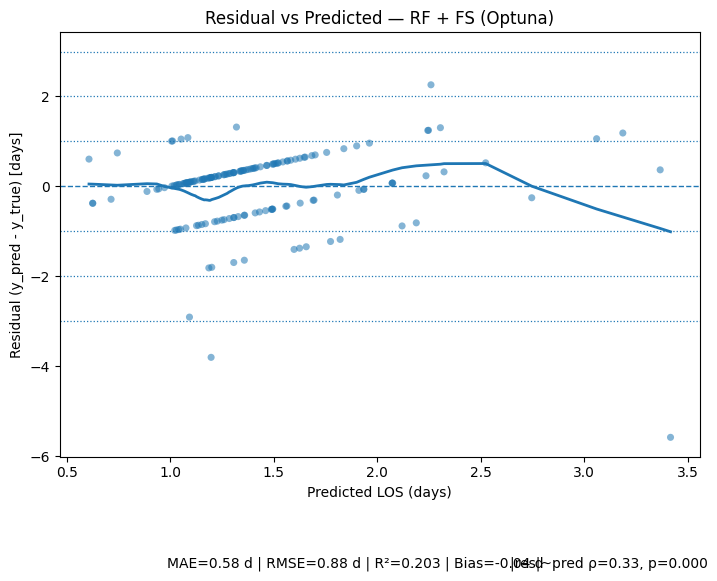

In [ ]:
#Plot
plt.figure(figsize=(7.2, 5.2))
plt.scatter(x, y, s=26, alpha=0.55, edgecolor='none')
plt.axhline(0, linestyle='--', linewidth=1)
for k in [1, 2, 3]:
    plt.axhline(+k, linestyle=':', linewidth=0.9)
    plt.axhline(-k, linestyle=':', linewidth=0.9)

plt.plot(xs, ys, linewidth=2)
plt.xlabel('Predicted LOS (days)')
plt.ylabel('Residual (y_pred - y_true) [days]')
plt.title('Residual vs Predicted — RF + FS (Optuna)')

#Bottom annotation of key indicators
txt = f"MAE={mae:.2f} d | RMSE={rmse:.2f} d | R²={r2:.3f} | Bias={bias:+.2f} d"
plt.gcf().text(0.5, -0.08, txt, ha='center', va='top')
if het_text:
    plt.gcf().text(0.99, -0.08, het_text, ha='right', va='top')

plt.tight_layout()


In [ ]:
#Load files
pred_path = '/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna/rf_fs_optuna_test_predictions.csv'
df = pd.read_csv(pred_path)

y_true = df['y_true'].to_numpy()
y_pred = df['y_pred'].to_numpy()
resid  = y_pred - y_true
abs_err = np.abs(resid)

#Calculate some indicators to facilitate the annotations in the chart.
mae  = abs_err.mean()
rmse = np.sqrt(np.mean(resid**2))
r2   = 1 - np.sum(resid**2)/np.sum((y_true - y_true.mean())**2)
bias = resid.mean()

#Prepare for LOWESS smoothing
xs, ys = None, None
try:
    from statsmodels.nonparametric.smoothers_lowess import lowess
    low = lowess(resid, y_pred, frac=0.35, it=0, return_sorted=True)
    xs, ys = low[:, 0], low[:, 1]
except Exception:
    pass

#Heteroscedasticity correlation (|res| ~ pred, Spearman)
het_text = ""
try:
    from scipy.stats import spearmanr
    rho, pval = spearmanr(np.abs(resid), y_pred)
    het_text = f" | |res|~pred ρ={rho:.2f}, p={pval:.3f}"
except Exception:
    pass

out_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/residuals')
out_dir.mkdir(parents=True, exist_ok=True)


In [ ]:
#Draw the plot
fig, ax = plt.subplots(figsize=(7.6, 5.2), constrained_layout=False)
ax.scatter(y_pred, resid, s=26, alpha=0.55, linewidths=0)

if xs is not None:
    ax.plot(xs, ys, linewidth=2)

ax.axhline(0, ls='--', lw=1)
for k in (1,2,3):
    ax.axhline(+k, ls=':', lw=0.9)
    ax.axhline(-k, ls=':', lw=0.9)

ax.set_xlabel('Predicted LOS (days)')
ax.set_ylabel('Residual (y_pred - y_true) [days]')
ax.set_title('Residual vs Predicted — RF + FS (Optuna)')

#The annotation is placed in the lower left corner of the figure.
txt = f"MAE={mae:.2f} d | RMSE={rmse:.2f} d | R²={r2:.3f} | Bias={bias:+.2f} d{het_text}"
ax.text(0.01, 0.02, txt, transform=ax.transAxes, ha='left', va='bottom')

#Properly add bottom/right margins to avoid element compression
fig.subplots_adjust(left=0.12, right=0.98, top=0.92, bottom=0.12)
fig.savefig(out_dir/'residual_vs_pred.png', dpi=300, bbox_inches='tight')
plt.close(fig)

In [ ]:
# sqrt(|residual|) vs predicted
fig, ax = plt.subplots(figsize=(7.6, 5.2))
ax.scatter(y_pred, np.sqrt(np.abs(resid)), s=26, alpha=0.55, linewidths=0)
ax.set_xlabel('Predicted LOS (days)')
ax.set_ylabel('sqrt(|residual|)')
ax.set_title('Scale–Location — RF + FS (Optuna)')
fig.subplots_adjust(left=0.12, right=0.98, top=0.92, bottom=0.12)
fig.savefig(out_dir/'scale_location.png', dpi=300, bbox_inches='tight')
plt.close(fig)

In [ ]:
#Divide the values according to the predicted values into 10 equal quantile buckets,
#and calculate the MAE for each bucket.
tmp = pd.DataFrame({'y_pred': y_pred, 'abs_err': abs_err})
tmp['bin'] = pd.qcut(tmp['y_pred'], q=10, duplicates='drop')
bybin = tmp.groupby('bin', observed=True).agg(mean_mae=('abs_err','mean'), n=('abs_err','size')).reset_index()

#Save
bybin.to_csv(out_dir/'mae_by_pred_decile.csv', index=False)

#Bar chart
fig, ax = plt.subplots(figsize=(8.0, 4.2))
ax.bar(range(len(bybin)), bybin['mean_mae'])
ax.set_xticks(range(len(bybin)))
ax.set_xticklabels([f"{i+1}" for i in range(len(bybin))])
ax.set_xlabel('Predicted LOS decile (1=lowest)')
ax.set_ylabel('MAE (days)')
ax.set_title('MAE by Predicted LOS Decile — RF + FS (Optuna)')
fig.tight_layout()
fig.savefig(out_dir/'mae_by_pred_decile.png', dpi=300, bbox_inches='tight')
plt.close(fig)

In [ ]:
#-----------------------------------------------------------------    5.4.2 Residual Plot: Residual Histogram + QQ Plot      --------------------------------------------------------------------

pred_path = '/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/random_forest_fs_optuna/rf_fs_optuna_test_predictions.csv'
df = pd.read_csv(pred_path)

y_true = df['y_true'].to_numpy()
y_pred = df['y_pred'].to_numpy()
resid  = y_pred - y_true

bias = float(np.mean(resid))
std  = float(np.std(resid, ddof=1))

#Skewness/Kurtosis & Normality Test
skew = kurt = None
test_txt = ""
try:
    from scipy.stats import skew as sk, kurtosis, shapiro, normaltest
    skew  = float(sk(resid, bias=False))
    kurt  = float(kurtosis(resid, fisher=True, bias=False))
    r4test = resid if len(resid) <= 5000 else np.random.default_rng(42).choice(resid, 5000, replace=False)
    W, p_shap = shapiro(r4test)
    K2, p_k2  = normaltest(resid)
    test_txt  = f"Shapiro p={p_shap:.3g} | D’Agostino K² p={p_k2:.3g}"
except Exception:
    pass

out_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/residuals')
out_dir.mkdir(parents=True, exist_ok=True)

#Residual histogram (with the appropriate number of bins determined by the Freedman-Diaconis rule)
def fd_bins(x):
    x = np.asarray(x)
    n = x.size
    if n < 2:
        return 'auto'
    q75, q25 = np.percentile(x, [75, 25])
    iqr = q75 - q25
    bw  = 2 * iqr / (n ** (1/3))
    if bw <= 0:
        return 'auto'
    bins = int(np.ceil((x.max() - x.min()) / bw))
    return max(bins, 10)

bins = fd_bins(resid)

fig, ax = plt.subplots(figsize=(7.2, 4.6))
ax.hist(resid, bins=bins)
ax.axvline(0, ls='--', lw=1)
ax.axvline(bias, ls=':', lw=1)
ax.set_xlabel('Residual (y_pred - y_true) [days]')
ax.set_ylabel('Frequency')
ax.set_title('Residual Histogram — RF + FS (Optuna)')

meta = f"mean={bias:+.2f} d | std={std:.2f} d"
if (skew is not None) and (kurt is not None):
    meta += f" | skew={skew:+.2f} | kurt={kurt:+.2f}"
if test_txt:
    meta += f"\n{test_txt}"

#Place the instructions inside the axis to avoid overlapping with the coordinate axes.
ax.text(0.99, 0.98, meta, transform=ax.transAxes, ha='right', va='top')
fig.tight_layout()
fig.savefig(out_dir/'residual_histogram.png', dpi=300, bbox_inches='tight')
plt.close(fig)



#QQ plot (Compared with Normal Distribution)
fig = plt.figure(figsize=(6.6, 6.6))
ax = fig.add_subplot(111)
probplot(resid, dist="norm", plot=ax)
ax.set_title('Residual QQ Plot — RF + FS (Optuna)')

note = "Interpretation: deviation from line indicates non-normal tails/skew.\nNormality is diagnostic only."
ax.text(0.5, -0.12, note, transform=ax.transAxes, ha='center', va='top')
if test_txt:
    ax.text(0.5, -0.18, test_txt, transform=ax.transAxes, ha='center', va='top')

fig.tight_layout()
fig.savefig(out_dir/'residual_qq.png', dpi=300, bbox_inches='tight')
plt.close(fig)

print("Saved:")
print(" -", out_dir/'residual_histogram.png')
print(" -", out_dir/'residual_qq.png')


Saved:
 - /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/residuals/residual_histogram.png
 - /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/residuals/residual_qq.png


In [ ]:
#-----------------------------------------------------------------    5.4.3 Residual Plot: Residual vs Age / BMI      --------------------------------------------------------------------

#Output folder
out_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/residuals')
out_dir.mkdir(parents=True, exist_ok=True)

#small helpers
def find_col(df, candidates, fuzzy=True):
    """Find a column in df by trying exact names in `candidates`;
    if not found and `fuzzy=True`, return the first column whose lowercased
    name contains any candidate substring."""
    cmap = {c.lower(): c for c in df.columns}
    for c in candidates:
        key = c.lower()
        if key in cmap:
            return cmap[key]
    if fuzzy:
        lowers = [c.lower() for c in candidates]
        for c in df.columns:
            lc = c.lower()
            if any(k in lc for k in lowers):
                return c
    return None

def lowess_xy(x, y, frac=0.35):
    """Return x,y smoothed by LOWESS or a rolling-median fallback."""
    try:
        from statsmodels.nonparametric.smoothers_lowess import lowess
        lo = lowess(y, x, frac=frac, it=0, return_sorted=True)
        return lo[:, 0], lo[:, 1]
    except Exception:
        order = np.argsort(x)
        xs = x[order]
        ys = (pd.Series(y[order])
                .rolling(window=max(15, len(y)//20), center=True, min_periods=1)
                .median()
                .to_numpy())
        return xs, ys

def bootstrap_ci_mean(values, B=1000, seed=42):
    """Bootstrap 95% CI for the mean."""
    v = np.asarray(values, dtype=float)
    v = v[~np.isnan(v)]
    if v.size == 0:
        return np.nan, np.nan
    rng = np.random.default_rng(seed)
    stats = []
    n = v.size
    for _ in range(B):
        idx = rng.integers(0, n, n)
        stats.append(np.mean(v[idx]))
    lo, hi = np.percentile(stats, [2.5, 97.5])
    return float(lo), float(hi)

def spearman_abs_err(x, e):
    """Spearman correlation between |residual| and x."""
    try:
        from scipy.stats import spearmanr
        rho, p = spearmanr(np.abs(e), x)
        return float(rho), float(p)
    except Exception:
        return np.nan, np.nan

#main plotting routine
def plot_residual_vs_feature(x_raw, resid, var_name, is_bmi=False, fname_prefix='var'):
    """
    Make (1) scatter + LOWESS of residuals vs feature
         (2) grouped boxplot with mean ± 95% CI
    """
    #1) sanitize inputs
    x = pd.to_numeric(pd.Series(x_raw), errors='coerce').to_numpy()
    r = np.asarray(resid, dtype=float)
    m = ~np.isnan(x) & ~np.isnan(r)
    x, r = x[m], r[m]

    #2) left panel: scatter + LOWESS
    xs, ys = lowess_xy(x, r, frac=0.35)
    rho, p  = spearman_abs_err(x, r)

    #3) right panel: binning and per-bin CI
    if is_bmi:
        bins   = [0, 18.5, 25, 30, 35, np.inf]
        labels = ['<18.5', '18.5–24.9', '25–29.9', '30–34.9', '≥35']
        g = pd.cut(x, bins=bins, labels=labels, right=False, include_lowest=True)
    else:
        #Use quantile bins; fallback to equal-width if duplicates
        try:
            g = pd.qcut(x, q=5, duplicates='drop')
        except Exception:
            g = pd.cut(x, bins=5)

    tmp = pd.DataFrame({'g': g, 'r': r}).dropna()

    #Per-group mean and CI — build explicitly to avoid pandas .apply shape traps
    means = tmp.groupby('g', observed=False)['r'].mean()
    rows = []
    for name, vals in tmp.groupby('g', observed=False)['r']:
        lo_ci, hi_ci = bootstrap_ci_mean(vals.values)
        rows.append({'g': name, 'lo': lo_ci, 'hi': hi_ci})
    ci = pd.DataFrame(rows).set_index('g').loc[means.index]  # align order

    #4) plot two panels
    fig, axes = plt.subplots(1, 2, figsize=(12, 4.5), gridspec_kw={'wspace': 0.25})

    #(left) scatter + LOWESS
    ax = axes[0]
    ax.scatter(x, r, s=24, alpha=0.55, edgecolor='none')
    ax.plot(xs, ys, lw=2)
    ax.axhline(0, ls='--', lw=1)
    ax.set_xlabel(var_name)
    ax.set_ylabel('Residual (y_pred - y_true) [days]')
    ax.set_title(f'Residual vs {var_name} — LOWESS')
    if not np.isnan(rho):
        ax.text(0.99, 0.98, f"|res|~{var_name} ρ={rho:.2f}, p={p:.3f}",
                transform=ax.transAxes, ha='right', va='top')

    #(right) grouped boxplot + mean ± 95% CI
    ax = axes[1]
    #enforce categorical order to match 'means'
    tmp['g'] = pd.Categorical(tmp['g'], categories=list(means.index), ordered=True)
    tmp.boxplot(column='r', by='g', ax=ax, grid=False)
    xpos = np.arange(1, len(means) + 1)
    ax.errorbar(
        xpos,
        means.values,
        yerr=[means.values - ci['lo'].values, ci['hi'].values - means.values],
        fmt='o', capsize=3, lw=1.5
    )
    ax.axhline(0, ls='--', lw=1)
    ax.set_xlabel(var_name + ' (binned)')
    ax.set_ylabel('Residual (days)')
    ax.set_title(f'{var_name} segments — mean ± 95% CI')
    fig.suptitle('')
    fig.tight_layout()

    fpath = out_dir / f'{fname_prefix}_residual_lowess_box.png'
    fig.savefig(fpath, dpi=300, bbox_inches='tight')
    plt.close(fig)
    print("Saved →", fpath)

#locate Age / BMI columns and plot
age_candidates = ['age', 'age_years', 'patient_age']
bmi_candidates = ['bmi', 'body_mass_index', 'bmi_value']

col_age = find_col(X_test, age_candidates, fuzzy=True)
col_bmi = find_col(X_test, bmi_candidates, fuzzy=True)

if col_age is not None:
    plot_residual_vs_feature(X_test[col_age].values, resid, var_name='Age', is_bmi=False, fname_prefix='age')
else:
    print("Age column not found; candidates tried:", age_candidates)

if col_bmi is not None:
    plot_residual_vs_feature(X_test[col_bmi].values, resid, var_name='BMI', is_bmi=True, fname_prefix='bmi')
else:
    print("BMI column not found; candidates tried:", bmi_candidates)

/tmp/ipython-input-2934814559.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saved → /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/residuals/age_residual_lowess_box.png


/tmp/ipython-input-2934814559.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saved → /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_fs_optuna/residuals/bmi_residual_lowess_box.png


In [ ]:
#-----------------------------------------------------------------    5.5 Classification RF     --------------------------------------------------------------------

#-----------------------------------------------------------------    5.5.1 Calibration plot + Brier score for RF (binary long-stay >= 3 days)     --------------------------------------------------------------------


base_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject')
data_dir = base_dir / 'experiments' / 'regression_baselines'
best_param_path = base_dir / 'experiments' / 'rf_longstay_binary' / 'best_params.json'
out_dir = base_dir / 'experiments' / 'interpretability' / 'random_forest_cls' / 'calibration'
out_dir.mkdir(parents=True, exist_ok=True)

#Load data
X_reg  = joblib.load(data_dir / 'X_reg.joblib')
y_reg  = joblib.load(data_dir / 'y_reg.joblib')
X_test = joblib.load(data_dir / 'X_test.joblib')
y_test = joblib.load(data_dir / 'y_test.joblib')

with open(data_dir / 'feature_lists.json', 'r') as f:
    feat = json.load(f)
numeric_features     = feat['numeric']
categorical_features = feat['categororical'] if 'categororical' in feat else feat['categorical']
feature_cols         = numeric_features + categorical_features

#Make binary labels (>= 3 days = 1)
LONG_STAY_DAYS = 3
y_bin       = (np.asarray(y_reg).ravel()  >= LONG_STAY_DAYS).astype(int)
y_bin_test  = (np.asarray(y_test).ravel() >= LONG_STAY_DAYS).astype(int)

#Preprocessing (same as regression part)
def clean_numeric_arr(arr):
    """Strip non-numeric chars and cast to float; keeps array shape."""
    df0 = pd.DataFrame(arr)
    return df0.applymap(lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')).values

numeric_pipe = Pipeline([
    ('clean',   FunctionTransformer(clean_numeric_arr, feature_names_out='one-to-one')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

#OneHotEncoder API changed across sklearn versions; handle both.
try:
    categorical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
except TypeError:
    categorical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

preprocessor = ColumnTransformer([
    ('num', numeric_pipe,     numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

#RF classifier pipeline (prep -> VT -> KBest -> RF)
def build_rf_clf(percentile, n_estimators, max_depth, max_features,
                 min_samples_split, min_samples_leaf, bootstrap):
    return Pipeline([
        ('prep',  preprocessor),
        ('vt',    VarianceThreshold(0.0)),
        ('kbest', SelectPercentile(mutual_info_classif, percentile=percentile)),
        ('model', RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,
            min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap, class_weight='balanced', random_state=42, n_jobs=-1
        ))
    ])

#Load best params if available; otherwise fall back to a solid default.
if best_param_path.exists():
    with open(best_param_path, 'r') as f:
        best_meta = json.load(f)
    best_params = best_meta.get('best_params', best_meta)
else:
    best_params = dict(
        percentile=70, n_estimators=600, max_depth=None,
        max_features='sqrt', min_samples_split=4, min_samples_leaf=1, bootstrap=True
    )

rf_pipe = build_rf_clf(**best_params)

#Train/valid split for calibration
X_tr, X_val, y_tr, y_val = train_test_split(
    X_reg[feature_cols], y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

#Fit RF on train
rf_pipe.fit(X_tr, y_tr)

#Uncalibrated probabilities on test
proba_uncal = rf_pipe.predict_proba(X_test[feature_cols])[:, 1]

#Fit isotonic calibrator on validation data
cal = CalibratedClassifierCV(rf_pipe, method='isotonic', cv='prefit')
cal.fit(X_val[feature_cols], y_val)

#Calibrated probabilities on test
proba_cal = cal.predict_proba(X_test[feature_cols])[:, 1]

#Brier score
brier_uncal = brier_score_loss(y_bin_test, proba_uncal, pos_label=1)
brier_cal   = brier_score_loss(y_bin_test, proba_cal,   pos_label=1)
print(f"Brier score (uncalibrated RF): {brier_uncal:.4f}")
print(f"Brier score (RF + isotonic):   {brier_cal:.4f}")

#Calibration curves
#Use quantile bins so each bin has similar number of samples
prob_true_uncal, prob_pred_uncal = calibration_curve(y_bin_test, proba_uncal, n_bins=10, strategy='quantile')
prob_true_cal,   prob_pred_cal   = calibration_curve(y_bin_test, proba_cal,   n_bins=10, strategy='quantile')

fig, ax = plt.subplots(figsize=(6.4, 5.6))

#Perfectly calibrated reference
ax.plot([0, 1], [0, 1], linestyle='--', linewidth=1, label='Perfect calibration')

#Model curves
ax.plot(prob_pred_uncal, prob_true_uncal, marker='o', linewidth=2,
        label=f'RF (uncal.) — Brier={brier_uncal:.3f}')
ax.plot(prob_pred_cal,   prob_true_cal,   marker='o', linewidth=2,
        label=f'RF + Isotonic — Brier={brier_cal:.3f}')

ax.set_xlabel('Predicted probability (positive)')
ax.set_ylabel('Observed fraction of positives')
ax.set_title('Calibration plot — Random Forest (binary long-stay ≥ 3d)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
fig.tight_layout()

fpath = out_dir / 'calibration_rf_vs_isotonic.png'
fig.savefig(fpath, dpi=300, bbox_inches='tight')
plt.close(fig)
print("Saved figure →", fpath)

#Probability histogram under the same out_dir
fig, ax = plt.subplots(figsize=(6.4, 3.0))
ax.hist(proba_uncal, bins=20, alpha=0.6, label='RF (uncal.)')
ax.hist(proba_cal,   bins=20, alpha=0.6, label='RF + Isotonic')
ax.set_xlabel('Predicted probability (positive)')
ax.set_ylabel('Count')
ax.set_title('Predicted probability distribution (test)')
ax.legend()
fig.tight_layout()
fpath2 = out_dir / 'proba_hist_rf_vs_isotonic.png'
fig.savefig(fpath2, dpi=300, bbox_inches='tight')
plt.close(fig)
print("Saved figure →", fpath2)

/tmp/ipython-input-274128188.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')).values
/tmp/ipython-input-274128188.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')).values
/usr/local/lib/python3.12/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/tmp/ipython-input-274128188.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')).values
/tmp/ipython-input-274128188.py:33: FutureWarning: DataFrame.applymap has been depre

Brier score (uncalibrated RF): 0.1377
Brier score (RF + isotonic):   0.1024
Saved figure → /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_cls/calibration/calibration_rf_vs_isotonic.png
Saved figure → /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_cls/calibration/proba_hist_rf_vs_isotonic.png


In [ ]:
#-----------------------------------------------------------------    5.5.2 ROC curve + AUC, PR curve + AP for RF (binary long-stay >= 3 days)     --------------------------------------------------------------------


base_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject')
data_dir = base_dir / 'experiments' / 'regression_baselines'
best_param_path = base_dir / 'experiments' / 'rf_longstay_binary' / 'best_params.json'
out_dir = base_dir / 'experiments' / 'interpretability' / 'random_forest_cls' / 'roc_pr'
out_dir.mkdir(parents=True, exist_ok=True)

X_reg  = joblib.load(data_dir / 'X_reg.joblib')
y_reg  = joblib.load(data_dir / 'y_reg.joblib')
X_test = joblib.load(data_dir / 'X_test.joblib')
y_test = joblib.load(data_dir / 'y_test.joblib')

with open(data_dir / 'feature_lists.json', 'r') as f:
    feat = json.load(f)
numeric_features     = feat['numeric']
categorical_features = feat['categororical'] if 'categororical' in feat else feat['categorical']
feature_cols         = numeric_features + categorical_features

#Make binary labels (>= 3 days = 1)
LONG_STAY_DAYS = 3
y_bin       = (np.asarray(y_reg).ravel()  >= LONG_STAY_DAYS).astype(int)
y_bin_test  = (np.asarray(y_test).ravel() >= LONG_STAY_DAYS).astype(int)
pos_rate    = float(y_bin_test.mean())

# Preprocessing identical to regression part
def clean_numeric_arr(arr):
    """Strip non-numeric chars and cast to float; keeps array shape."""
    df0 = pd.DataFrame(arr)
    return df0.applymap(lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')).values

numeric_pipe = Pipeline([
    ('clean',   FunctionTransformer(clean_numeric_arr, feature_names_out='one-to-one')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

#OneHotEncoder API fallback for different sklearn versions
try:
    categorical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
except TypeError:
    categorical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

preprocessor = ColumnTransformer([
    ('num', numeric_pipe,     numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

#RF classifier pipeline (prep -> VT -> KBest -> RF)
def build_rf_clf(percentile, n_estimators, max_depth, max_features,
                 min_samples_split, min_samples_leaf, bootstrap):
    return Pipeline([
        ('prep',  preprocessor),
        ('vt',    VarianceThreshold(0.0)),
        ('kbest', SelectPercentile(mutual_info_classif, percentile=percentile)),
        ('model', RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,
            min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap, class_weight='balanced', random_state=42, n_jobs=-1
        ))
    ])

#Load tuned params if available; otherwise use a robust default
if best_param_path.exists():
    with open(best_param_path, 'r') as f:
        best_meta = json.load(f)
    best_params = best_meta.get('best_params', best_meta)
else:
    best_params = dict(
        percentile=70, n_estimators=600, max_depth=None,
        max_features='sqrt', min_samples_split=4, min_samples_leaf=1, bootstrap=True
    )

rf_pipe = build_rf_clf(**best_params)

#Train/valid split; fit base model; set up isotonic calibration ----------
X_tr, X_val, y_tr, y_val = train_test_split(
    X_reg[feature_cols], y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

#Fit RF on train
rf_pipe.fit(X_tr, y_tr)

#Uncalibrated probabilities on test
proba_uncal = rf_pipe.predict_proba(X_test[feature_cols])[:, 1]

#Isotonic calibration (cv='prefit' means base model already trained)
cal = CalibratedClassifierCV(rf_pipe, method='isotonic', cv='prefit')
cal.fit(X_val[feature_cols], y_val)

#Calibrated probabilities on test
proba_cal = cal.predict_proba(X_test[feature_cols])[:, 1]

# ---------- ROC + AUC ----------
fpr_u, tpr_u, _ = roc_curve(y_bin_test, proba_uncal)
fpr_c, tpr_c, _ = roc_curve(y_bin_test, proba_cal)

auc_u = roc_auc_score(y_bin_test, proba_uncal)
auc_c = roc_auc_score(y_bin_test, proba_cal)

fig, ax = plt.subplots(figsize=(6.2, 5.6))
ax.plot([0, 1], [0, 1], linestyle='--', linewidth=1, label='Chance')
ax.plot(fpr_u, tpr_u, linewidth=2, label=f'RF (uncal.) — AUC={auc_u:.3f}')
ax.plot(fpr_c, tpr_c, linewidth=2, label=f'RF + Isotonic — AUC={auc_c:.3f}')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC — Random Forest (binary long-stay ≥ 3d)')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
fig.tight_layout()
roc_path = out_dir / 'roc_rf_uncal_vs_cal.png'
fig.savefig(roc_path, dpi=300, bbox_inches='tight')
plt.close(fig)
print("Saved ROC →", roc_path)

# ----------  PR + AP ----------
prec_u, rec_u, _ = precision_recall_curve(y_bin_test, proba_uncal)
prec_c, rec_c, _ = precision_recall_curve(y_bin_test, proba_cal)

ap_u = average_precision_score(y_bin_test, proba_uncal)
ap_c = average_precision_score(y_bin_test, proba_cal)

fig, ax = plt.subplots(figsize=(6.2, 5.6))
#Baseline is the positive rate (no-skill classifier)
ax.hlines(pos_rate, xmin=0, xmax=1, linestyles='--', linewidth=1, label=f'Baseline (pos rate={pos_rate:.2f})')
ax.plot(rec_u, prec_u, linewidth=2, label=f'RF (uncal.) — AP={ap_u:.3f}')
ax.plot(rec_c, prec_c, linewidth=2, label=f'RF + Isotonic — AP={ap_c:.3f}')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision–Recall — Random Forest (binary long-stay ≥ 3d)')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1.02)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
fig.tight_layout()
pr_path = out_dir / 'pr_rf_uncal_vs_cal.png'
fig.savefig(pr_path, dpi=300, bbox_inches='tight')
plt.close(fig)
print("Saved PR →", pr_path)

#Print numeric metrics
print(f"\n[Metrics on TEST]")
print(f"ROC-AUC  (uncalibrated): {auc_u:.4f}")
print(f"ROC-AUC  (calibrated)  : {auc_c:.4f}")
print(f"PR-AP    (uncalibrated): {ap_u:.4f}")
print(f"PR-AP    (calibrated)  : {ap_c:.4f}")
print(f"Positive rate (baseline for PR): {pos_rate:.4f}")



/tmp/ipython-input-745700149.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')).values
/tmp/ipython-input-745700149.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')).values
/usr/local/lib/python3.12/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/tmp/ipython-input-745700149.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')).values
/tmp/ipython-input-745700149.py:31: FutureWarning: DataFrame.applymap has been depre

Saved ROC → /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_cls/roc_pr/roc_rf_uncal_vs_cal.png
Saved PR → /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_cls/roc_pr/pr_rf_uncal_vs_cal.png

[Metrics on TEST]
ROC-AUC  (uncalibrated): 0.6970
ROC-AUC  (calibrated)  : 0.7120
PR-AP    (uncalibrated): 0.1934
PR-AP    (calibrated)  : 0.1844
Positive rate (baseline for PR): 0.1000


In [ ]:
#-----------------------------------------------------------------    5.5.3 Threshold sensitivity: threshold vs Precision/Recall/F1   --------------------------------------------------------------------


base_dir = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject')
data_dir = base_dir / 'experiments' / 'regression_baselines'
best_param_path = base_dir / 'experiments' / 'rf_longstay_binary' / 'best_params.json'  # if created before
out_dir = base_dir / 'experiments' / 'interpretability' / 'random_forest_cls' / 'threshold_sensitivity'
out_dir.mkdir(parents=True, exist_ok=True)

X_reg  = joblib.load(data_dir / 'X_reg.joblib')
y_reg  = joblib.load(data_dir / 'y_reg.joblib')
X_test = joblib.load(data_dir / 'X_test.joblib')
y_test = joblib.load(data_dir / 'y_test.joblib')

with open(data_dir / 'feature_lists.json', 'r') as f:
    feat = json.load(f)
numeric_features     = feat['numeric']
categorical_features = feat['categororical'] if 'categororical' in feat else feat['categorical']
feature_cols         = numeric_features + categorical_features

#Make binary labels (>= 3 days = 1)
LONG_STAY_DAYS = 3
y_bin      = (np.asarray(y_reg).ravel()  >= LONG_STAY_DAYS).astype(int)
y_bin_test = (np.asarray(y_test).ravel() >= LONG_STAY_DAYS).astype(int)

#Preprocessing identical to regression part
def clean_numeric_arr(arr):
    """Strip non-numeric chars and cast to float; keeps array shape."""
    df0 = pd.DataFrame(arr)
    return df0.applymap(lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')).values

numeric_pipe = Pipeline([
    ('clean',   FunctionTransformer(clean_numeric_arr, feature_names_out='one-to-one')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

# OneHotEncoder API fallback for different sklearn versions
try:
    categorical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
except TypeError:
    categorical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

preprocessor = ColumnTransformer([
    ('num', numeric_pipe,     numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

#RF classifier pipeline (prep -> VT -> KBest -> RF)
def build_rf_clf(percentile, n_estimators, max_depth, max_features,
                 min_samples_split, min_samples_leaf, bootstrap):
    return Pipeline([
        ('prep',  preprocessor),
        ('vt',    VarianceThreshold(0.0)),
        ('kbest', SelectPercentile(mutual_info_classif, percentile=percentile)),
        ('model', RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,
            min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap, class_weight='balanced', random_state=42, n_jobs=-1
        ))
    ])

#Load tuned params if available; otherwise use a robust default
if best_param_path.exists():
    with open(best_param_path, 'r') as f:
        best_meta = json.load(f)
    best_params = best_meta.get('best_params', best_meta)
else:
    best_params = dict(
        percentile=70, n_estimators=600, max_depth=None,
        max_features='sqrt', min_samples_split=4, min_samples_leaf=1, bootstrap=True
    )

rf_pipe = build_rf_clf(**best_params)

#Train/valid split; fit base model; isotonic calibration
X_tr, X_val, y_tr, y_val = train_test_split(
    X_reg[feature_cols], y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

#Fit RF on train
rf_pipe.fit(X_tr, y_tr)

#Get probabilities
proba_val  = rf_pipe.predict_proba(X_val[feature_cols])[:, 1]
proba_test_uncal = rf_pipe.predict_proba(X_test[feature_cols])[:, 1]

#Calibrate (optional but recommended to synchronize with previous sections)
cal = CalibratedClassifierCV(rf_pipe, method='isotonic', cv='prefit')
cal.fit(X_val[feature_cols], y_val)
proba_val_cal  = cal.predict_proba(X_val[feature_cols])[:, 1]
proba_test_cal = cal.predict_proba(X_test[feature_cols])[:, 1]

#Choose which probabilities to analyze for thresholding
use_calibrated = True   # set to False if you want uncalibrated
proba_val_used  = proba_val_cal if use_calibrated else proba_val
proba_test_used = proba_test_cal if use_calibrated else proba_test_uncal

#Sweep thresholds and compute metrics
def sweep_thresholds(y_true, proba, thresholds):
    """Compute precision, recall, f1_pos, f1_weighted for each threshold."""
    rows = []
    for thr in thresholds:
        y_hat = (proba >= thr).astype(int)
        prec = precision_score(y_true, y_hat, zero_division=0)
        rec  = recall_score(y_true, y_hat, zero_division=0)
        f1p  = f1_score(y_true, y_hat, average='binary', zero_division=0)
        f1w  = f1_score(y_true, y_hat, average='weighted', zero_division=0)
        acc  = accuracy_score(y_true, y_hat)
        rows.append((thr, prec, rec, f1p, f1w, acc))
    dfm = pd.DataFrame(rows, columns=['threshold','precision','recall','f1_pos','f1_weighted','accuracy'])
    return dfm

thr_grid = np.linspace(0.00, 1.00, 201)
val_curve  = sweep_thresholds(y_val,  proba_val_used,  thr_grid)
test_curve = sweep_thresholds(y_bin_test, proba_test_used, thr_grid)

#Pick best threshold on validation (maximize weighted-F1)
crit = 'f1_weighted'
best_idx = val_curve[crit].values.argmax()
best_thr = float(val_curve.iloc[best_idx]['threshold'])
best_val_metric = float(val_curve.iloc[best_idx][crit])

# Apply best threshold on test
y_test_hat_best = (proba_test_used >= best_thr).astype(int)
prec_best = precision_score(y_bin_test, y_test_hat_best, zero_division=0)
rec_best  = recall_score(y_bin_test, y_test_hat_best, zero_division=0)
f1_best   = f1_score(y_bin_test, y_test_hat_best, average='binary', zero_division=0)
f1w_best  = f1_score(y_bin_test, y_test_hat_best, average='weighted', zero_division=0)
acc_best  = accuracy_score(y_bin_test, y_test_hat_best)

print(f"[Validation] best threshold by {crit} = {best_thr:.2f} | {crit}={best_val_metric:.3f}")
print(f"[Test @ best thr] Precision={prec_best:.3f} | Recall={rec_best:.3f} | F1(pos)={f1_best:.3f} "
      f"| F1(weighted)={f1w_best:.3f} | Acc={acc_best:.3f}")

#Plot: threshold vs Precision/Recall/F1(pos)
fig, ax = plt.subplots(figsize=(7.4, 5.2))

ax.plot(val_curve['threshold'],  val_curve['precision'],  label='Precision (valid)',  linewidth=2)
ax.plot(val_curve['threshold'],  val_curve['recall'],     label='Recall (valid)',     linewidth=2)
ax.plot(val_curve['threshold'],  val_curve['f1_pos'],     label='F1 (pos, valid)',    linewidth=2)

#show test curves in lighter style for reference
ax.plot(test_curve['threshold'], test_curve['precision'],  linestyle='--', alpha=0.5, label='Precision (test)')
ax.plot(test_curve['threshold'], test_curve['recall'],     linestyle='--', alpha=0.5, label='Recall (test)')
ax.plot(test_curve['threshold'], test_curve['f1_pos'],     linestyle='--', alpha=0.5, label='F1 (pos, test)')

#vertical line = best threshold
ax.axvline(best_thr, color='k', linestyle=':', linewidth=1.5,
           label=f'Best thr (valid {crit}): {best_thr:.2f}')

ax.set_xlabel('Decision threshold')
ax.set_ylabel('Score')
ax.set_title('Threshold sensitivity — Precision / Recall / F1 (positive class)\nRF (binary long-stay ≥ 3d)')
ax.set_xlim(0, 1); ax.set_ylim(0, 1.02)
ax.grid(True, alpha=0.3)
ax.legend(loc='best', ncols=2)
fig.tight_layout()

fig_path = out_dir / 'threshold_sensitivity_rf.png'
fig.savefig(fig_path, dpi=300, bbox_inches='tight')
plt.close(fig)
print("Saved plot →", fig_path)

#Save detailed tables
val_curve.to_csv(out_dir / 'threshold_sweep_valid.csv', index=False)
test_curve.to_csv(out_dir / 'threshold_sweep_test.csv',  index=False)

with open(out_dir / 'chosen_threshold.json', 'w') as f:
    json.dump({
        'use_calibrated': use_calibrated,
        'criterion': crit,
        'best_thr_valid': best_thr,
        'valid_best_metric': best_val_metric,
        'test_at_best_thr': {
            'precision': float(prec_best),
            'recall':    float(rec_best),
            'f1_pos':    float(f1_best),
            'f1_weighted': float(f1w_best),
            'accuracy':  float(acc_best)
        }
    }, f, indent=2)

print("Saved curves and chosen-threshold metadata to:", out_dir)

/tmp/ipython-input-482921094.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')).values
/tmp/ipython-input-482921094.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')).values
/tmp/ipython-input-482921094.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df0.applymap(lambda x: pd.to_numeric(re.sub(r'[^0-9.\-]+', '', str(x)), errors='coerce')).values
/usr/local/lib/python3.12/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/tmp/ipython-input-482921094.py:30: FutureWarning: DataFrame.applymap has been depre

[Validation] best threshold by f1_weighted = 0.26 | f1_weighted=0.902
[Test @ best thr] Precision=0.250 | Recall=0.188 | F1(pos)=0.214 | F1(weighted)=0.854 | Acc=0.863
Saved plot → /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_cls/threshold_sensitivity/threshold_sensitivity_rf.png
Saved curves and chosen-threshold metadata to: /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_cls/threshold_sensitivity


In [ ]:
#-----------------------------------------------------------------    5.5.4 onfusion Matrix Heatmaps (RF binary long-stay >= 3 days)   --------------------------------------------------------------------


try:
    import seaborn as sns
    _HAS_SNS = True
except Exception:
    _HAS_SNS = False

from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)

BASE = Path('/content/drive/MyDrive/Colab Notebooks/LOSproject')

PRED_CSV = BASE / 'experiments' / 'rf_longstay_binary' / 'rf_longstay_bin_test_predictions.csv'


THR_JSON_CANDIDATES = [
    BASE / 'experiments' / 'interpretability' / 'random_forest_cls' / 'threshold_sensitivity' / 'chosen_threshold.json',
    BASE / 'experiments' / 'rf_longstay_binary' / 'best_params.json',  # only if you also wrote threshold here
]

#Output folder for CM plots
OUT_DIR = BASE / 'experiments' / 'interpretability' / 'random_forest_cls' / 'confusion_matrix'
OUT_DIR.mkdir(parents=True, exist_ok=True)

#Load predictions (ground-truth + either saved y_pred or proba_pos) ----------
df = pd.read_csv(PRED_CSV)
if 'y_true' not in df.columns:
    raise ValueError(f"'y_true' not found in {PRED_CSV}. Please check the file.")

y_true = df['y_true'].astype(int).to_numpy()

#Decide how to get y_hat:
#1) Prefer the saved y_pred
if 'y_pred' in df.columns:
    y_hat = df['y_pred'].astype(int).to_numpy()
    thr_used = None  # unknown / not needed
    source_msg = "Using saved y_pred from the predictions file."
#2) Otherwise, try to load a threshold and binarize proba_pos
elif 'proba_pos' in df.columns:
    proba = pd.to_numeric(df['proba_pos'], errors='coerce').to_numpy()
    thr_loaded = None
    for jp in THR_JSON_CANDIDATES:
        if jp.exists():
            with open(jp, 'r') as f:
                meta = json.load(f)
            thr_loaded = meta.get('best_thr', meta.get('best_thr_valid', None))
            if thr_loaded is not None:
                thr_loaded = float(thr_loaded)
                break
    if thr_loaded is None:
        thr_loaded = 0.50

    y_hat = (proba >= thr_loaded).astype(int)
    thr_used = thr_loaded
    source_msg = f"y_pred not found; used proba_pos with threshold={thr_loaded:.2f}."
else:
    raise ValueError(
        f"Neither 'y_pred' nor 'proba_pos' found in {PRED_CSV}. "
        "Please re-save predictions with at least one of them."
    )

print(source_msg)

#Confusion matrices
labels = [0, 1]
class_names = ['Non-long-stay (<3d)', 'Long-stay (≥3d)']

cm = confusion_matrix(y_true, y_hat, labels=labels)
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

#Plot helper
def plot_cm(mat, title, fname, fmt='.0f', cmap='Blues'):
    """Draw and save a confusion matrix heatmap."""
    fig, ax = plt.subplots(figsize=(5.6, 4.8))
    if _HAS_SNS:
        sns.heatmap(
            mat, annot=True, fmt=fmt, cmap=cmap, cbar=True, ax=ax,
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={'fontsize': 11}
        )
    else:
        im = ax.imshow(mat, cmap=cmap)
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        #Add text annotations manually
        for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                ax.text(j, i, format(mat[i, j], fmt if isinstance(mat[i, j], (int, float)) else 's'),
                        ha='center', va='center', color='black')
        ax.set_xticks(np.arange(len(class_names)))
        ax.set_yticks(np.arange(len(class_names)))
        ax.set_xticklabels(class_names)
        ax.set_yticklabels(class_names)

    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(title)
    fig.tight_layout()
    path = OUT_DIR / fname
    fig.savefig(path, dpi=300, bbox_inches='tight')
    plt.close(fig)
    print("Saved plot →", path)

#Draw & save -
thr_info = "" if ( 'y_pred' in df.columns ) else f" (thr={thr_used:.2f})"
plot_cm(cm,      title=f'Confusion Matrix (counts) — RF binary long-stay{thr_info}',
        fname='cm_counts.png',     fmt='.0f')
plot_cm(cm_norm, title=f'Confusion Matrix (normalized by row) — RF binary long-stay{thr_info}',
        fname='cm_normalized.png', fmt='.2f')

#Quick metrics for sanity check
acc  = accuracy_score(y_true, y_hat)
prec = precision_score(y_true, y_hat, zero_division=0)
rec  = recall_score(y_true, y_hat, zero_division=0)
f1p  = f1_score(y_true, y_hat, average='binary',   zero_division=0)
f1w  = f1_score(y_true, y_hat, average='weighted', zero_division=0)

thr_print = "saved y_pred" if ('y_pred' in df.columns) else f"thr={thr_used:.2f}"
print(f"[Test @ {thr_print}]  Acc={acc:.3f} | Precision={prec:.3f} | "
      f"Recall={rec:.3f} | F1(pos)={f1p:.3f} | F1(weighted)={f1w:.3f}")

print("\nClassification report:\n",
      classification_report(y_true, y_hat, target_names=class_names, digits=3))


Using saved y_pred from the predictions file.
Saved plot → /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_cls/confusion_matrix/cm_counts.png
Saved plot → /content/drive/MyDrive/Colab Notebooks/LOSproject/experiments/interpretability/random_forest_cls/confusion_matrix/cm_normalized.png
[Test @ saved y_pred]  Acc=0.863 | Precision=0.250 | Recall=0.188 | F1(pos)=0.214 | F1(weighted)=0.854

Classification report:
                      precision    recall  f1-score   support

Non-long-stay (<3d)      0.912     0.938     0.925       144
    Long-stay (≥3d)      0.250     0.188     0.214        16

           accuracy                          0.863       160
          macro avg      0.581     0.562     0.569       160
       weighted avg      0.846     0.863     0.854       160

